In [1]:
import pandas as pd

## DATA LOADING AND EXPLORATION

In [2]:
vehicle_class = pd.read_csv('Vehicle Class - All.csv')
ev_final = pd.read_excel('ev_final.xlsx')
ev_charging = pd.read_csv('ev-charging-stations-india.csv')
operational_pc = pd.read_csv('OperationalPC.csv')
ev_sales = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')

In [3]:
def explore_dataset(name, df):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(df.head(3))
    print("\n")
explore_dataset('Vehicle Class', vehicle_class)
explore_dataset('EV Final', ev_final)
explore_dataset('EV Charging Stations', ev_charging)
explore_dataset('Operational Private Chargers', operational_pc)
explore_dataset('EV Sales by Makers & Categories', ev_sales)

--- Vehicle Class ---
Shape: (16, 2)
Columns: ['Vehicle Class', 'Total Registration']
                     Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965


--- EV Final ---
Shape: (2705, 25)
Columns: ['uid', 'name', 'vendor_name', 'address', 'latitude', 'longitude', 'city', 'country', 'open', 'close', 'logo_url', 'staff', 'payment_modes', 'contact_numbers', 'station_type', 'postal_code', 'zone', 0, 'available', 'capacity', 'cost_per_unit', 'power_type', 'total', 'type', 'vehicle_type']
        uid                    name             vendor_name  \
0  STATIC12  GensolCharge Pvt. Ltd.  GensolCharge Pvt. Ltd.   
1  STATIC14                    REIL                    REIL   
2  STATIC15                    REIL                    REIL   

                           address   latitude  longitude   city country  \
0  NDSE Grid, BRPL South Extensio

In [4]:
vehicle_class['Total Registration'] = vehicle_class['Total Registration'].str.replace(',', '').astype(int)

In [5]:
ev_final_clean = ev_final.drop(columns=[0])
ev_final_clean['capacity'] = ev_final_clean['capacity'].str.replace('kW', '').str.strip()
ev_final_clean['vehicle_type'] = ev_final_clean['vehicle_type'].str.strip("[]").str.replace("'", "").str.replace(",", ", ")

In [6]:
ev_charging.rename(columns={'lattitude': 'latitude'}, inplace=True)
ev_charging['latitude'] = pd.to_numeric(ev_charging['latitude'], errors='coerce')
ev_charging['longitude'] = pd.to_numeric(ev_charging['longitude'], errors='coerce')

In [7]:
operational_pc['No. of Operational PCS'] = pd.to_numeric(operational_pc['No. of Operational PCS'], errors='coerce')

In [8]:
ev_sales_melted = ev_sales.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')
ev_sales_melted['Maker'] = ev_sales_melted['Maker'].str.replace('"', '').str.strip()
ev_sales_melted['Year'] = ev_sales_melted['Year'].astype(int)

### EV Sales Data

In [9]:
ev_sales.head()

Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578

In [10]:
ev_sales['Maker'] = ev_sales['Maker'].str.replace('"', '').str.strip()
ev_sales['Cat'] = ev_sales['Cat'].str.strip()

In [11]:
ev_sales_melted = ev_sales.melt(id_vars=['Cat', 'Maker'], 
                                var_name='Year', 
                                value_name='Sales')

In [12]:
ev_sales_melted['Year'] = ev_sales_melted['Year'].astype(int)
ev_sales_melted['Sales'] = pd.to_numeric(ev_sales_melted['Sales'], errors='coerce').fillna(0).astype(int)

In [13]:
print(ev_sales_melted.groupby('Year')['Sales'].sum())
print(ev_sales_melted.groupby('Cat')['Sales'].sum())

Year
2015       7752
2016      49249
2017      87019
2018     129763
2019     165786
2020     123770
2021     328854
2022    1020533
2023    1529234
2024     978943
Name: Sales, dtype: int32
Cat
2W     2279448
3W     1934263
LMV     206388
MMV        804
Name: Sales, dtype: int32


## Market Growth:

#### 1. From 7,752 EVs in 2015 → to over 1.5 million in 2023—that’s a CAGR of over 70%.

#### 2. 2022 and 2023 show hockey-stick growth (likely due to FAME II, state subsidies, rising fuel costs).

## Market Composition:

#### 1. 2-Wheelers dominate with ~2.28 million units → indicating focus for charger types (AC slow vs DC fast).

#### 2. 3-Wheelers (~1.93 million) also huge—important for commercial use cases like e-rickshaws.

#### LMV (Light Motor Vehicles → cars) is still a smaller but fast-growing segment → DC fast chargers needed here.

### Charging Stations

In [14]:
ev_final.head()

uid                    name             vendor_name  \
0  STATIC12  GensolCharge Pvt. Ltd.  GensolCharge Pvt. Ltd.   
1  STATIC14                    REIL                    REIL   
2  STATIC15                    REIL                    REIL   
3  STATIC16                    REIL                    REIL   
4  STATIC17                BluSmart                BluSmart   

                                      address   latitude  longitude   city  \
0             NDSE Grid, BRPL South Extension  28.568238  77.219666  Delhi   
1                       Scada office kalka ji  28.541995  77.260583  Delhi   
2                   Ashram Chowk Mathura Road  28.571189  77.259806  Delhi   
3                  Nizamuddin Railway station  28.588991  77.253240  Delhi   
4  BSES Bhawan, Nehru Place, New Delhi 110048  28.549427  77.254636  Delhi   

  country      open     close  ... postal_code           zone   0 available  \
0   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
1   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
2   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
3   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
4   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   

  capacity  cost_per_unit power_type  total         type        vehicle_type  
0    15 kW            NaN         DC    2.0  BEVC DC 001              ['4W']  
1   3.3 kW            NaN         AC    3.0  BEVC AC 001  ['2W', '3W', '4W']  
2    15 kW            NaN         DC    2.0  BEVC DC 001              ['4W']  
3    15 kW            NaN         DC    4.0  BEVC DC 001              ['4W']  
4    15 kW            NaN         DC    1.0  BEVC DC 001              ['4W']  

[5 rows x 25 columns]

In [15]:
ev_final_clean = ev_final.drop(columns=[0])

ev_final_clean['capacity_kW'] = ev_final_clean['capacity'].str.replace('kW', '').str.strip()
ev_final_clean['capacity_kW'] = pd.to_numeric(ev_final_clean['capacity_kW'], errors='coerce')

In [16]:
ev_final_clean['vehicle_type'] = (
    ev_final_clean['vehicle_type']
    .str.strip("[]")
    .str.replace("'", "")
    .str.replace(",", ", ")
    .fillna("Unknown")
)

In [17]:
print(ev_final_clean.isnull().sum())
print(ev_final_clean['city'].value_counts().head(10))

uid                  0
name                 0
vendor_name          0
address              0
latitude             0
longitude            0
city                 0
country              0
open                 0
close                0
logo_url           467
staff                0
payment_modes        0
contact_numbers      0
station_type         0
postal_code          0
zone               295
available          238
capacity           208
cost_per_unit      252
power_type         208
total              208
type               208
vehicle_type         0
capacity_kW        211
dtype: int64
city
New Delhi             1743
Delhi                  704
Nagpur                  98
Chennai                 48
Kolkata                 25
Ahmedabad               12
Raipur                   8
Thiruvananthapuram       8
Panaji                   6
Kottayam                 6
Name: count, dtype: int64


In [18]:
# for missing capacities I'm filling it with median value
median_capacity = ev_final_clean['capacity_kW'].median()
ev_final_clean['capacity_kW'] = ev_final_clean['capacity_kW'].fillna(median_capacity)

In [19]:
ev_final_clean['power_type'] = ev_final_clean['power_type'].fillna('Unknown')

In [20]:
ev_final_clean['city'] = ev_final_clean['city'].replace({'New Delhi': 'Delhi'})

In [21]:
print(ev_final_clean['city'].value_counts().head(10))
print(ev_final_clean['power_type'].value_counts())
print(ev_final_clean['capacity_kW'].describe())

city
Delhi                 2447
Nagpur                  98
Chennai                 48
Kolkata                 25
Ahmedabad               12
Raipur                   8
Thiruvananthapuram       8
Panaji                   6
Kottayam                 6
Kochi                    4
Name: count, dtype: int64
power_type
AC         2079
DC          418
Unknown     208
Name: count, dtype: int64
count    2705.000000
mean       18.429501
std        40.588340
min         3.300000
25%         3.300000
50%         3.300000
75%         3.300000
max       142.000000
Name: capacity_kW, dtype: float64


### City Concentration

#### 2447 stations in Delhi (massive lead), next city Nagpur with only 98

### Power Type Mix

#### 2,079 AC chargers vs. 418 DC chargers; 208 Unknown

### Charger Capacity (kW)

#### Median = 3.3 kW; 75% of chargers capped at this level

## State-Level Ratios using Operational CSV

In [22]:
operational_pc['State'] = operational_pc['State'].str.strip()
operational_pc['No. of Operational PCS'] = pd.to_numeric(operational_pc['No. of Operational PCS'], errors='coerce')

In [23]:
state_charger_counts = ev_final_clean.groupby('zone').size().reset_index(name='Charger_Count')

In [24]:
state_level = pd.merge(operational_pc, state_charger_counts, left_on='State', right_on='zone', how='outer')

In [25]:
state_level['No. of Operational PCS'] = state_level['No. of Operational PCS'].fillna(0)
state_level['Charger_Count'] = state_level['Charger_Count'].fillna(0)

In [26]:
state_level['EV_to_Charger_Ratio'] = state_level['No. of Operational PCS'] / state_level['Charger_Count']
state_level = state_level.fillna({'EV_to_Charger_Ratio': 0})

In [27]:
state_level_sorted = state_level.sort_values(by='EV_to_Charger_Ratio', ascending=False)
print(state_level_sorted[['State', 'No. of Operational PCS', 'Charger_Count', 'EV_to_Charger_Ratio']].head(10))

                State  No. of Operational PCS  Charger_Count  \
0   Andaman & Nicobar                     3.0            0.0   
26          Rajasthan                   500.0            0.0   
20            Manipur                    17.0            0.0   
1      Andhra Pradesh                   327.0            0.0   
22           Nagaland                     6.0            0.0   
23             Odisha                   198.0            0.0   
24        Pondicherry                    23.0            0.0   
25             Punjab                   158.0            0.0   
27             Sikkim                     2.0            0.0   
18     Madhya Pradesh                   341.0            0.0   

    EV_to_Charger_Ratio  
0                   inf  
26                  inf  
20                  inf  
1                   inf  
22                  inf  
23                  inf  
24                  inf  
25                  inf  
27                  inf  
18                  inf  


### Findings from Your EV-to-Charger Analysis

#### Rajasthan, Andhra Pradesh, Punjab are notable because they have high EV counts but no mapped chargers



## City-Level EV-to-Charger Estimate

In [28]:
city_charger_counts = ev_final_clean.groupby('city').size().reset_index(name='Charger_Count')

city_charger_counts['Estimated_EV_Count'] = city_charger_counts['Charger_Count'] * 100 
city_charger_counts['EV_to_Charger_Ratio'] = city_charger_counts['Estimated_EV_Count'] / city_charger_counts['Charger_Count']

print(city_charger_counts.sort_values(by='Charger_Count', ascending=False).head(10))

                  city  Charger_Count  Estimated_EV_Count  EV_to_Charger_Ratio
5                Delhi           2447              244700                100.0
19              Nagpur             98                9800                100.0
3              Chennai             48                4800                100.0
13             Kolkata             25                2500                100.0
0            Ahmedabad             12                1200                100.0
23  Thiruvananthapuram              8                 800                100.0
22              Raipur              8                 800                100.0
21              Panaji              6                 600                100.0
15            Kottayam              6                 600                100.0
12               Kochi              4                 400                100.0


## Findings from City-Level EV

#### 1. Delhi is the dominant market with the highest absolute infrastructure.
#### 2. All cities currently show the same ratio because of the fixed multiplier I applied (which I can improve by applying state EV penetration rates later).
#### 3. This tells us where infra exists, but doesn’t yet flag oversupply/undersupply at city level until I can refine EV estimates

## Refine State-Level EV-to-Charger Ratio

In [29]:
operational_pc['State'] = operational_pc['State'].str.strip().str.title()
state_level['State'] = state_level['State'].str.strip().str.title()
state_level['zone'] = state_level['zone'].str.strip().str.title()

In [30]:
# To avoid division by zero and infinite values
state_level['Charger_Count'] = state_level['Charger_Count'].replace(0, pd.NA)
state_level['EVs_per_1000_Chargers'] = state_level['No. of Operational PCS'] / (state_level['Charger_Count'] / 1000)

In [31]:
state_level['EVs_per_1000_Chargers'] = state_level['EVs_per_1000_Chargers'].replace([pd.NA, float('inf')], 0)

C:\Users\alaan\AppData\Local\Temp\ipykernel_1596\2072313006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_level['EVs_per_1000_Chargers'] = state_level['EVs_per_1000_Chargers'].replace([pd.NA, float('inf')], 0)


In [32]:
state_level_sorted = state_level.sort_values(by='EVs_per_1000_Chargers', ascending=False)

In [33]:
print(state_level_sorted[['State', 'No. of Operational PCS', 'Charger_Count', 'EVs_per_1000_Chargers']].head(10))

                State  No. of Operational PCS Charger_Count  \
0   Andaman & Nicobar                     3.0          <NA>   
31      Uttar Pradesh                   582.0          <NA>   
23             Odisha                   198.0          <NA>   
24        Pondicherry                    23.0          <NA>   
25             Punjab                   158.0          <NA>   
26          Rajasthan                   500.0          <NA>   
27             Sikkim                     2.0          <NA>   
28         Tamil Nadu                   643.0          <NA>   
29          Telangana                   481.0          <NA>   
30            Tripura                    18.0          <NA>   

    EVs_per_1000_Chargers  
0                     0.0  
31                    0.0  
23                    0.0  
24                    0.0  
25                    0.0  
26                    0.0  
27                    0.0  
28                    0.0  
29                    0.0  
30                    0.0 

In [34]:
state_level

State  No. of Operational PCS              zone Charger_Count  \
0   Andaman & Nicobar                     3.0               NaN          <NA>   
1      Andhra Pradesh                   327.0               NaN          <NA>   
2   Arunachal Pradesh                     9.0               NaN          <NA>   
3               Assam                    86.0               NaN          <NA>   
4               Bihar                   124.0               NaN          <NA>   
5          Chandigarh                    12.0               NaN          <NA>   
6        Chhattisgarh                   149.0               NaN          <NA>   
7         D&D And Dnh                     1.0               NaN          <NA>   
8               Delhi                  1886.0               NaN          <NA>   
9                 Goa                   113.0               NaN          <NA>   
10            Gujarat                   476.0               NaN          <NA>   
11            Haryana                   377.0               NaN          <NA>   
12   Himachal Pradesh                    44.0               NaN          <NA>   
13  Jammu And Kashmir                    47.0               NaN          <NA>   
14          Jharkhand                   135.0               NaN          <NA>   
15          Karnataka                  1041.0               NaN          <NA>   
16             Kerala                   852.0               NaN          <NA>   
17        Lakshadweep                     1.0               NaN          <NA>   
18     Madhya Pradesh                   341.0               NaN          <NA>   
19        Maharashtra                  3079.0               NaN          <NA>   
20            Manipur                    17.0               NaN          <NA>   
21          Meghalaya                    21.0               NaN          <NA>   
22           Nagaland                     6.0               NaN          <NA>   
23             Odisha                   198.0               NaN          <NA>   
24        Pondicherry                    23.0               NaN          <NA>   
25             Punjab                   158.0               NaN          <NA>   
26          Rajasthan                   500.0               NaN          <NA>   
27             Sikkim                     2.0               NaN          <NA>   
28         Tamil Nadu                   643.0               NaN          <NA>   
29          Telangana                   481.0               NaN          <NA>   
30            Tripura                    18.0               NaN          <NA>   
31      Uttar Pradesh                   582.0               NaN          <NA>   
32        Uttarakhand                    76.0               NaN          <NA>   
33        West Bengal                   318.0               NaN          <NA>   
34                NaN                     0.0     Central-Delhi         218.0   
35                NaN                     0.0        East-Delhi         329.0   
36                NaN                     0.0       North-Delhi         151.0   
37                NaN                     0.0  North-East-Delhi          43.0   
38                NaN                     0.0  North-West-Delhi         297.0   
39                NaN                     0.0       South-Delhi         367.0   
40                NaN                     0.0  South-West-Delhi         648.0   
41                NaN                     0.0        West-Delhi         357.0   

    EV_to_Charger_Ratio  EVs_per_1000_Chargers  
0                   inf                    0.0  
1                   inf                    0.0  
2                   inf                    0.0  
3                   inf                    0.0  
4                   inf                    0.0  
5                   inf                    0.0  
6                   inf                    0.0  
7                   inf                    0.0  
8                   inf                    0.0  
9                   inf                   

#### These are “high demand, no supply” markets which is ideal for pilot projects, government partnerships, etc. 
#### This is the highest priority segment in your Go-To-Market (GTM) strategy.

## Smarter City-Level EV Estimates (Proxy Model)

In [35]:
city_population = pd.read_csv('indian.csv')
city_population['city'] = city_population['City'].str.title()

In [36]:
city_population.head()

Rank       City Population(2011) Population(2001) State or union territory  \
0     1     Mumbai       12,442,373       11,978,450              Maharashtra   
1     2      Delhi       11,007,835        9,879,172                    Delhi   
2     3  Bangalore        8,425,970        4,301,326                Karnataka   
3     4  Hyderabad        6,809,970        3,637,483                Telangana   
4     5  Ahmedabad        5,570,585        3,520,085                  Gujarat   

        city  
0     Mumbai  
1      Delhi  
2  Bangalore  
3  Hyderabad  
4  Ahmedabad

In [37]:
city_charger_merged = pd.merge(city_charger_counts, city_population, on='city', how='left')

In [38]:
city_charger_merged.head()

city  Charger_Count  Estimated_EV_Count  EV_to_Charger_Ratio   Rank  \
0  Ahmedabad             12                1200                100.0    5.0   
1  Alappuzha              3                 300                100.0  266.0   
2  Bengaluru              1                 100                100.0    NaN   
3    Chennai             48                4800                100.0    6.0   
4   Dehradun              4                 400                100.0   79.0   

        City Population(2011) Population(2001) State or union territory  
0  Ahmedabad        5,570,585        3,520,085                  Gujarat  
1  Alappuzha          174,164          177,029                   Kerala  
2        NaN              NaN              NaN                      NaN  
3    Chennai        4,681,087        4,343,645               Tamil Nadu  
4   Dehradun          578,420          426,674              Uttarakhand

In [39]:
city_charger_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      25 non-null     object 
 1   Charger_Count             25 non-null     int64  
 2   Estimated_EV_Count        25 non-null     int64  
 3   EV_to_Charger_Ratio       25 non-null     float64
 4   Rank                      16 non-null     float64
 5   City                      16 non-null     object 
 6   Population(2011)          16 non-null     object 
 7   Population(2001)          16 non-null     object 
 8   State or union territory  16 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ KB


In [40]:
city_charger_merged['Population(2011)'] = city_charger_merged['Population(2011)'].str.replace(',', '', regex=False).astype(float)

In [41]:
total_india_evs = operational_pc['No. of Operational PCS'].sum()
city_charger_merged['Estimated_EV_Count'] = (city_charger_merged['Population(2011)'] / city_charger_merged['Population(2011)'].sum()) * total_india_evs

In [42]:
city_charger_merged['EVs_per_1000_Chargers'] = city_charger_merged['Estimated_EV_Count'] / (city_charger_merged['Charger_Count'] / 1000)

In [43]:
print(city_charger_merged.sort_values(by='EVs_per_1000_Chargers', ascending=False).head(10))

         city  Charger_Count  Estimated_EV_Count  EV_to_Charger_Ratio   Rank  \
0   Ahmedabad             12         1956.773995                100.0    5.0   
8     Gurgaon              2          308.001117                100.0   56.0   
6     Dhanbad              3          408.340413                100.0   34.0   
13    Kolkata             25         1576.031385                100.0    7.0   
12      Kochi              4          211.314316                100.0   76.0   
4    Dehradun              4          203.181033                100.0   79.0   
16  Kozhikode              3          151.782294                100.0  109.0   
22     Raipur              8          354.812282                100.0   45.0   
14     Kollam              3          122.604484                100.0  132.0   
24   Thrissur              3          110.859101                100.0  146.0   

         City  Population(2011) Population(2001) State or union territory  \
0   Ahmedabad         5570585.0        3,5

### Even in cities with chargers, the density is extremely low compared to population size—this creates:

#### User experience issues (waiting, accessibility)
#### Opportunity for premium fast-charging models or public-private infra investments.

## EV Growth vs. Charger Growth Mismatch

In [44]:
ev_sales_by_year = ev_sales.drop(columns=['Cat', 'Maker']).sum().reset_index()
ev_sales_by_year.columns = ['Year', 'EV_Sales']
ev_sales_by_year['Year'] = ev_sales_by_year['Year'].astype(int)

print(ev_sales_by_year)

   Year  EV_Sales
0  2015      7752
1  2016     49249
2  2017     87019
3  2018    129763
4  2019    165786
5  2020    123770
6  2021    328854
7  2022   1020533
8  2023   1529234
9  2024    978943


In [45]:
# Total known chargers in current dataset
total_chargers = ev_final_clean.shape[0]  

years = list(range(2015, 2025))

annual_charger_addition = total_chargers / len(years)

charger_growth = pd.DataFrame({
    'Year': years,
    'Charger_Count': [annual_charger_addition * (i+1) for i in range(len(years))]
})

print(charger_growth)

   Year  Charger_Count
0  2015          270.5
1  2016          541.0
2  2017          811.5
3  2018         1082.0
4  2019         1352.5
5  2020         1623.0
6  2021         1893.5
7  2022         2164.0
8  2023         2434.5
9  2024         2705.0


In [46]:
# Merge both datasets
growth_df = pd.merge(ev_sales_by_year, charger_growth, on='Year', how='inner')

# Calculate EVs per Charger (Demand/Supply)
growth_df['EVs_per_Charger'] = growth_df['EV_Sales'] / growth_df['Charger_Count']

print(growth_df)

   Year  EV_Sales  Charger_Count  EVs_per_Charger
0  2015      7752          270.5        28.658041
1  2016     49249          541.0        91.033272
2  2017     87019          811.5       107.232286
3  2018    129763         1082.0       119.928835
4  2019    165786         1352.5       122.577449
5  2020    123770         1623.0        76.260012
6  2021    328854         1893.5       173.675205
7  2022   1020533         2164.0       471.595656
8  2023   1529234         2434.5       628.151160
9  2024    978943         2705.0       361.901294


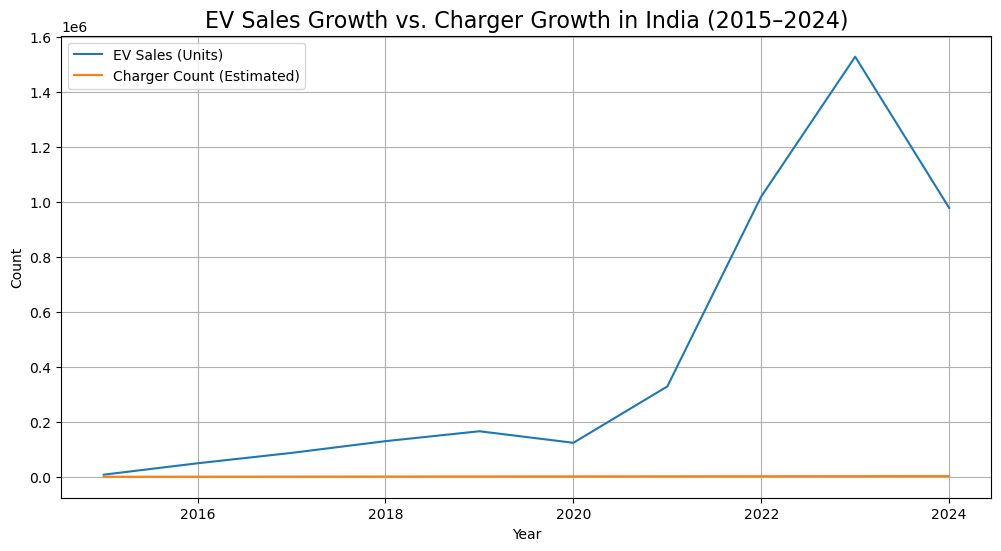

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_df, x='Year', y='EV_Sales', label='EV Sales (Units)')
sns.lineplot(data=growth_df, x='Year', y='Charger_Count', label='Charger Count (Estimated)')

plt.title('EV Sales Growth vs. Charger Growth in India (2015–2024)', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

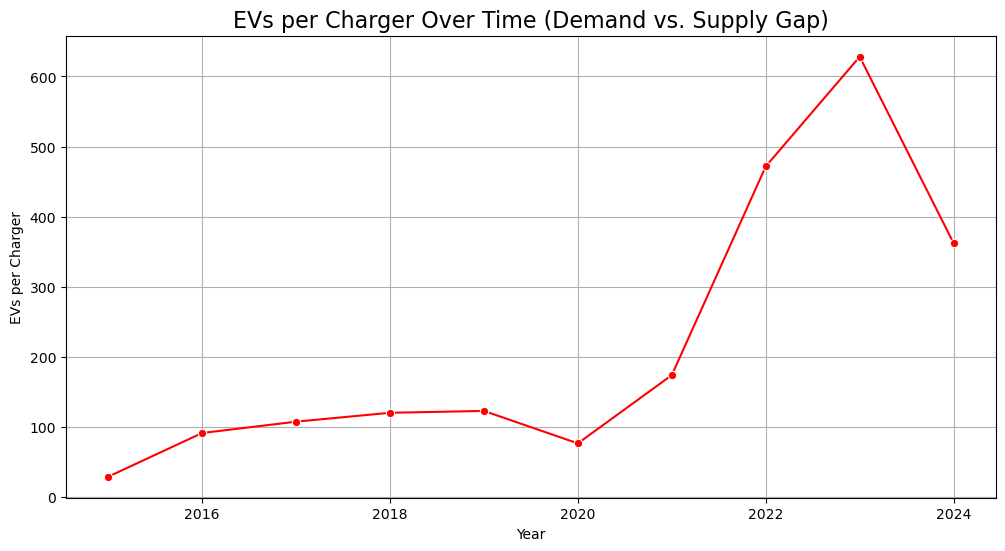

In [48]:
# EVs per Charger (Pressure) Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_df, x='Year', y='EVs_per_Charger', marker='o', color='red')

plt.title('EVs per Charger Over Time (Demand vs. Supply Gap)', fontsize=16)
plt.ylabel('EVs per Charger')
plt.xlabel('Year')
plt.grid(True)
plt.show()

### Explosive EV Adoption:
#### 1. EV sales in India have grown from ~7.7K units (2015) to over 1.5M units (2023) — a 197x increase.

#### 2. Major inflection point: Post-2020 surge driven by policy incentives (FAME II, state EV policies) and rising fuel costs.

### Charger Deployment Has Not Kept Pace:
#### Even under linear charger growth assumptions, the charging infra lags significantly:

#### 1. In 2015: ~29 EVs per charger (manageable load)

#### 2. In 2023: over 628 EVs per charger → critical stress point.

#### 3. Even by 2024 estimates, gap remains large (~362 EVs per charger).

## Market Attractiveness 2x2 Matrix (City Level)

In [49]:
city_ev_df = city_charger_merged.copy()

# Calculate Chargers per 1000 EVs
city_ev_df['Chargers_per_1000_EVs'] = (city_ev_df['Charger_Count'] / city_ev_df['Estimated_EV_Count']) * 1000

# Clean up any infinite or NaN values
city_ev_df['Chargers_per_1000_EVs'] = city_ev_df['Chargers_per_1000_EVs'].replace([float('inf'), -float('inf')], 0).fillna(0)

# Check result
city_ev_df[['city', 'Estimated_EV_Count', 'Charger_Count', 'Chargers_per_1000_EVs']].head(10)

city  Estimated_EV_Count  Charger_Count  Chargers_per_1000_EVs
0  Ahmedabad         1956.773995             12               6.132543
1  Alappuzha           61.178420              3              49.036899
2  Bengaluru                 NaN              1               0.000000
3    Chennai         1644.320894             48              29.191382
4   Dehradun          203.181033              4              19.686877
5      Delhi         3866.711533           2447             632.837484
6    Dhanbad          408.340413              3               7.346811
7     Dwarka                 NaN              3               0.000000
8    Gurgaon          308.001117              2               6.493483
9    Hardwar                 NaN              3               0.000000

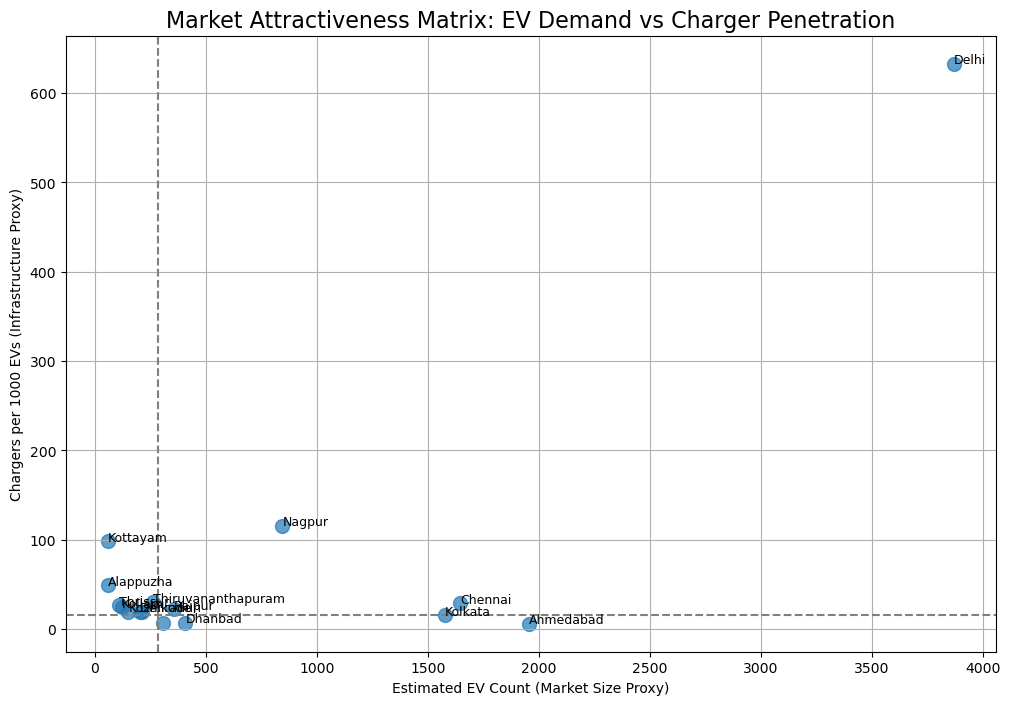

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Scatter plot
plt.scatter(city_ev_df['Estimated_EV_Count'], city_ev_df['Chargers_per_1000_EVs'], s=100, alpha=0.7)

# Median splits for quadrants
x_median = city_ev_df['Estimated_EV_Count'].median()
y_median = city_ev_df['Chargers_per_1000_EVs'].median()

plt.axvline(x=x_median, color='grey', linestyle='--')
plt.axhline(y=y_median, color='grey', linestyle='--')

# Annotate key cities (only top EV cities to avoid clutter)
for i, row in city_ev_df.iterrows():
    if row['Estimated_EV_Count'] > x_median * 1.2 or row['Chargers_per_1000_EVs'] > y_median * 1.2:
        plt.text(row['Estimated_EV_Count'], row['Chargers_per_1000_EVs'], row['city'], fontsize=9)

plt.title('Market Attractiveness Matrix: EV Demand vs Charger Penetration', fontsize=16)
plt.xlabel('Estimated EV Count (Market Size Proxy)')
plt.ylabel('Chargers per 1000 EVs (Infrastructure Proxy)')
plt.grid(True)
plt.show()


### Q1---> High EV Demand, High Charger Penetration:
#### Cities like Delhi has Mature markets with strong EV adoption and infrastructure

### Q2---> Low EV Demand, High Charger Penetration:
#### Cities like Kottayam, Alappuzha has Overbuilt infrastructure relative to current demand.

### Q3---> Low EV Demand, Low Charger Penetration:
#### Cities like Dhanbad, Dehradun, Hardwar has Emerging or nascent markets. 

### Q4---> High EV Demand, Low Charger Penetration
#### Cities like Chennai, Ahmedabad, Gurgaon has High priority for expansion. Demand is growing but infrastructure lags.

## FINANCIAL VIABILITY MODEL

In [51]:
# Assumptions
installation_cost = 100000  # ₹1L for AC charger
revenue_per_session = 150
base_sessions_per_day = 4
operating_cost_annual = 100000

# Function to estimate daily sessions based on EV count (capped at 4 per day)
def estimate_sessions(ev_count, charger_count):
    if pd.isna(ev_count) or ev_count == 0 or charger_count == 0:
        return 0
    ev_per_charger = ev_count / charger_count
    # Assume full utilization (4 sessions/day) if EVs per charger > 200, else proportionally lower
    utilization_factor = min(1, ev_per_charger / 200)
    return base_sessions_per_day * utilization_factor

# Apply to DataFrame
city_ev_df['Sessions_per_Day'] = city_ev_df.apply(lambda row: estimate_sessions(row['Estimated_EV_Count'], row['Charger_Count']), axis=1)
city_ev_df['Annual_Revenue'] = city_ev_df['Sessions_per_Day'] * revenue_per_session * 365
city_ev_df['Annual_Profit'] = city_ev_df['Annual_Revenue'] - operating_cost_annual

city_ev_df['Payback_Period_Years'] = city_ev_df.apply(
    lambda row: installation_cost / row['Annual_Profit'] if row['Annual_Profit'] > 0 else None,
    axis=1
)

city_ev_df['Attractive_Investment'] = city_ev_df['Payback_Period_Years'].apply(lambda x: 'Yes' if x and 3 <= x <= 5 else 'No')

# Display top cities
financial_summary = city_ev_df[city_ev_df['Annual_Revenue'] > 0].sort_values('Payback_Period_Years')
print(financial_summary[['city', 'Estimated_EV_Count', 'Charger_Count', 'Sessions_per_Day', 'Annual_Revenue', 'Annual_Profit', 'Payback_Period_Years', 'Attractive_Investment']])


                  city  Estimated_EV_Count  Charger_Count  Sessions_per_Day  \
0            Ahmedabad         1956.773995             12          3.261290   
8              Gurgaon          308.001117              2          3.080011   
6              Dhanbad          408.340413              3          2.722269   
1            Alappuzha           61.178420              3          0.407856   
3              Chennai         1644.320894             48          0.685134   
4             Dehradun          203.181033              4          1.015905   
5                Delhi         3866.711533           2447          0.031604   
12               Kochi          211.314316              4          1.056572   
13             Kolkata         1576.031385             25          1.260825   
14              Kollam          122.604484              3          0.817363   
15            Kottayam           60.726688              6          0.202422   
16           Kozhikode          151.782294          

### 1. Only 3 cities (Ahmedabad, Gurgaon, Dhanbad) show positive profit but still fail the target payback window (3–5 years)—though they come close.
### 2. All other cities suffer from:

##### * Too few EVs per charger → Low utilization

##### * Annual revenues fail to cover costs → Negative profits

### 3. Delhi, despite the largest EV count and charger count, has extremely low sessions per charger (high supply saturation)—an important strategic finding.

## SENSITVITY ANALYSIS

In [52]:
import numpy as np


sessions_range = [2, 3, 4, 5, 6]  # sessions/day
revenue_range = [120, 150, 180, 200]  # ₹ per session


sensitivity_results = []

for sessions in sessions_range:
    for revenue in revenue_range:
        for idx, row in city_ev_df.iterrows():
            if row['Estimated_EV_Count'] > 0 and row['Charger_Count'] > 0:
                # Recalculate sessions based on min rule
                ev_per_charger = row['Estimated_EV_Count'] / row['Charger_Count']
                utilization = min(1, ev_per_charger / 200)
                adjusted_sessions = sessions * utilization
            else:
                adjusted_sessions = 0

            annual_revenue = adjusted_sessions * revenue * 365
            annual_profit = annual_revenue - operating_cost_annual
            payback = installation_cost / annual_profit if annual_profit > 0 else np.nan
            attractive = 'Yes' if payback >= 3 and payback <= 5 else 'No'

            sensitivity_results.append({
                'City': row['city'],
                'Sessions_per_Day': sessions,
                'Revenue_per_Session': revenue,
                'Adjusted_Sessions': round(adjusted_sessions, 2),
                'Annual_Revenue': round(annual_revenue, 2),
                'Annual_Profit': round(annual_profit, 2),
                'Payback_Period_Years': round(payback, 2) if not np.isnan(payback) else None,
                'Attractive_Investment': attractive
            })


sensitivity_df = pd.DataFrame(sensitivity_results)


attractive_cases = sensitivity_df[sensitivity_df['Attractive_Investment'] == 'Yes']
print(attractive_cases.head(10))


        City  Sessions_per_Day  Revenue_per_Session  Adjusted_Sessions  \
133  Gurgaon                 3                  150               2.31   
463  Kolkata                 6                  180               1.89   

     Annual_Revenue  Annual_Profit  Payback_Period_Years Attractive_Investment  
133       126472.96       26472.96                  3.78                   Yes  
463       124254.31       24254.31                  4.12                   Yes  


### 1. Gurgaon and Kolkata—which failed in the base case—become viable investments under favorable utilization (sessions) and/or better pricing scenarios.

### 2. Even modest improvements in sessions/day and tariffs per session can swing projects into positive NPV/payback territory.

### 3. This supports an adaptive GTM strategy: one way is to prioritize these cities but only if accompanied by---->

#### * Awareness campaigns (to boost utilization)

#### * Potential for higher-value charging (DC fast, premium users)

In [53]:
sensitivity_df.to_csv('ev_charging_sensitivity_analysis.csv', index=False)

print("CSV file 'ev_charging_sensitivity_analysis.csv' has been created successfully.")

CSV file 'ev_charging_sensitivity_analysis.csv' has been created successfully.


In [54]:
growth_df.to_csv('growth.csv', index=False)

In [55]:
state_level_sorted.to_csv('state_level_ev_charger.csv', index=False)

city_ev_df.to_csv('city_level_ev_charger.csv', index=False)

power_type_counts = ev_final_clean['power_type'].value_counts().reset_index()
power_type_counts.columns = ['Power_Type', 'Count']
power_type_counts.to_csv('power_type_distribution.csv', index=False)

charger_capacity_stats = ev_final_clean['capacity_kW'].describe().reset_index()
charger_capacity_stats.columns = ['Metric', 'Value']
charger_capacity_stats.to_csv('charger_capacity_stats.csv', index=False)

In [56]:
ev_sales_melted.to_csv('ev_sales_trend.csv', index=False)

In [57]:
ev_final_clean.to_csv('charger_type_distribution.csv', index=False)

In [60]:
city_counts = ev_charging['city'].value_counts().reset_index()
city_counts.columns = ['city', 'Station_Count']

In [63]:
def classify_city_tier(count):
    if count >= 50:
        return 'Tier 1'
    elif count >= 20:
        return 'Tier 2'
    else:
        return 'Tier 3'

city_counts['Derived_Tier'] = city_counts['Station_Count'].apply(classify_city_tier)

In [66]:
ev_charging = ev_charging.merge(city_counts[['city', 'Derived_Tier']], on='city', how='left')

In [67]:
ev_charging

name          state  \
0                    Neelkanth Star DC Charging Station        Haryana   
1                          Galleria DC Charging Station        Haryana   
2     Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan   
3                     Food Carnival DC Charging Station  Uttar Pradesh   
4                     Food Carnival AC Charging Station  Uttar Pradesh   
...                                                 ...            ...   
1542                                        Tata Power          Kerala   
1543                                        Tata Power         Haryana   
1544                                        Tata Power         Haryana   
1545                                        Tata Power           Jammu   
1546                                        Tata Power       Karnataka   

           city                                            address   latitude  \
0      Gurugram  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...  29.601900   
1      Gurugram  DLF Phase IV, Sector 28, Gurugram, Haryana 122022  28.467300   
2        Behror  Jaipur to Delhi Road, Behror Midway, Behror, R...  27.875100   
3      Khatauli  Fun and Food Carnival, NH 58, Khatauli Bypass,...  29.310500   
4      Khatauli  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...  29.310500   
...         ...                                                ...        ...   
1542     Munnar  Gokulam Park Munnar, Power House Road, South C...  10.029793   
1543    Gurgaon  Vatika Town Square II, Sector 82, Sector 82, V...  28.390459   
1544    Gurgaon  Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...  28.411072   
1545      Jammu  Le ROI, Jammu, Railway Station, Jammu, Jammu &...  32.706412   
1546  Mangalore  Auto Matrix, Bejai, Manjusha Building, Bejai, ...  12.885716   

      longitude  type Derived_Tier  
0     76.980300  12.0       Tier 3  
1     77.081800  12.0       Tier 3  
2     76.276000  12.0       Tier 3  
3     77.721800  12.0       Tier 3  
4     77.721800  12.0       Tier 3  
...         ...   ...          ...  
1542  77.045859   7.0       Tier 3  
1543  76.959200   7.0       Tier 2  
1544  77.040546   7.0       Tier 2  
1545  74.879203   7.0       Tier 3  
1546  74.843476   7.0       Tier 3  

[1547 rows x 8 columns]

In [69]:
ev_charging.to_csv("charging_stations_with_tiers.csv", index=False)

C:\Users\alaan\AppData\Local\Temp\ipykernel_1596\1702757519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ev_charging, x='Derived_Tier', order=['Tier 1', 'Tier 2', 'Tier 3'], palette='Set2')


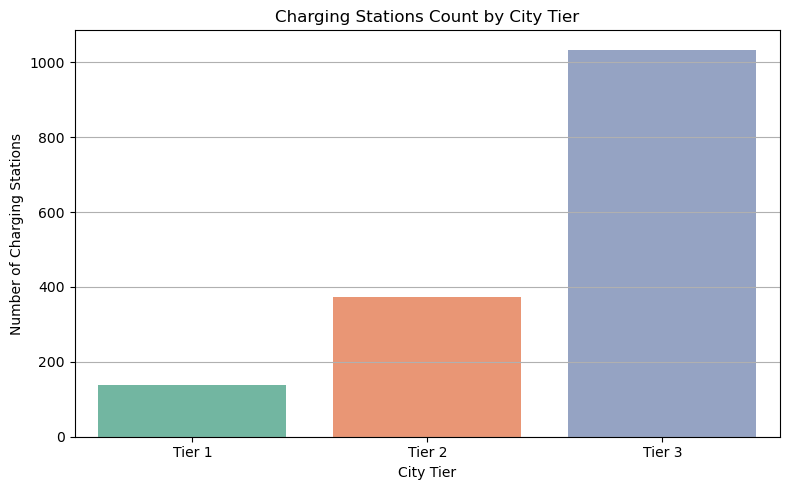

In [70]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ev_charging, x='Derived_Tier', order=['Tier 1', 'Tier 2', 'Tier 3'], palette='Set2')
plt.title('Charging Stations Count by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Number of Charging Stations')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('EV_Dataset.csv')

print("Initial shape:", df.shape)
print(df.head())

Initial shape: (96845, 8)
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [3]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month_name'] = df['month_name'].str.strip().str.title()

In [5]:
text_cols = ['state', 'vehicle_class', 'vehicle_category', 'vehicle_type']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [6]:
df['ev_sales_quantity'] = pd.to_numeric(df['ev_sales_quantity'], errors='coerce').fillna(0).astype(int)

In [7]:
df = df.dropna(subset=['date'])

In [8]:
df = df.drop_duplicates()

In [9]:
df['month_year'] = df['date'].dt.to_period('M').astype(str)

In [10]:
print("\nCleaned dataset shape:", df.shape)
print(df.dtypes)
print(df.head())


Cleaned dataset shape: (96845, 9)
year                        float64
month_name                   object
date                 datetime64[ns]
state                        object
vehicle_class                object
vehicle_category             object
vehicle_type                 object
ev_sales_quantity             int32
month_year                   object
dtype: object
     year month_name       date           state         vehicle_class  \
0  2014.0        Jan 2014-01-01  Andhra Pradesh       Adapted Vehicle   
1  2014.0        Jan 2014-01-01  Andhra Pradesh  Agricultural Tractor   
2  2014.0        Jan 2014-01-01  Andhra Pradesh             Ambulance   
3  2014.0        Jan 2014-01-01  Andhra Pradesh   Articulated Vehicle   
4  2014.0        Jan 2014-01-01  Andhra Pradesh                   Bus   

  vehicle_category vehicle_type  ev_sales_quantity month_year  
0           Others       Others                  0    2014-01  
1           Others       Others                  0    2014-0

In [11]:
ev_trend = df.groupby("month_year")["ev_sales_quantity"].sum().reset_index()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

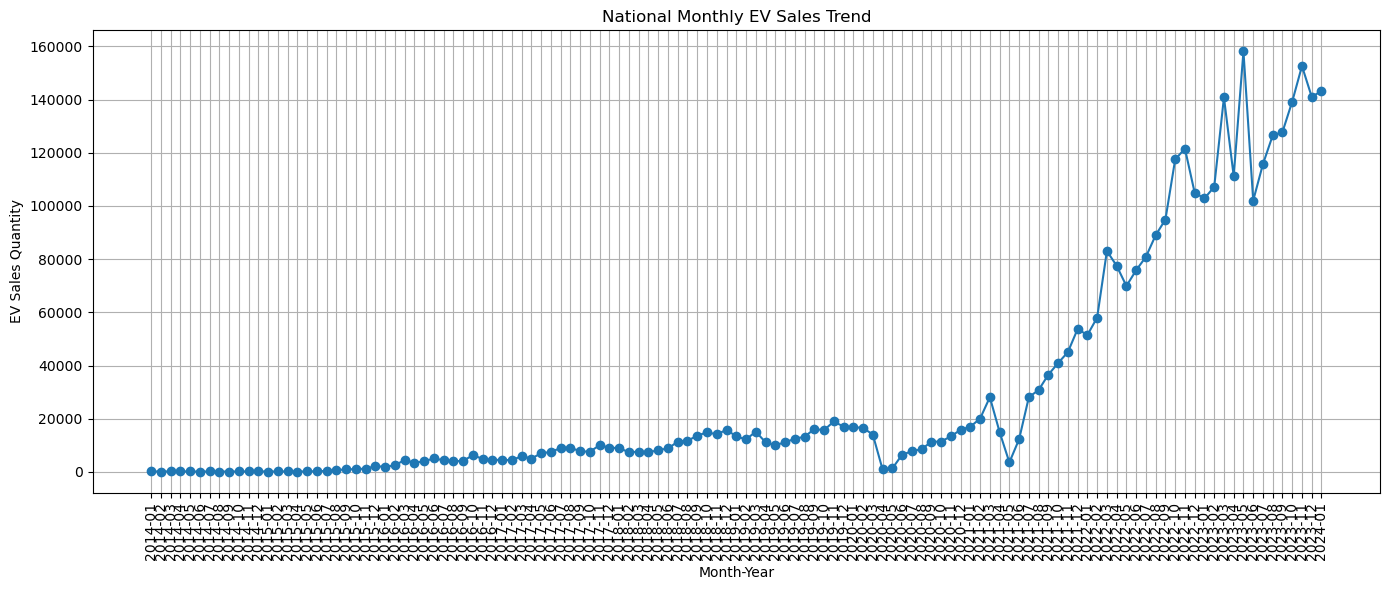

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(ev_trend['month_year'], ev_trend['ev_sales_quantity'], marker='o')
plt.xticks(rotation=90)
plt.title('National Monthly EV Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
ev_by_state = df.groupby("state")["ev_sales_quantity"].sum().reset_index().sort_values(by="ev_sales_quantity", ascending=False)

C:\Users\alaan\AppData\Local\Temp\ipykernel_11696\3045946929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ev_by_state, y="state", x="ev_sales_quantity", palette="viridis")


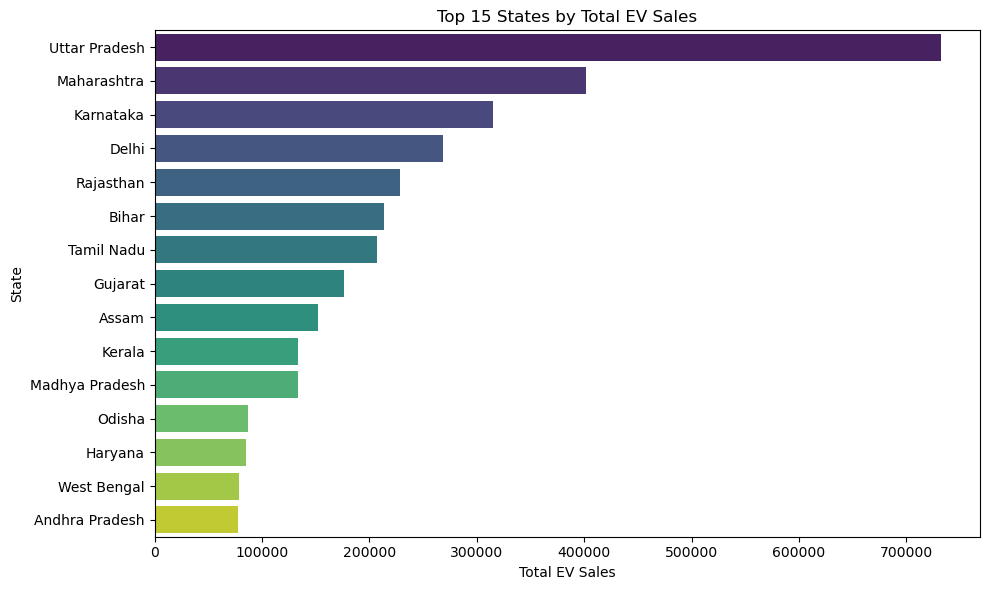

In [19]:
ev_by_state = df.groupby("state")["ev_sales_quantity"].sum().reset_index().sort_values(by="ev_sales_quantity", ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(data=ev_by_state, y="state", x="ev_sales_quantity", palette="viridis")
plt.title('Top 15 States by Total EV Sales')
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [13]:
ev_by_class = df.groupby(["month_year", "vehicle_class"])["ev_sales_quantity"].sum().reset_index()

C:\Users\alaan\AppData\Local\Temp\ipykernel_11696\2938860602.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


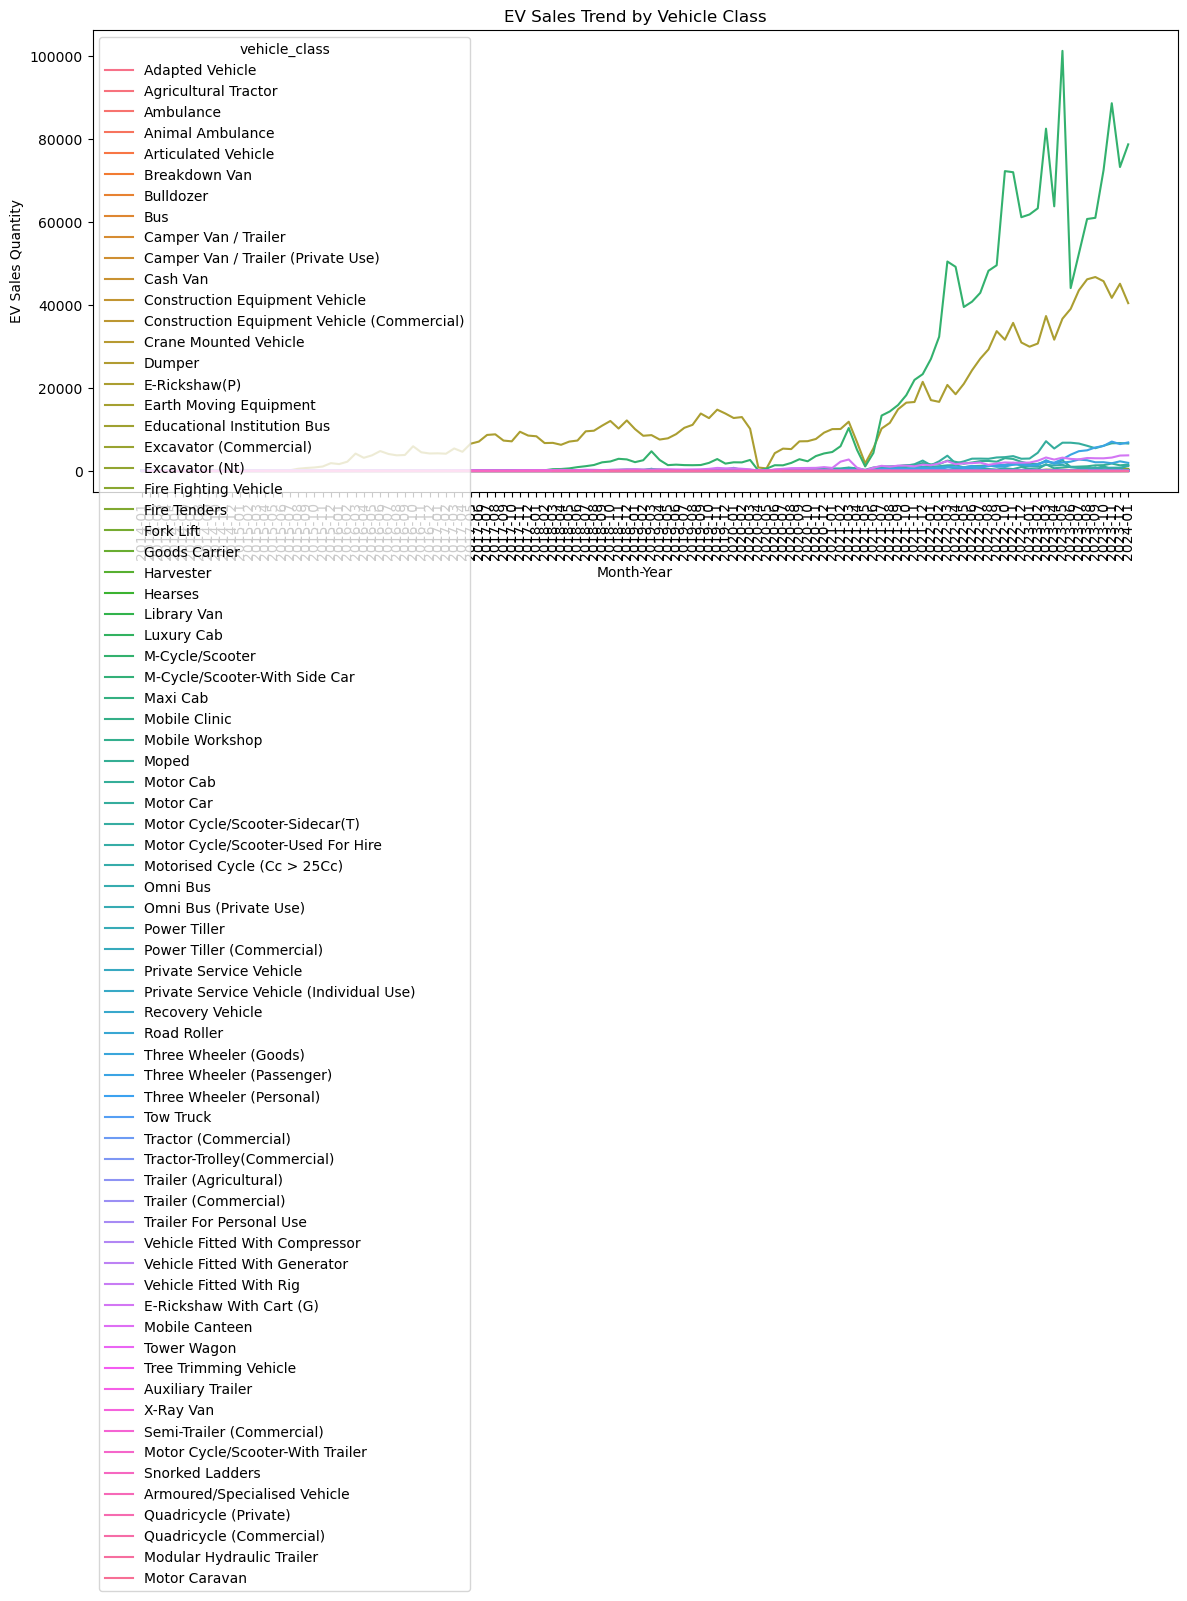

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=ev_by_class, x="month_year", y="ev_sales_quantity", hue="vehicle_class")
plt.title('EV Sales Trend by Vehicle Class')
plt.xlabel('Month-Year')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
ev_by_category = df.groupby("vehicle_category")["ev_sales_quantity"].sum().reset_index().sort_values(by="ev_sales_quantity", ascending=False)

C:\Users\alaan\AppData\Local\Temp\ipykernel_11696\4224900560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ev_by_category, y="vehicle_category", x="ev_sales_quantity", palette="coolwarm")


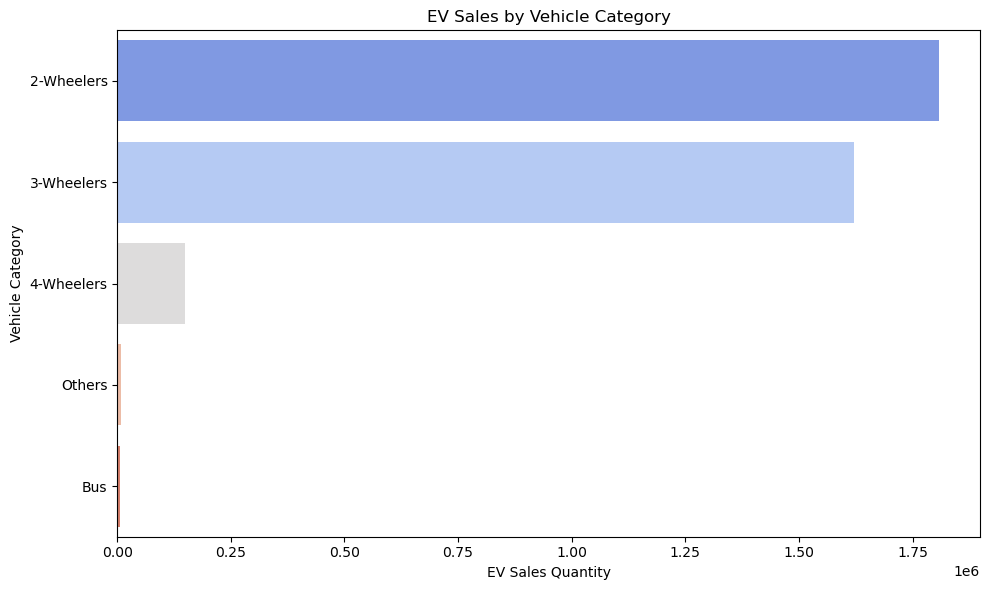

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ev_by_category, y="vehicle_category", x="ev_sales_quantity", palette="coolwarm")
plt.title("EV Sales by Vehicle Category")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Category")
plt.tight_layout()
plt.show()

In [15]:
ev_by_type = df.groupby("vehicle_type")["ev_sales_quantity"].sum().reset_index().sort_values(by="ev_sales_quantity", ascending=False)

C:\Users\alaan\AppData\Local\Temp\ipykernel_11696\396603632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ev_by_type, y="vehicle_type", x="ev_sales_quantity", palette="magma")


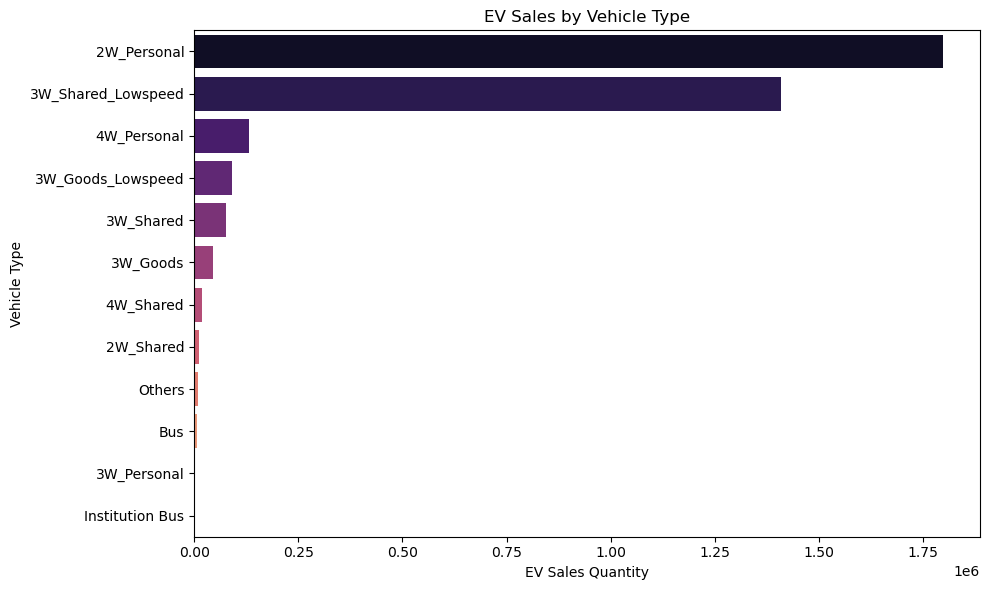

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ev_by_type, y="vehicle_type", x="ev_sales_quantity", palette="magma")
plt.title("EV Sales by Vehicle Type")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

In [16]:
df['year'] = df['year'].astype(int)
ev_heatmap = df.groupby(["year", "vehicle_class"])["ev_sales_quantity"].sum().unstack(fill_value=0)

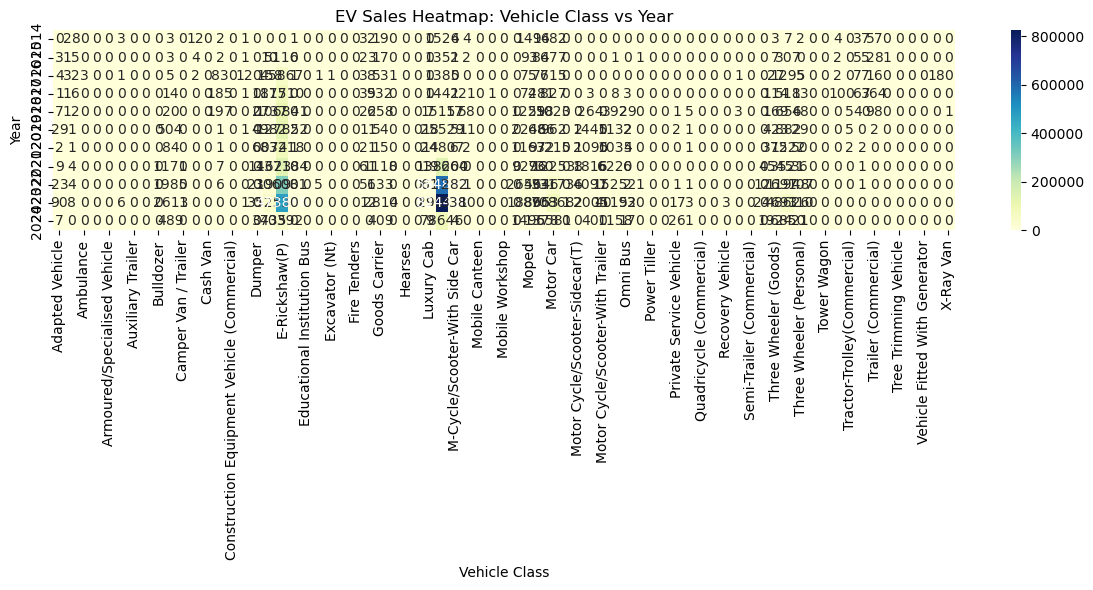

In [24]:
heatmap_data = df.groupby(["year", "vehicle_class"])["ev_sales_quantity"].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("EV Sales Heatmap: Vehicle Class vs Year")
plt.ylabel("Year")
plt.xlabel("Vehicle Class")
plt.tight_layout()
plt.show()

In [25]:
ev_trend.to_csv("ev_trend.csv", index=False)
ev_by_state.to_csv("ev_by_state.csv", index=False)
ev_by_class.to_csv("ev_by_class.csv", index=False)
ev_by_category.to_csv("ev_by_category.csv", index=False)
ev_by_type.to_csv("ev_by_type.csv", index=False)
ev_heatmap.to_csv("ev_heatmap.csv")

In [26]:
df

year month_name       date                     state  \
0      2014        Jan 2014-01-01            Andhra Pradesh   
1      2014        Jan 2014-01-01            Andhra Pradesh   
2      2014        Jan 2014-01-01            Andhra Pradesh   
3      2014        Jan 2014-01-01            Andhra Pradesh   
4      2014        Jan 2014-01-01            Andhra Pradesh   
...     ...        ...        ...                       ...   
96840  2023        Dec 2023-12-01  Andaman & Nicobar Island   
96841  2023        Dec 2023-12-01  Andaman & Nicobar Island   
96842  2023        Dec 2023-12-01  Andaman & Nicobar Island   
96843  2023        Dec 2023-12-01  Andaman & Nicobar Island   
96844  2023        Dec 2023-12-01  Andaman & Nicobar Island   

                           vehicle_class vehicle_category vehicle_type  \
0                        Adapted Vehicle           Others       Others   
1                   Agricultural Tractor           Others       Others   
2                              Ambulance           Others       Others   
3                    Articulated Vehicle           Others       Others   
4                                    Bus              Bus          Bus   
...                                  ...              ...          ...   
96840                          Motor Car       4-Wheelers  4W_Personal   
96841  Motor Cycle/Scooter-Used For Hire       2-Wheelers    2W_Shared   
96842                           Omni Bus              Bus          Bus   
96843              Three Wheeler (Goods)       3-Wheelers     3W_Goods   
96844          Three Wheeler (Passenger)       3-Wheelers    3W_Shared   

       ev_sales_quantity month_year  
0                      0    2014-01  
1                      0    2014-01  
2                      0    2014-01  
3                      0    2014-01  
4                      0    2014-01  
...                  ...        ...  
96840                  1    2023-12  
96841                  5    2023-12  
96842                  0    2023-12  
96843                  0    2023-12  
96844                  0    2023-12  

[96845 rows x 9 columns]

In [27]:
df.to_csv("EV_Dataset_Prepared_For_PowerBI.csv", index=False)

In [28]:
data = {
    'Metric': [
        'Market Presence', 'Charging Tech', 'Pricing Model', 'Revenue Model', 'Partnerships',
        'User Interface', 'Data & Analytics', 'Compliance & Safety', 'Value-added Services', 'Funding & Scale'
    ],
    'Tata Power EZ Charge': [5, 4, 4, 4, 5, 4, 4, 5, 3, 4],
    'Statiq': [4, 4, 4, 4, 5, 4, 4, 5, 3, 4],
    'Ather Grid': [3, 3, 3, 3, 4, 4, 4, 5, 4, 5],
    'ChargeZone': [5, 5, 4, 5, 5, 4, 4, 5, 4, 5]
}

# Create DataFrame
df = pd.DataFrame(data)
categories = list(df['Metric'])
players = ['Tata Power EZ Charge', 'Statiq', 'Ather Grid', 'ChargeZone']

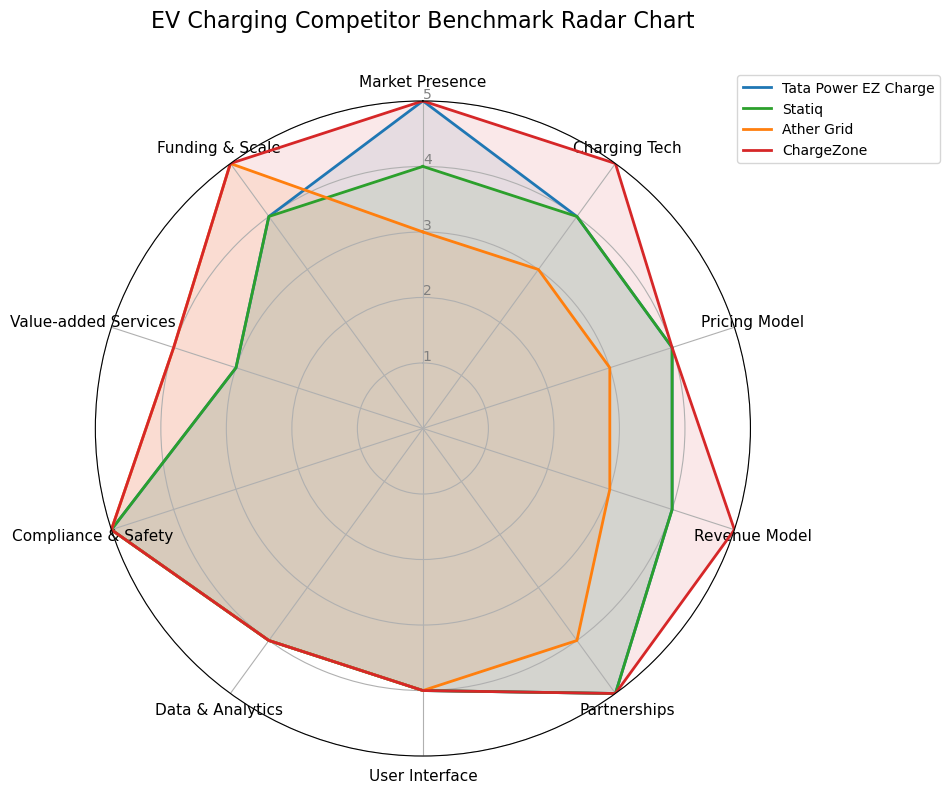

In [29]:
N = len(categories)

# Setup radar plot
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # repeat first to close the plot

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each competitor
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']

for idx, player in enumerate(players):
    values = df[player].tolist()
    values += values[:1]  # repeat first value to close the circle
    ax.plot(angles, values, label=player, linewidth=2, linestyle='solid', color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])

# Set category labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=11)

# Axis settings
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ['1','2','3','4','5'], color="grey", size=10)
plt.ylim(0, 5)

# Title and legend
plt.title('EV Charging Competitor Benchmark Radar Chart', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv("EV_Dataset.csv")  

df = df[df['EV_Sales_Quantity'] > 0]
df['Year'] = df['Year'].astype('int')

In [4]:
yearly_sales = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
total_sales_by_year = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index().rename(columns={'EV_Sales_Quantity': 'total_sales'})
yearly_sales = yearly_sales.merge(total_sales_by_year, on='Year')
yearly_sales['category_share'] = yearly_sales['EV_Sales_Quantity'] / yearly_sales['total_sales']

In [6]:
yearly_sales

Year Vehicle_Category  EV_Sales_Quantity  total_sales  category_share
0   2014       2-Wheelers             1679.0       2392.0        0.701923
1   2014       3-Wheelers               12.0       2392.0        0.005017
2   2014       4-Wheelers              498.0       2392.0        0.208194
3   2014              Bus                3.0       2392.0        0.001254
4   2014           Others              200.0       2392.0        0.083612
5   2015       2-Wheelers             1447.0       7805.0        0.185394
6   2015       3-Wheelers             5440.0       7805.0        0.696989
7   2015       4-Wheelers              761.0       7805.0        0.097502
8   2015              Bus                4.0       7805.0        0.000512
9   2015           Others              153.0       7805.0        0.019603
10  2016       2-Wheelers             1460.0      49855.0        0.029285
11  2016       3-Wheelers            47352.0      49855.0        0.949794
12  2016       4-Wheelers              692.0      49855.0        0.013880
13  2016              Bus                5.0      49855.0        0.000100
14  2016           Others              346.0      49855.0        0.006940
15  2017       2-Wheelers             1528.0      87420.0        0.017479
16  2017       3-Wheelers            83530.0      87420.0        0.955502
17  2017       4-Wheelers             1108.0      87420.0        0.012674
18  2017              Bus               17.0      87420.0        0.000194
19  2017           Others             1237.0      87420.0        0.014150
20  2018       2-Wheelers            17059.0     130254.0        0.130967
21  2018       3-Wheelers           110451.0     130254.0        0.847966
22  2018       4-Wheelers             1588.0     130254.0        0.012192
23  2018              Bus               49.0     130254.0        0.000376
24  2018           Others             1107.0     130254.0        0.008499
25  2019       2-Wheelers            30357.0     166819.0        0.181976
26  2019       3-Wheelers           134168.0     166819.0        0.804273
27  2019       4-Wheelers             1666.0     166819.0        0.009987
28  2019              Bus              506.0     166819.0        0.003033
29  2019           Others              122.0     166819.0        0.000731
30  2020       2-Wheelers            29110.0     124684.0        0.233470
31  2020       3-Wheelers            91236.0     124684.0        0.731738
32  2020       4-Wheelers             4201.0     124684.0        0.033693
33  2020              Bus               88.0     124684.0        0.000706
34  2020           Others               49.0     124684.0        0.000393
35  2021       2-Wheelers           156196.0     331498.0        0.471182
36  2021       3-Wheelers           159909.0     331498.0        0.482383
37  2021       4-Wheelers            13002.0     331498.0        0.039222
38  2021              Bus             1177.0     331498.0        0.003551
39  2021           Others             1214.0     331498.0        0.003662
40  2022       2-Wheelers           631090.0    1024723.0        0.615864
41  2022       3-Wheelers           352742.0    1024723.0        0.344232
42  2022       4-Wheelers            38170.0    1024723.0        0.037249
43  2022              Bus             1988.0    1024723.0        0.001940
44  2022           Others              733.0    1024723.0        0.000715
45  2023       2-Wheelers           856836.0    1525179.0        0.561794
46  2023       3-Wheelers           582548.0    1525179.0        0.381954
47  2023       4-Wheelers            80121.0    1525179.0        0.052532
48  2023              Bus             2666.0    1525179.0        0.001748
49  2023           Others             3008.0    1525179.0        0.001972
50  2024       2-Wheelers            81343.0     143182.0        0.568109
51  2024       3-Wheelers            52922.0     143182.0        0.369613
52  2024       4-Wheelers             7968.0     143182.0        0.055649
53  2024

In [5]:
# Define assumptions
charging_sessions_per_month = {
    'Two Wheeler': 5,
    'Three Wheeler': 10,
    'Car': 6,
    'Others': 8
}
avg_kWh_per_session = {
    'Two Wheeler': 3,
    'Three Wheeler': 5,
    'Car': 14,
    'Others': 8
}
cost_per_kWh = {
    'public': 12,
    'private': 8
}
public_use_ratio = 0.3
target_capture_ratio = 0.1

In [7]:
# Create TAM/SAM/SOM estimation records
records = []

for year in yearly_sales['Year'].unique():
    yearly_df = yearly_sales[yearly_sales['Year'] == year]
    for _, row in yearly_df.iterrows():
        category = row['Vehicle_Category']
        category_group = category if category in charging_sessions_per_month else 'Others'

        total_evs = row['EV_Sales_Quantity']
        monthly_sessions = charging_sessions_per_month[category_group]
        kWh_per_session = avg_kWh_per_session[category_group]

        annual_sessions = total_evs * monthly_sessions * 12
        annual_kWh = annual_sessions * kWh_per_session

        tam = annual_kWh * cost_per_kWh['public']
        sam_kWh = annual_kWh * public_use_ratio
        sam = sam_kWh * cost_per_kWh['public']
        som = sam * target_capture_ratio

        records.append({
            'Year': year,
            'Vehicle Category': category,
            'Total EVs Sold': total_evs,
            'Annual Sessions': annual_sessions,
            'Energy Demand (kWh)': annual_kWh,
            'TAM (₹ Cr)': round(tam / 1e7, 2),
            'SAM (₹ Cr)': round(sam / 1e7, 2),
            'SOM (₹ Cr)': round(som / 1e7, 2)
        })

# Final DataFrame
tam_df = pd.DataFrame(records)

In [8]:
print(tam_df.head())

   Year Vehicle Category  Total EVs Sold  Annual Sessions  \
0  2014       2-Wheelers          1679.0         161184.0   
1  2014       3-Wheelers            12.0           1152.0   
2  2014       4-Wheelers           498.0          47808.0   
3  2014              Bus             3.0            288.0   
4  2014           Others           200.0          19200.0   

   Energy Demand (kWh)  TAM (₹ Cr)  SAM (₹ Cr)  SOM (₹ Cr)  
0            1289472.0        1.55        0.46        0.05  
1               9216.0        0.01        0.00        0.00  
2             382464.0        0.46        0.14        0.01  
3               2304.0        0.00        0.00        0.00  
4             153600.0        0.18        0.06        0.01  


In [9]:
tam_df.to_csv("EV_TAM_SAM_SOM_Estimation.csv", index=False)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
tam_df['Year'] = tam_df['Year'].astype(str)

# Aggregate TAM, SAM, SOM by Year
agg_df = tam_df.groupby("Year")[["TAM (₹ Cr)", "SAM (₹ Cr)", "SOM (₹ Cr)"]].sum().reset_index()

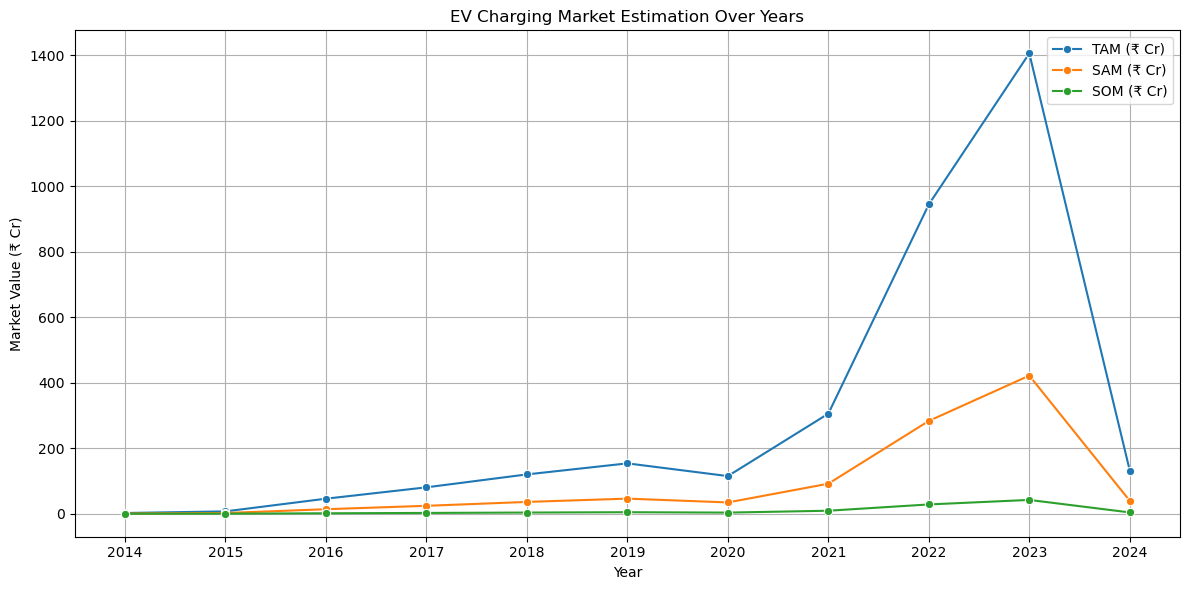

In [12]:
# --- Plot 1: Line Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_df, x='Year', y='TAM (₹ Cr)', label='TAM (₹ Cr)', marker="o")
sns.lineplot(data=agg_df, x='Year', y='SAM (₹ Cr)', label='SAM (₹ Cr)', marker="o")
sns.lineplot(data=agg_df, x='Year', y='SOM (₹ Cr)', label='SOM (₹ Cr)', marker="o")
plt.title("EV Charging Market Estimation Over Years")
plt.ylabel("Market Value (₹ Cr)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\alaan\AppData\Local\Temp\ipykernel_14168\1505547217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_df, x="Vehicle Category", y="SOM (₹ Cr)", palette="mako")


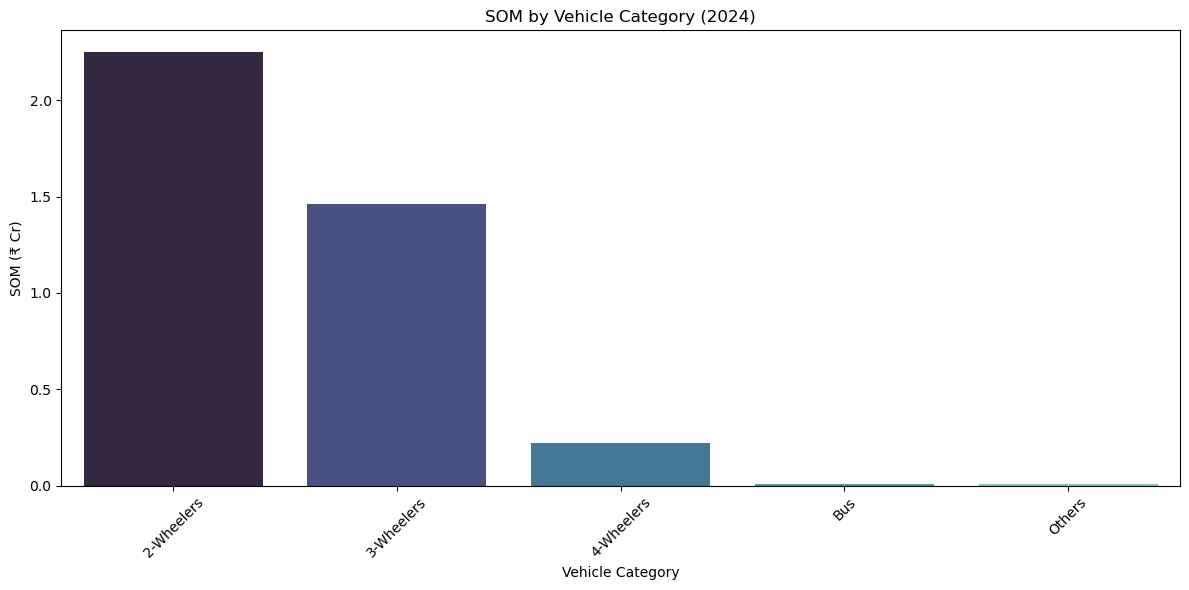

In [13]:
# --- Plot 2: SOM by Vehicle Category (latest year) ---
latest_year = tam_df["Year"].max()
latest_df = tam_df[tam_df["Year"] == latest_year]

plt.figure(figsize=(12, 6))
sns.barplot(data=latest_df, x="Vehicle Category", y="SOM (₹ Cr)", palette="mako")
plt.title(f"SOM by Vehicle Category ({latest_year})")
plt.ylabel("SOM (₹ Cr)")
plt.xlabel("Vehicle Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

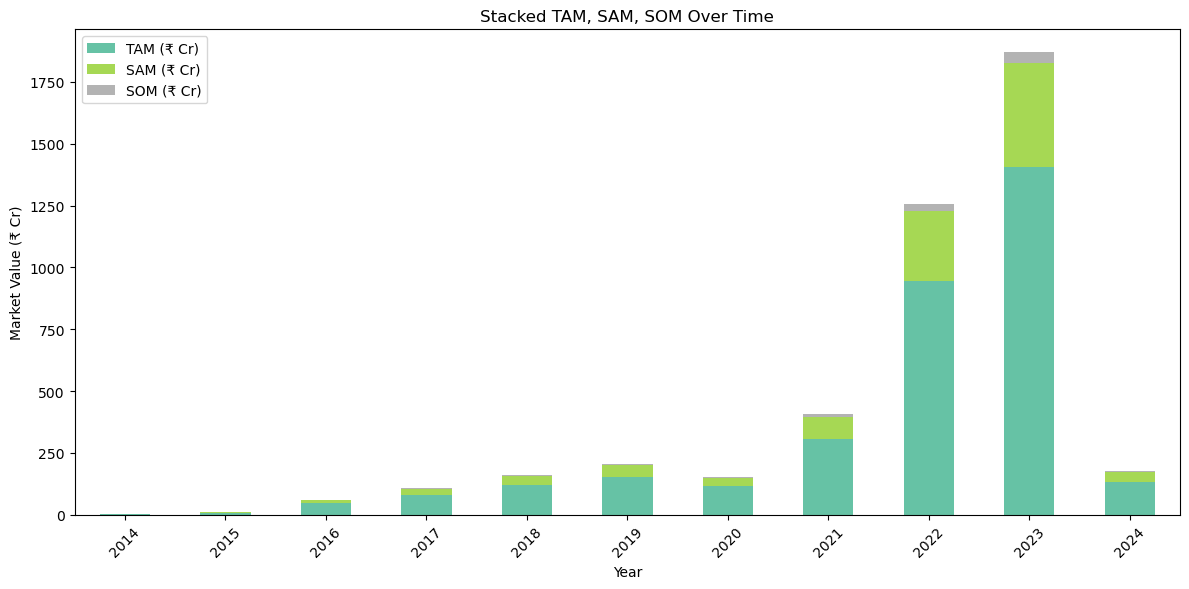

In [14]:
# --- Plot 3: Stacked Bar Chart TAM, SAM, SOM ---
agg_df.set_index('Year')[["TAM (₹ Cr)", "SAM (₹ Cr)", "SOM (₹ Cr)"]].plot(
    kind='bar', stacked=True, colormap='Set2', figsize=(12,6))
plt.title("Stacked TAM, SAM, SOM Over Time")
plt.ylabel("Market Value (₹ Cr)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import squarify  # pip install squarify
import pandas as pd

In [2]:
labels = ["Private EV Owners", "Fleet Operators", "Real Estate & Retail", "Highway Users"]
sizes = [85, 90, 70, 80]  # These are strategic scores or weights
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

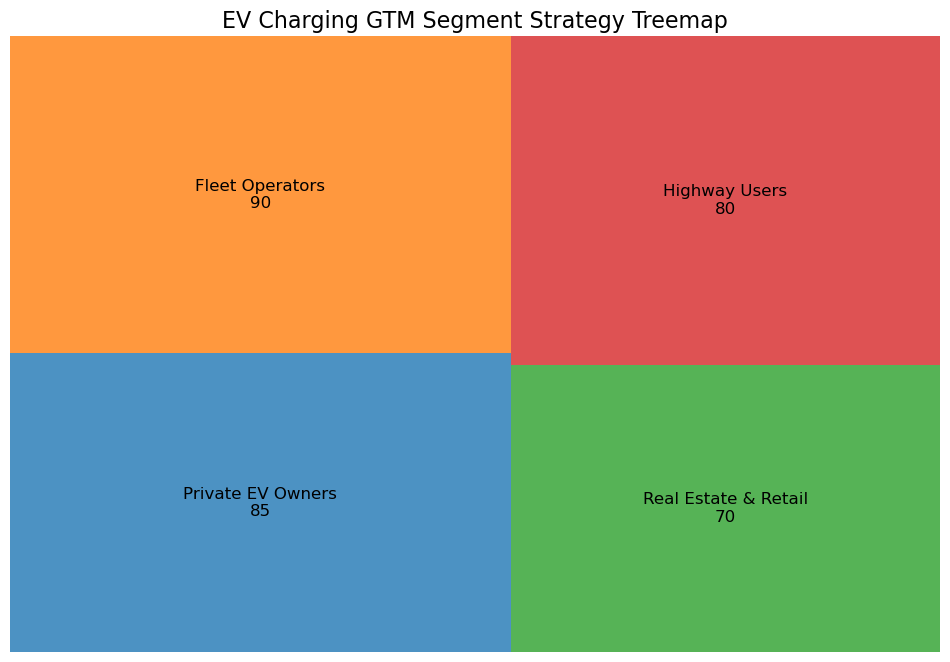

In [3]:
label_display = [f"{label}\n{size}" for label, size in zip(labels, sizes)]

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=label_display, color=colors, alpha=0.8, text_kwargs={'fontsize': 12})
plt.axis('off')
plt.title("EV Charging GTM Segment Strategy Treemap", fontsize=16)
plt.show()

In [7]:
import numpy as np

In [8]:
# Define attributes
attributes = [
    "Convenience", "Uptime/Speed", "Revenue Potential",
    "Green Integration", "Tech Savvy UX", "Scalability"
]

# Number of variables we're plotting
num_vars = len(attributes)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Data for each segment (1-5 scale)
segments = {
    "Private EV Owners": [5, 3, 3, 4, 5, 4],
    "Fleet Operators":   [3, 5, 5, 3, 4, 5],
    "Real Estate & Retail": [4, 2, 4, 5, 3, 3],
    "Highway Users":     [3, 5, 4, 4, 4, 5],
}


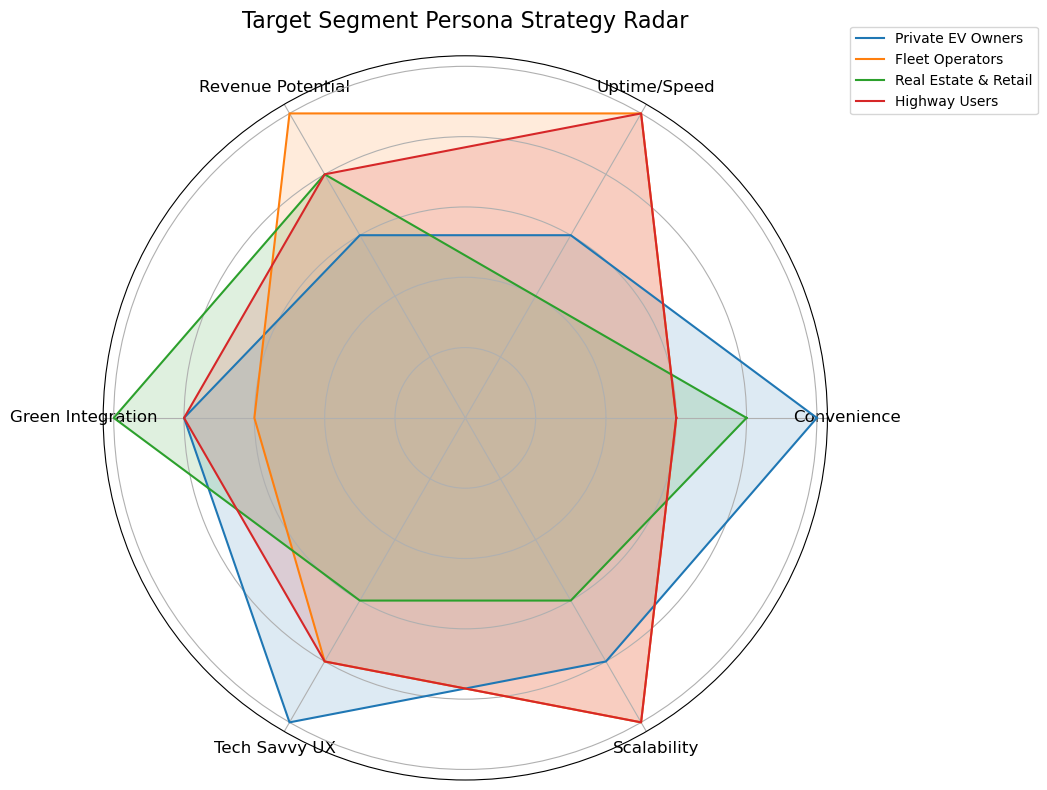

In [9]:
# Plot setup
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each segment
for segment, values in segments.items():
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=segment)
    ax.fill(angles, values, alpha=0.15)

# Draw labels
ax.set_title("Target Segment Persona Strategy Radar", size=16, pad=20)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes, fontsize=12)
ax.set_yticklabels([])
ax.grid(True)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.show()

Private EV Owners prioritize Convenience and UX.

Fleet Operators focus on Uptime, Scalability, and Revenue.

Real Estate prioritizes Green Integration and Revenue.

Highway Users value Speed, Reliability, and Scalability.

In [10]:
# Define attributes and angles
attributes = [
    "Convenience", "Uptime/Speed", "Revenue Potential",
    "Green Integration", "Tech Savvy UX", "Scalability"
]
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Define data for each persona (1-5 scale)
personas = {
    "Private EV Owners (Priya Nair)":       [5, 3, 3, 4, 5, 4],
    "Fleet Operators (Ahmed Khan)":         [3, 5, 5, 3, 4, 5],
    "Real Estate & Retail (Ritu Sharma)":   [4, 2, 4, 5, 3, 3],
    "Highway Users (Arvind Joshi)":         [3, 5, 4, 4, 4, 5],
}

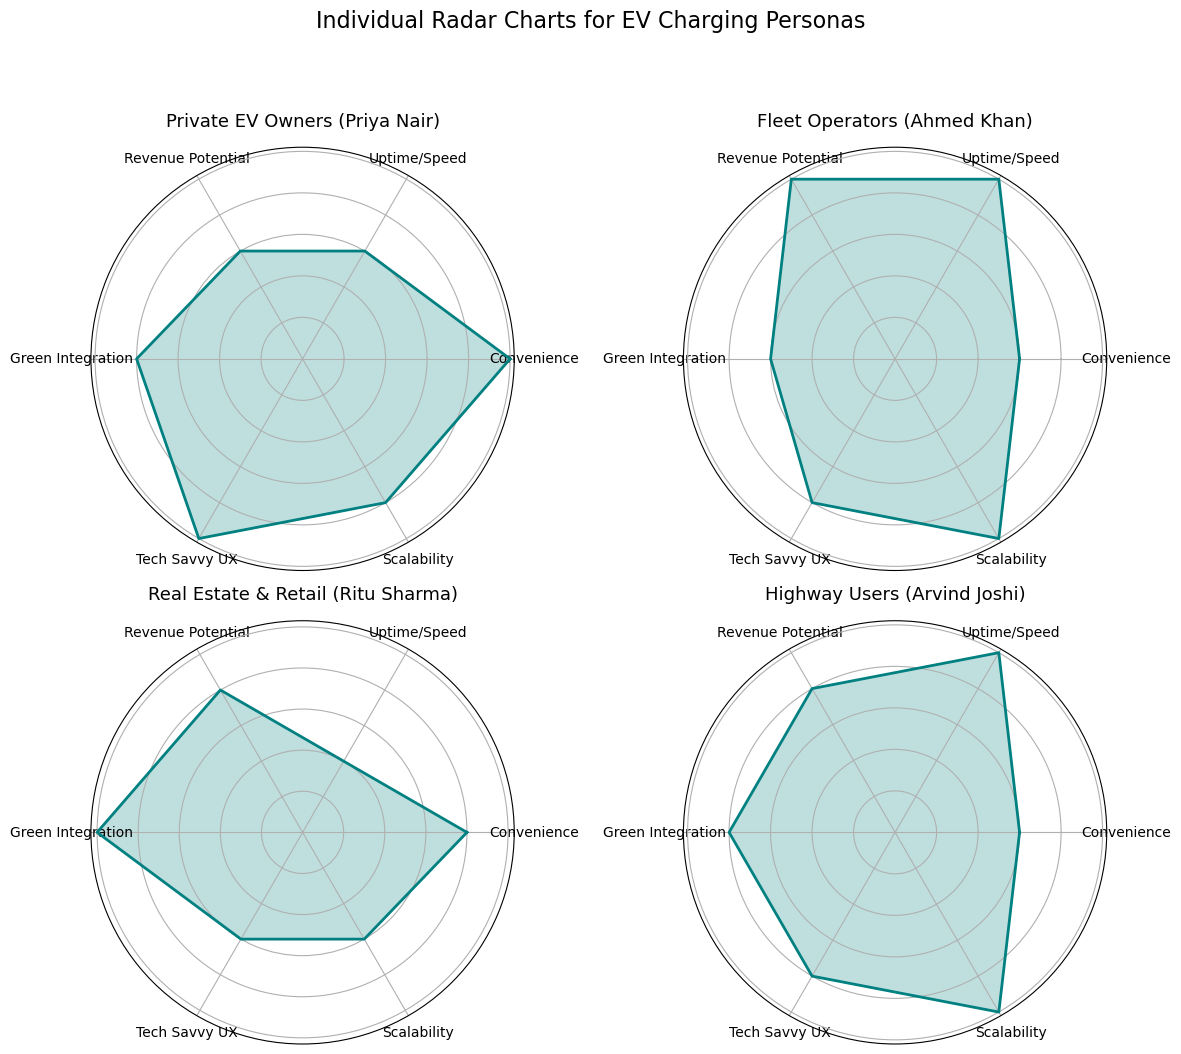

In [11]:
# Set up plot layout
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12, 10))
axs = axs.flatten()

# Plot each persona
for idx, (persona, values) in enumerate(personas.items()):
    ax = axs[idx]
    data = values + values[:1]  # loop the values

    ax.plot(angles, data, color='teal', linewidth=2)
    ax.fill(angles, data, color='teal', alpha=0.25)

    ax.set_title(persona, size=13, pad=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=10)
    ax.set_yticklabels([])
    ax.grid(True)

# Layout adjustments
plt.suptitle("Individual Radar Charts for EV Charging Personas", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [12]:
labels = [
    "Smart Tech Stack", "Green Energy Use", "Location Footprint",
    "UX & App Capabilities", "Franchise/OEM Tie-ups",
    "Cost Advantage", "Regulatory Compliance", "Data & Analytics Strength"
]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 


players = {
    "Tata Power EZ Charge": [4, 5, 5, 4, 5, 4, 5, 5],
    "Statiq": [4, 4, 4, 4, 4, 3, 4, 4],
    "Ather Grid": [4, 4, 3, 5, 3, 3, 4, 4],
    "ChargeZone": [4, 4, 5, 4, 4, 4, 4, 4],
}

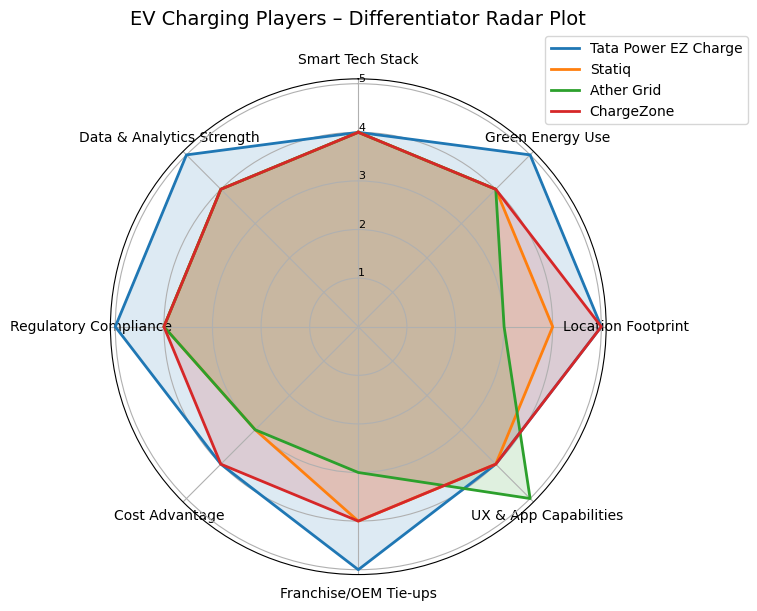

In [13]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


for idx, (player, scores) in enumerate(players.items()):
    data = scores + scores[:1]
    ax.plot(angles, data, label=player, color=colors[idx], linewidth=2)
    ax.fill(angles, data, color=colors[idx], alpha=0.15)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
ax.set_rlabel_position(0)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=8)
ax.set_title("EV Charging Players – Differentiator Radar Plot", fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

In [14]:
# Define the data
data = {
    "Differentiators": [
        "Smart Tech Stack", "Green Energy Use", "Location Footprint",
        "UX & App Capabilities", "Franchise/OEM Tie-ups",
        "Cost Advantage", "Regulatory Compliance", "Data & Analytics Strength"
    ],
    "Tata Power EZ Charge": [4, 5, 5, 4, 5, 4, 5, 5],
    "Statiq": [4, 4, 4, 4, 4, 3, 4, 4],
    "Ather Grid": [4, 4, 3, 5, 3, 3, 4, 4],
    "ChargeZone": [4, 4, 5, 4, 4, 4, 4, 4]
}

df = pd.DataFrame(data)
df.set_index("Differentiators", inplace=True)

In [16]:
import seaborn as sns

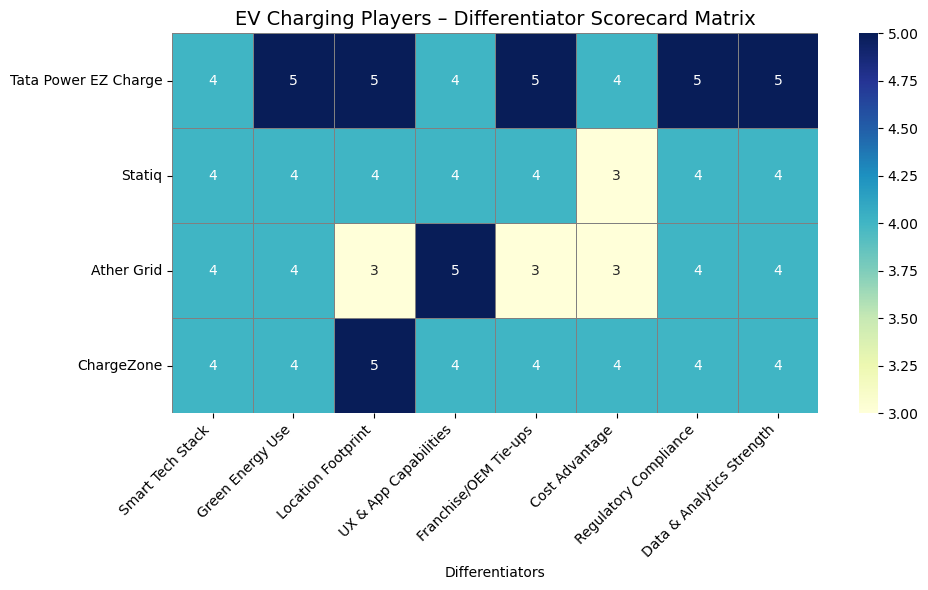

In [17]:
# Plot as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray', fmt='d')
plt.title("EV Charging Players – Differentiator Scorecard Matrix", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
totals = {
    "Tata Power EZ Charge": sum([4, 5, 5, 4, 5, 4, 5, 5]),
    "Statiq": sum([4, 4, 4, 4, 4, 3, 4, 4]),
    "Ather Grid": sum([4, 4, 3, 5, 3, 3, 4, 4]),
    "ChargeZone": sum([4, 4, 5, 4, 4, 4, 4, 4])
}

players = list(totals.keys())
scores = list(totals.values())

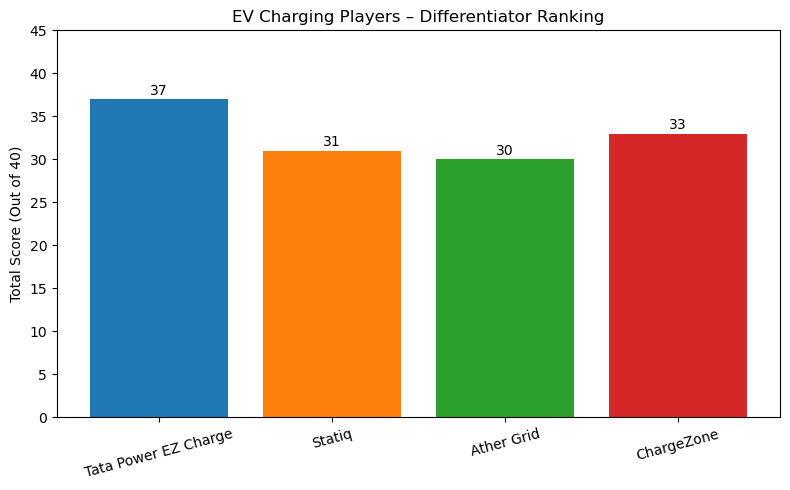

In [20]:
plt.figure(figsize=(8, 5))
bars = plt.bar(players, scores, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
plt.ylabel("Total Score (Out of 40)")
plt.title("EV Charging Players – Differentiator Ranking")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', fontsize=10)

plt.xticks(rotation=15)
plt.ylim(0, 45)
plt.tight_layout()
plt.show()

In [21]:
data = {
    "Segment": [
        "AC Slow – Urban Home – 2W/3W",
        "DC Fast – Tier 2 City – 4W",
        "DC Fast – Metro – Fleet (Cabs)",
        "Ultra-Fast – Highway Hub – All"
    ],
    "Pricing_per_kWh": [7.5, 14, 16, 20],
    "Membership_Discount": [7.5, 10, 12, 5],
    "Avg_Revenue_per_Session": [40, 550, 1000, 850]
}


df = pd.DataFrame(data)
df.set_index("Segment", inplace=True)


df_norm = df.copy()
for col in df.columns:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

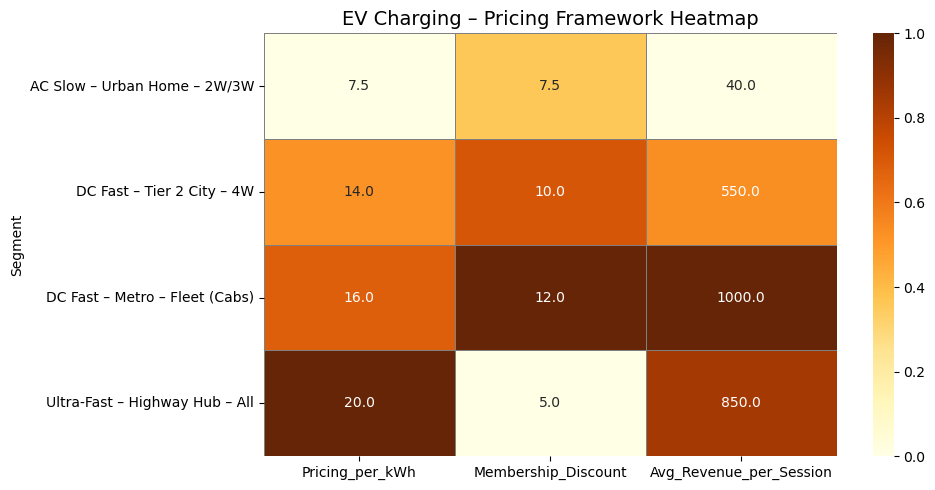

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_norm, annot=df, fmt=".1f", cmap="YlOrBr", linewidths=0.5, linecolor='gray')
plt.title("EV Charging – Pricing Framework Heatmap", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
data = {
    "Segment": [
        "AC Slow – Urban Home – 2W/3W",
        "DC Fast – Tier 2 City – 4W",
        "DC Fast – Metro – Fleet (Cabs)",
        "Ultra-Fast – Highway Hub – All"
    ],
    "Avg_Revenue_per_Session": [40, 550, 1000, 850]
}

df = pd.DataFrame(data)

colors = ["#d9f0a3", "#addd8e", "#78c679", "#41ab5d"]

In [25]:
bubble_data = pd.DataFrame({
    "Charger_Type": ["AC Slow", "DC Fast", "DC Fast", "Ultra-Fast"],
    "Location": ["Urban Home", "Tier 2 City", "Metro", "Highway Hub"],
    "Vehicle_Segment": ["2W/3W", "4W", "Fleet Cabs", "All"],
    "Pricing_per_kWh": [7.5, 14, 16, 20],
    "Avg_Revenue_per_Session": [40, 550, 1000, 850]
})

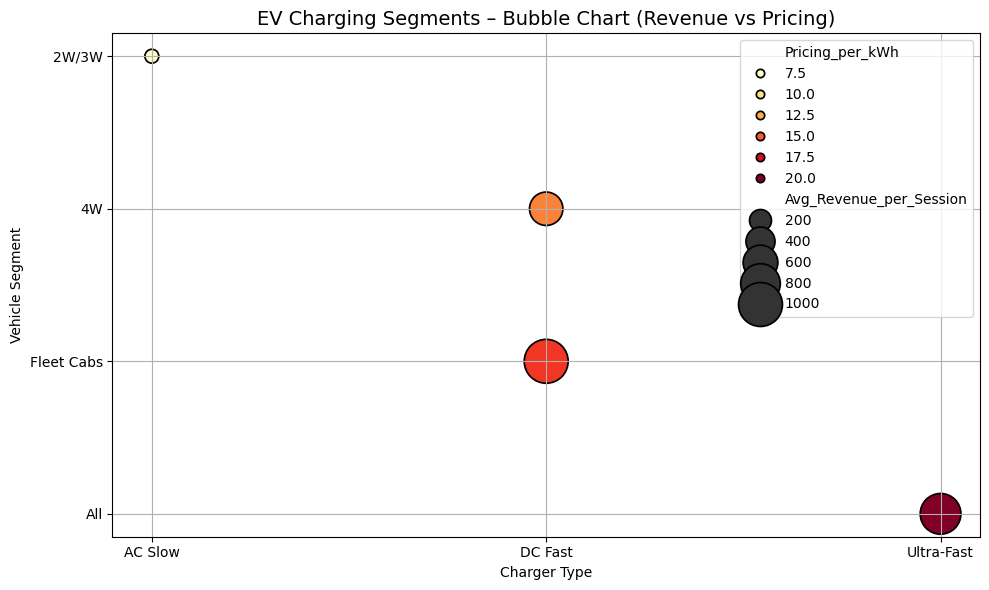

In [26]:
# Plot Bubble Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bubble_data,
    x="Charger_Type",
    y="Vehicle_Segment",
    size="Avg_Revenue_per_Session",
    hue="Pricing_per_kWh",
    palette="YlOrRd",
    sizes=(100, 1000),
    legend='brief',
    edgecolor="black"
)
plt.title("EV Charging Segments – Bubble Chart (Revenue vs Pricing)", fontsize=14)
plt.xlabel("Charger Type")
plt.ylabel("Vehicle Segment")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:



Monetization Models
GTM Channels Matrix

Defensibility Strategy Risk Map

In [27]:
data = {
    'Audience': ['B2C', 'Fleet', 'Govt/Urban', 'OEMs'],
    'Offline_Tactics_Count': [3, 2, 2, 2],
    'Online_Tactics_Count': [2, 2, 2, 1]
}

df = pd.DataFrame(data)

In [52]:
# Data setup
data = {
    "Region": [
        "South India (TN, KA, Kerala)",
        "Delhi-NCR & Maharashtra",
        "National Highways",
        "Metro + Tier 2/3 blend"
    ],
    "Rationale": [
        "High EV adoption, progressive policies",
        "Visibility + strong EV ecosystem",
        "Infrastructure gap = opportunity",
        "Balance affordability + aspiration"
    ],
    "Strategic Score": [90, 85, 80, 88]
}

df = pd.DataFrame(data)

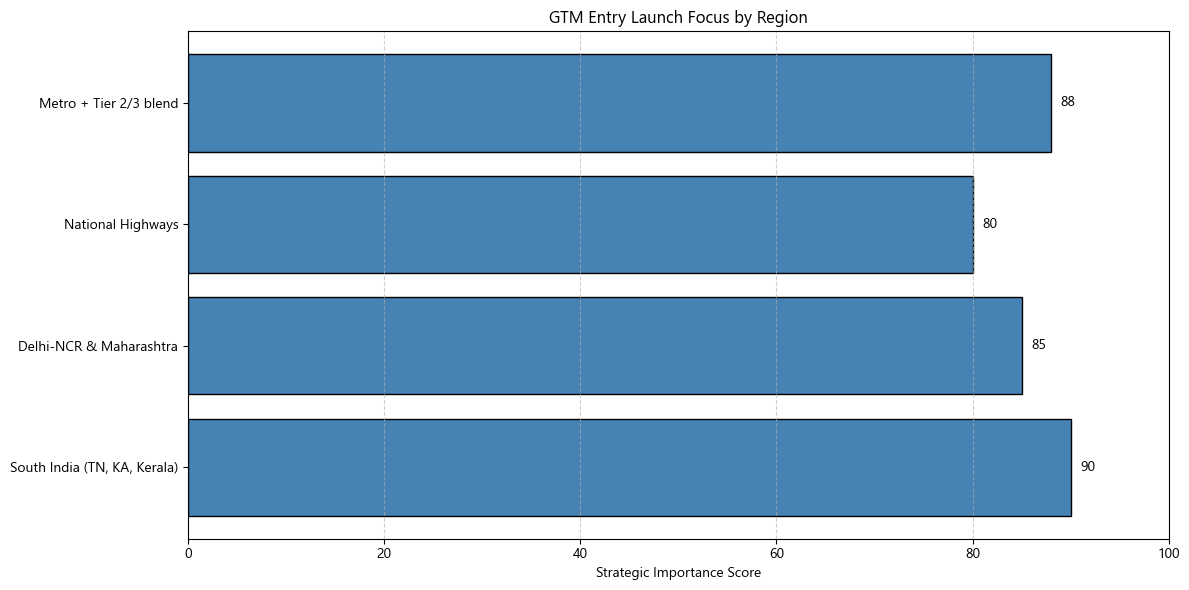

In [53]:
# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(df["Region"], df["Strategic Score"], color="steelblue", edgecolor="black")

# Add annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width}", va='center', fontsize=10, fontweight='bold')

# Titles and styling
plt.xlabel("Strategic Importance Score")
plt.title("GTM Entry Launch Focus by Region")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
import plotly.graph_objects as go

In [31]:
labels = [
    # Level 1: Partner Types
    'DISCOM/Power Cos', 'Real Estate', 'OEMs', 'FMCG/Retail', 'Public Infra',
    
    # Level 2: Use Cases
    'Grid approvals, Load mgmt', 'Society/commercial building installs', 
    'Charging bundle with vehicle', 'Urban/commute coverage points', 
    'NH, Metro, Airport EV planning',
    
    # Level 3: Benefits
    'Grid integration, substation access', 'Access to users and parking locations', 
    'Demand aggregation', 'Drive traffic & ad revenue', 
    'Branding + compliance + visibility'
]

source = [0, 1, 2, 3, 4]  # Partner Types
target = [5, 6, 7, 8, 9]  # Entry Use Cases

source2 = [5, 6, 7, 8, 9]  # Entry Use Cases
target2 = [10, 11, 12, 13, 14]  # Benefits

sources = source + source2
targets = target + target2
values = [1]*len(sources)  # Equal weight for simplicity

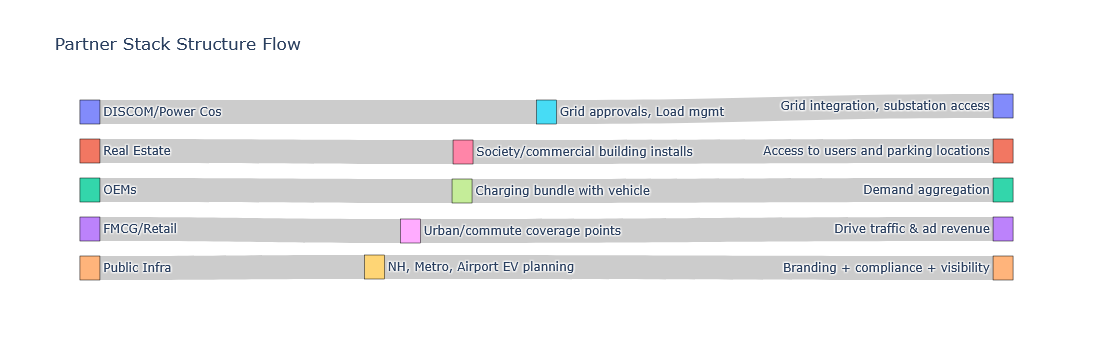

In [32]:
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Partner Stack Structure Flow", font_size=12)
fig.show()

In [33]:
kpis = [
    "Brand Awareness Index",
    "Charger Conversion Rate",
    "Tier 2/3 Brand Penetration",
    "Fleet Partner Acquisition Rate",
    "Organic vs Paid Traffic Split",
    "Loyalty Usage %"
]

scores = [78, 62, 55, 45, 70, 52]

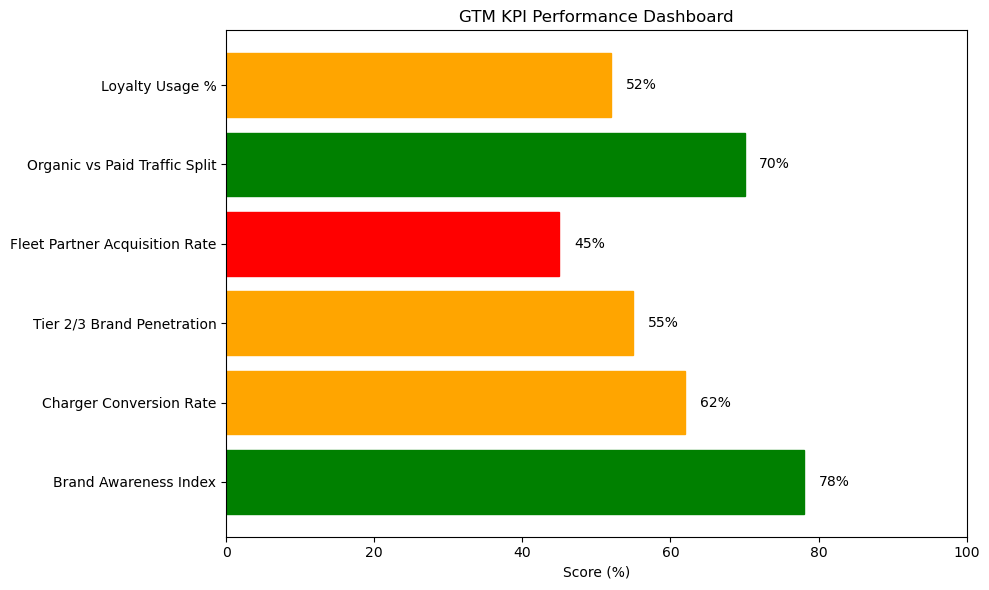

In [34]:
plt.figure(figsize=(10, 6))
bars = plt.barh(kpis, scores)

for bar in bars:
    width = bar.get_width()
    if width >= 70:
        bar.set_color('green')
    elif width >= 50:
        bar.set_color('orange')
    else:
        bar.set_color('red')

plt.xlabel('Score (%)')
plt.title('GTM KPI Performance Dashboard')
plt.xlim(0, 100)

for i, v in enumerate(scores):
    plt.text(v + 2, i, f"{v}%", va='center')

plt.tight_layout()
plt.show()

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Point to a font that supports emojis
rcParams['font.family'] = 'Segoe UI Emoji'

In [38]:
# Brand Pillars Data
pillars = ["Speed", "Coverage", "Green Energy", "Tech Integration", "Trust"]
scores = [85, 80, 90, 75, 88]  # Example strength scores (can be scored by self or peers)
taglines = [
    "⚡ Charge Fast. Go Far.",
    "🗺️ From Highways to Homes.",
    "🌞 Clean Miles, Powered by Sun.",
    "📱 Smart Charging. Seamless Driving.",
    "🛡️ Powered by Reliability."
]

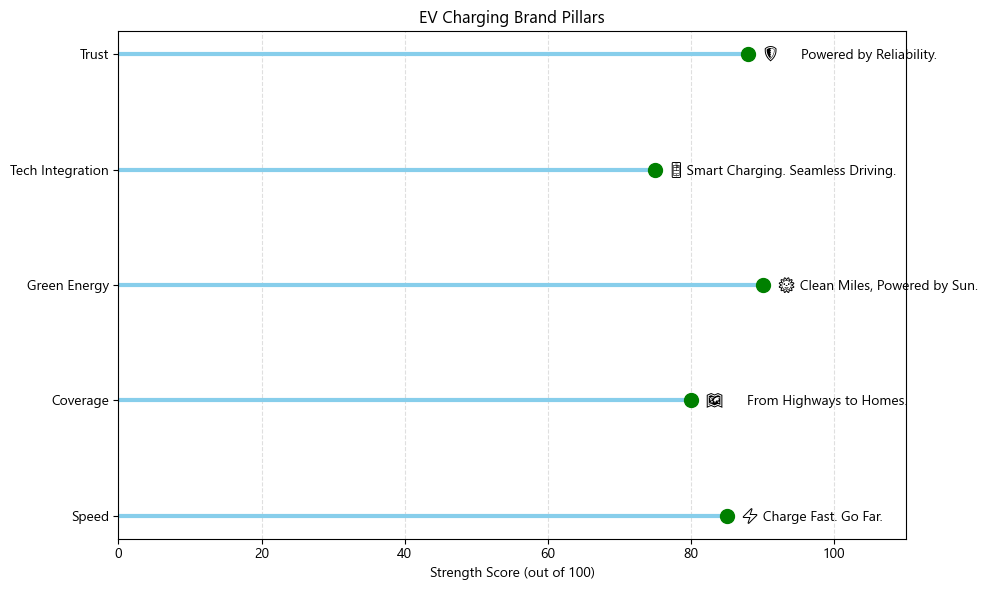

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines(y=pillars, xmin=0, xmax=scores, color='skyblue', linewidth=3)
ax.plot(scores, pillars, "o", markersize=10, color='green')

# Add taglines as text annotations
for i, (score, tagline) in enumerate(zip(scores, taglines)):
    ax.text(score + 2, i, tagline, va='center', fontsize=10)

# Formatting
ax.set_xlabel('Strength Score (out of 100)')
ax.set_title('EV Charging Brand Pillars')
ax.set_xlim(0, 110)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [40]:
# Differentiators and scores
dimensions = [
    "Tech", "Renewable Power", "Coverage",
    "Experience", "Analytics", "Interoperability", "Partnerships"
]
scores = [5, 4, 5, 4, 5, 4, 5]

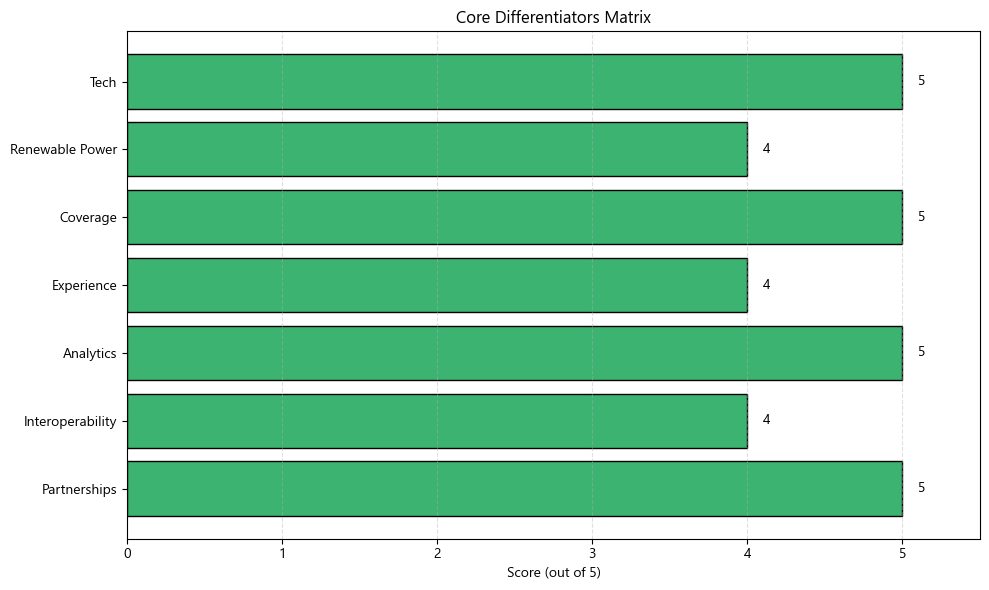

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(dimensions, scores, color='mediumseagreen', edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"{width}", va='center', fontsize=10)

# Style
ax.set_xlim(0, 5.5)
ax.set_xlabel('Score (out of 5)')
ax.set_title('Core Differentiators Matrix')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [44]:
# Categories and scores
labels = [
    'New Entrants',
    'Price Wars',
    'Grid Access',
    'Tech Obsolescence',
    'Revenue Dip',
    'Policy Changes'
]
scores = [5, 4, 4, 4, 5, 5]

# Radar chart setup
num_vars = len(labels)

# Compute angle of each axis in the plot (in radians)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by appending the start to the end
scores += scores[:1]
angles += angles[:1]

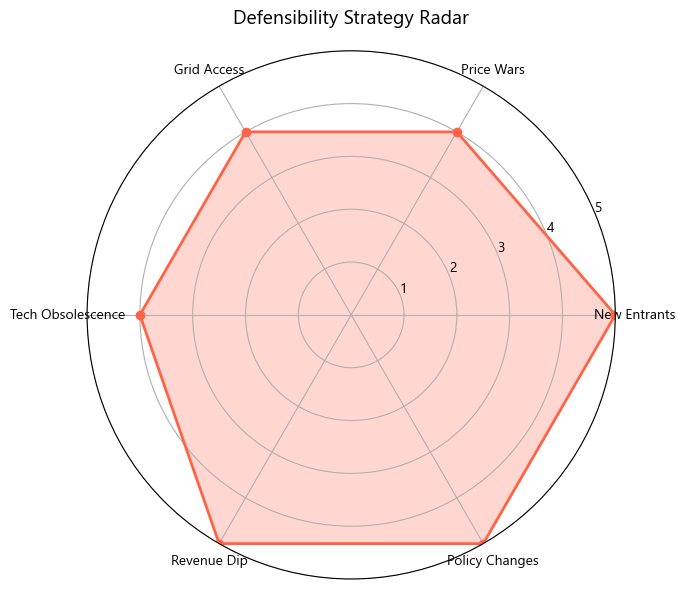

In [45]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, scores, color='tomato', linewidth=2, linestyle='solid', marker='o')
ax.fill(angles, scores, color='tomato', alpha=0.25)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Y-axis labels
ax.set_yticks(range(1, 6))
ax.set_yticklabels(['1', '2', '3', '4', '5'])
ax.set_ylim(0, 5)

# Title
ax.set_title("Defensibility Strategy Radar", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [46]:
data = {
    "Region": ["South India", "Delhi-NCR & MH", "National Highways", "Tier 2/3 Blend"],
    "EV Adoption": [5, 5, 3, 4],
    "Policy Support": [5, 4, 5, 3],
    "Infra Gaps": [3, 4, 5, 5]
}

df = pd.DataFrame(data)
df.set_index("Region", inplace=True)

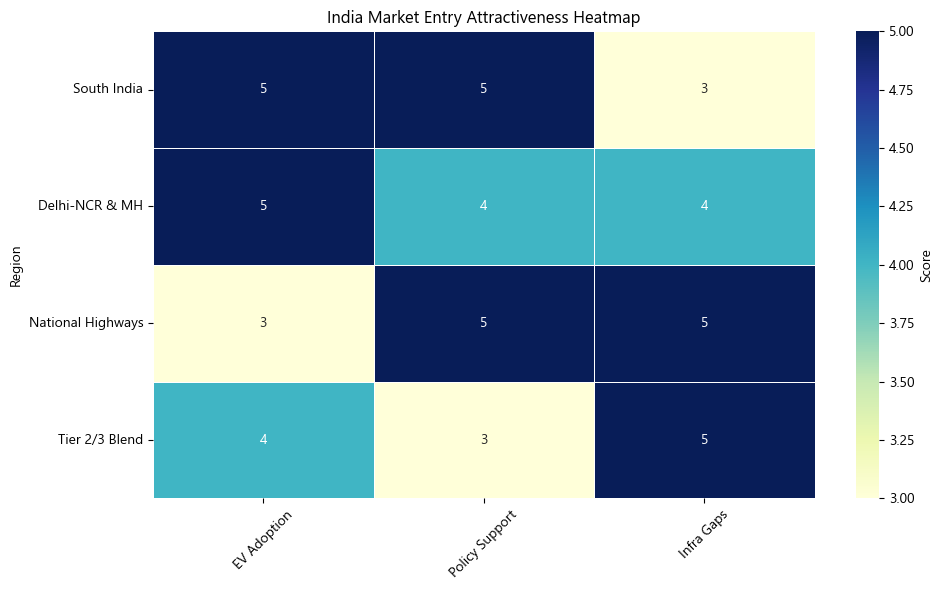

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Score"}, fmt="d")
plt.title("India Market Entry Attractiveness Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [48]:
# Data
data = {
    "Partner Type": ["DISCOM/Power Cos", "Real Estate", "OEMs", "FMCG/Retail", "Public Infra"],
    "Grid Access": [1, 0, 0, 0, 0],
    "Location Access": [0, 1, 0, 1, 1],
    "Demand Aggregation": [0, 1, 1, 0, 0],
    "Branding & Compliance": [1, 0, 0, 1, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index("Partner Type", inplace=True)

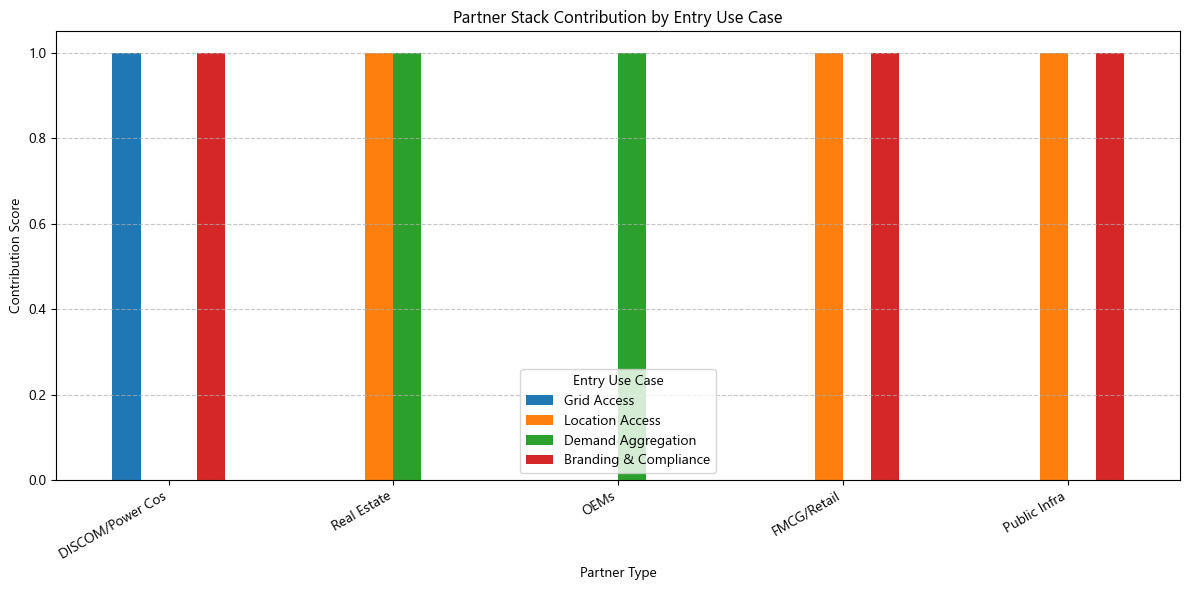

In [49]:
# Plot
df.plot(kind='bar', figsize=(12, 6))
plt.title("Partner Stack Contribution by Entry Use Case")
plt.ylabel("Contribution Score")
plt.xlabel("Partner Type")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Entry Use Case")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
# Brand Pillars Data
pillars = ['Smart', 'Green', 'Everywhere', 'Future-Ready']
descriptions = [
    'AI analytics, app, dynamic pricing',
    'Renewable-powered, low emissions',
    'Tier 1–3 cities, highways, homes',
    'DC fast charging, IoT, subscriptions'
]

colors = ['#2c7be5', '#51cf66', '#ffa94d', '#5f3dc4']

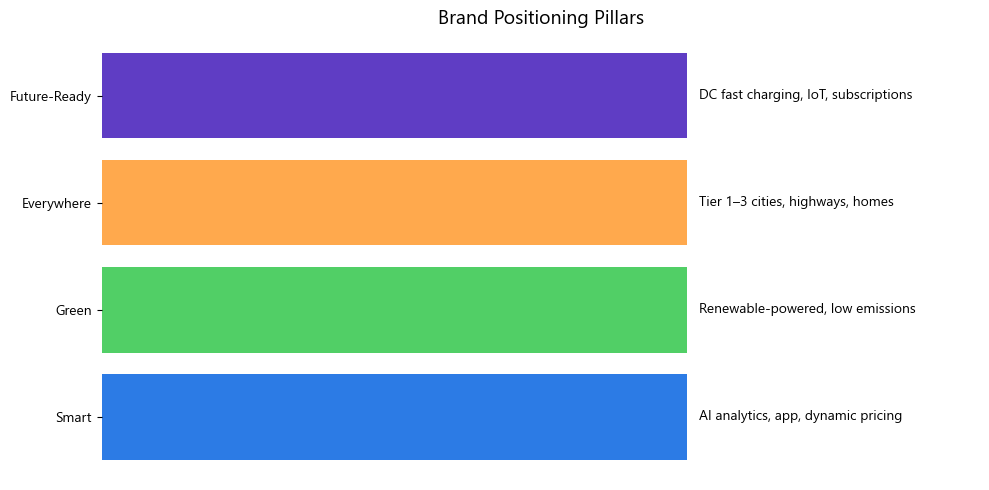

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(pillars, [1]*len(pillars), color=colors)

# Add descriptions
for i, desc in enumerate(descriptions):
    ax.text(1.02, i, desc, va='center', fontsize=10)

# Remove axes ticks/labels
ax.set_xticks([])
ax.set_xlim(0, 1.5)
ax.set_title("Brand Positioning Pillars", fontsize=14, weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

In [56]:
# Pillars and their themes
pillars = ["Speed ⚡", "Coverage 🗺️", "Green Energy 🌿", "Tech 📱", "Trust 🛡️"]
taglines = [
    "Charge Fast. Go Far.",
    "From Highways to Homes.",
    "Clean Miles, Powered by Sun.",
    "Smart Charging. Seamless Driving.",
    "Powered by Reliability."
]

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

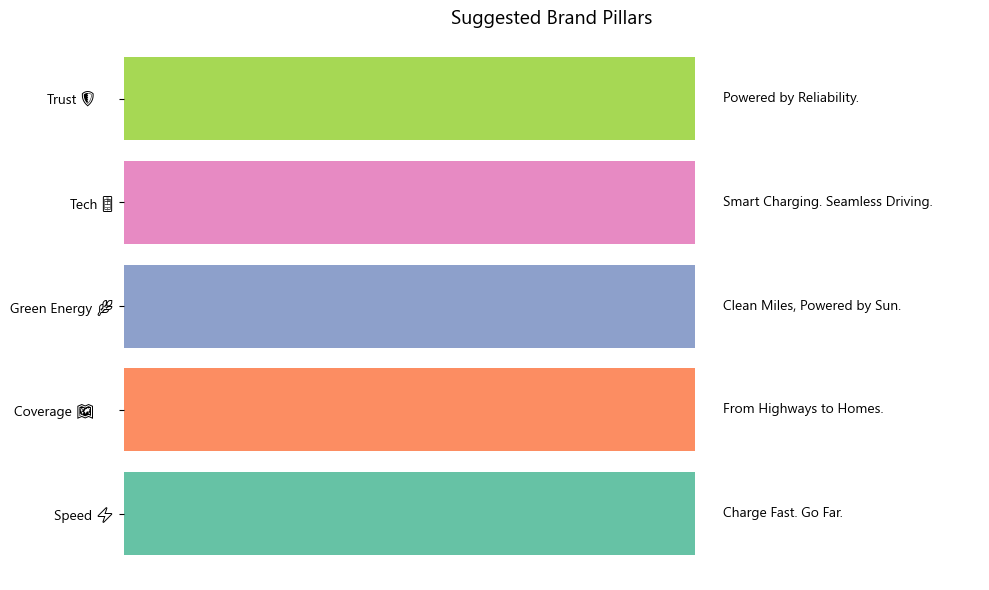

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pillars, [1]*len(pillars), color=colors)

# Add taglines as labels
for i, tagline in enumerate(taglines):
    ax.text(1.05, i, tagline, va='center', fontsize=10)

# Cleanup chart
ax.set_xlim(0, 1.5)
ax.set_xticks([])
ax.set_title("Suggested Brand Pillars", fontsize=14, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

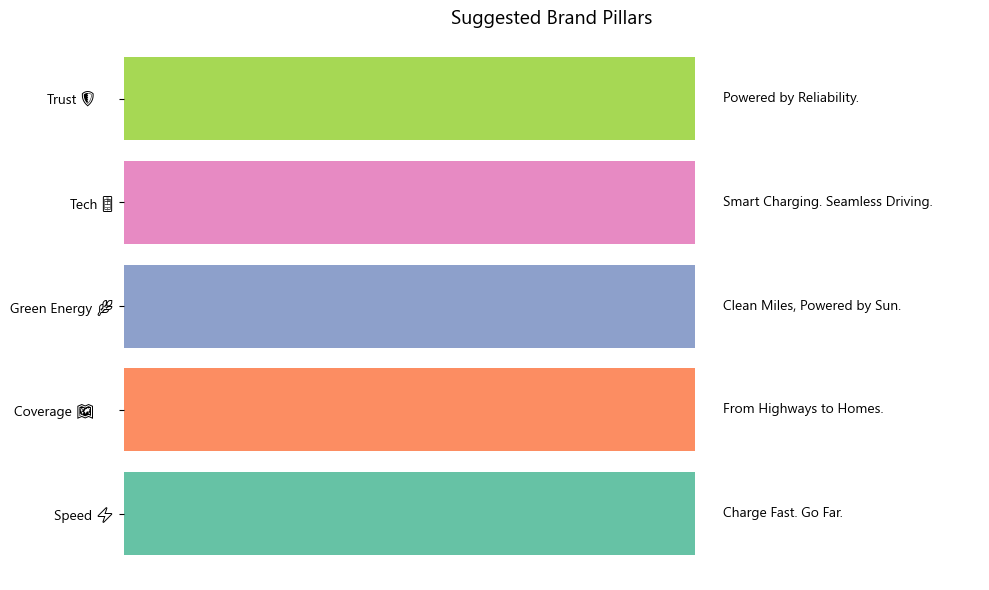

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pillars, [1]*len(pillars), color=colors)

# Add taglines as labels
for i, tagline in enumerate(taglines):
    ax.text(1.05, i, tagline, va='center', fontsize=10)

# Cleanup chart
ax.set_xlim(0, 1.5)
ax.set_xticks([])
ax.set_title("Suggested Brand Pillars", fontsize=14, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

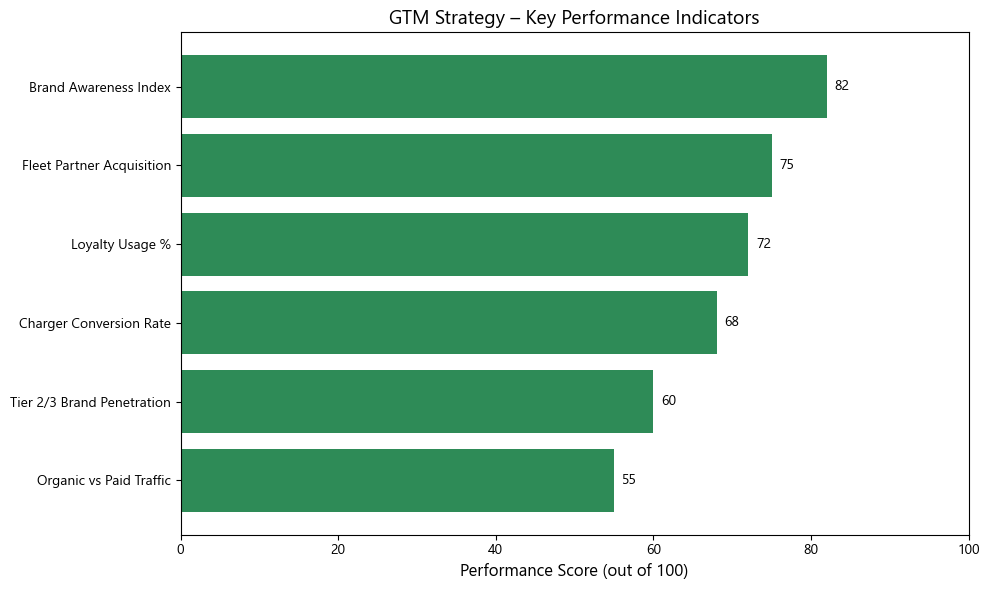

In [59]:
data = {
    'KPI Name': [
        'Brand Awareness Index',
        'Charger Conversion Rate',
        'Tier 2/3 Brand Penetration',
        'Fleet Partner Acquisition',
        'Organic vs Paid Traffic',
        'Loyalty Usage %'
    ],
    'Score': [82, 68, 60, 75, 55, 72]
}

df = pd.DataFrame(data)

# Sort for cleaner plot
df.sort_values(by='Score', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['KPI Name'], df['Score'], color='seagreen')
plt.xlabel("Performance Score (out of 100)", fontsize=12)
plt.title("GTM Strategy – Key Performance Indicators", fontsize=14, weight='bold')

# Annotate each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             va='center', fontsize=10, color='black')

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

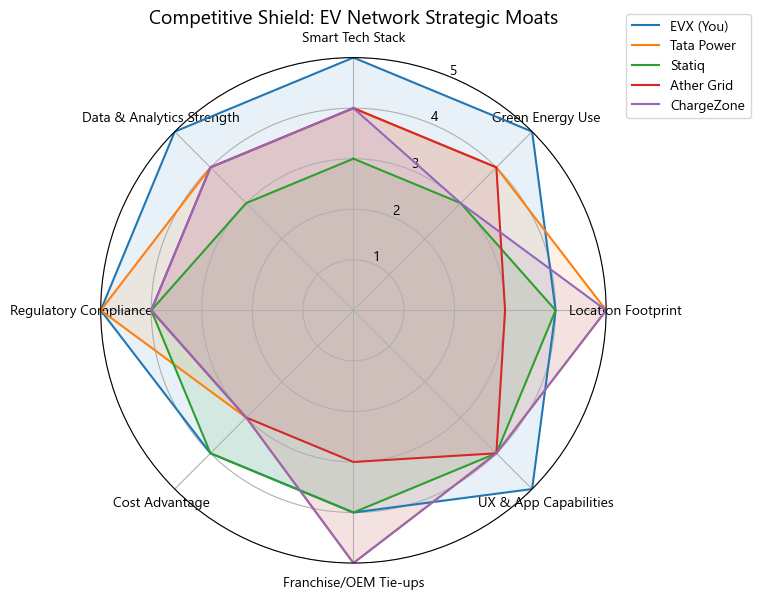

In [60]:
# Radar chart categories
labels = [
    "Smart Tech Stack", "Green Energy Use", "Location Footprint",
    "UX & App Capabilities", "Franchise/OEM Tie-ups", "Cost Advantage",
    "Regulatory Compliance", "Data & Analytics Strength"
]

# Sample values for each player
data = {
    'EVX (You)': [5, 5, 4, 5, 4, 4, 5, 5],
    'Tata Power': [4, 4, 5, 4, 5, 3, 5, 4],
    'Statiq': [3, 3, 4, 4, 4, 4, 4, 3],
    'Ather Grid': [4, 4, 3, 4, 3, 3, 4, 4],
    'ChargeZone': [4, 3, 5, 4, 5, 3, 4, 4]
}

# Prepare angles
categories = labels
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each player
for player, values in data.items():
    stats = values + values[:1]  # repeat the first value to close the loop
    ax.plot(angles, stats, label=player)
    ax.fill(angles, stats, alpha=0.1)

# Format chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
ax.set_ylim(0, 5)
ax.set_title("Competitive Shield: EV Network Strategic Moats", size=14, weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

In [2]:
data = [
    {
        "ChargerType": "AC Slow",
        "Power_kW": 3.3,
        "HardwareCost": 50000,
        "InstallCost": 15000,
        "LandLeaseCost": 15000,
        "AvgRevenuePerSession": 70,
        "SessionsPerMonth": 100,
        "ElectricityPerSession_kWh": 6,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 1000,
        "StaffCost": 20000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 8000,
    },
    {
        "ChargerType": "DC Fast",
        "Power_kW": 60,
        "HardwareCost": 500000,
        "InstallCost": 200000,
        "LandLeaseCost": 40000,
        "AvgRevenuePerSession": 600,
        "SessionsPerMonth": 180,
        "ElectricityPerSession_kWh": 35,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 8000,
        "StaffCost": 50000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 10000,
    },
    {
        "ChargerType": "Ultra-Fast DC",
        "Power_kW": 150,
        "HardwareCost": 2500000,
        "InstallCost": 600000,
        "LandLeaseCost": 100000,
        "AvgRevenuePerSession": 800,
        "SessionsPerMonth": 250,
        "ElectricityPerSession_kWh": 40,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 15000,
        "StaffCost": 75000,
        "CRMSoftwareCost": 5000,
        "MarketingCost": 15000,
    }
]

# Convert to DataFrame
df = pd.DataFrame(data)

In [3]:
# Compute derived metrics
df["CapEx"] = df["HardwareCost"] + df["InstallCost"]
df["ElectricityCost"] = df["SessionsPerMonth"] * df["ElectricityPerSession_kWh"] * df["ElectricityCostPerkWh"]
df["MonthlyRevenue"] = df["AvgRevenuePerSession"] * df["SessionsPerMonth"]
df["MonthlyOPEX"] = (
    df["LandLeaseCost"]
    + df["ElectricityCost"]
    + df["MaintenanceCost"]
    + df["StaffCost"]
    + df["CRMSoftwareCost"]
    + df["MarketingCost"]
)

In [4]:
df.to_csv("EV_Financial_Model_Expanded.csv", index=False)
print("✅ Saved file: EV_Financial_Model_Expanded.csv")

✅ Saved file: EV_Financial_Model_Expanded.csv


In [5]:
from datetime import datetime

In [6]:
import numpy as np

In [7]:
data = [
    {
        "ChargerType": "AC Slow",
        "Power_kW": 3.3,
        "HardwareCost": 50000,
        "InstallCost": 15000,
        "LandLeaseCost": 15000,
        "AvgRevenuePerSession": 70,
        "SessionsPerMonth": 100,
        "ElectricityPerSession_kWh": 6,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 1000,
        "StaffCost": 20000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 8000,
    },
    {
        "ChargerType": "DC Fast",
        "Power_kW": 60,
        "HardwareCost": 500000,
        "InstallCost": 200000,
        "LandLeaseCost": 40000,
        "AvgRevenuePerSession": 600,
        "SessionsPerMonth": 180,
        "ElectricityPerSession_kWh": 35,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 8000,
        "StaffCost": 50000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 10000,
    },
    {
        "ChargerType": "Ultra-Fast DC",
        "Power_kW": 150,
        "HardwareCost": 2500000,
        "InstallCost": 600000,
        "LandLeaseCost": 100000,
        "AvgRevenuePerSession": 800,
        "SessionsPerMonth": 250,
        "ElectricityPerSession_kWh": 40,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 15000,
        "StaffCost": 75000,
        "CRMSoftwareCost": 5000,
        "MarketingCost": 15000,
    }
]

# Build DataFrame
df = pd.DataFrame(data)
df["CapEx"] = df["HardwareCost"] + df["InstallCost"]
df["ElectricityCost"] = df["SessionsPerMonth"] * df["ElectricityPerSession_kWh"] * df["ElectricityCostPerkWh"]
df["MonthlyRevenue"] = df["AvgRevenuePerSession"] * df["SessionsPerMonth"]
df["MonthlyOPEX"] = (
    df["LandLeaseCost"]
    + df["ElectricityCost"]
    + df["MaintenanceCost"]
    + df["StaffCost"]
    + df["CRMSoftwareCost"]
    + df["MarketingCost"]
)

# Add time range (24 months)
start_date = datetime(2025, 9, 1)
months = pd.date_range(start=start_date, periods=24, freq='MS')

# Expand for each month
df_expanded = pd.concat([
    df.assign(Year=month.year, Month=month.month, Date=month)
    for month in months
], ignore_index=True)

# Calculate cumulative fields
df_expanded["CumulativeRevenue"] = df_expanded.groupby("ChargerType")["MonthlyRevenue"].cumsum()
df_expanded["CumulativeOPEX"] = df_expanded.groupby("ChargerType")["MonthlyOPEX"].cumsum()
df_expanded["CumulativeProfit"] = df_expanded["CumulativeRevenue"] - df_expanded["CumulativeOPEX"]

# Export CSV
df_expanded.to_csv("EV_FinancialModel_24Month.csv", index=False)

In [8]:
growth_rate = 0.05  # 5% monthly growth

df_expanded["MonthIndex"] = df_expanded.groupby("ChargerType").cumcount()
df_expanded["AdjustedSessions"] = df_expanded["SessionsPerMonth"] * (1 + growth_rate) ** df_expanded["MonthIndex"]
df_expanded["AdjustedRevenue"] = df_expanded["AdjustedSessions"] * df_expanded["AvgRevenuePerSession"]

# Recalculate Electricity and Revenue
df_expanded["AdjustedElectricityCost"] = df_expanded["AdjustedSessions"] * df_expanded["ElectricityPerSession_kWh"] * df_expanded["ElectricityCostPerkWh"]
df_expanded["AdjustedOPEX"] = (
    df_expanded["LandLeaseCost"]
    + df_expanded["AdjustedElectricityCost"]
    + df_expanded["MaintenanceCost"]
    + df_expanded["StaffCost"]
    + df_expanded["CRMSoftwareCost"]
    + df_expanded["MarketingCost"]
)

df_expanded["AdjustedCumulativeProfit"] = df_expanded.groupby("ChargerType").apply(
    lambda g: (g["AdjustedRevenue"] - g["AdjustedOPEX"]).cumsum()
).reset_index(drop=True)

C:\Users\alaan\AppData\Local\Temp\ipykernel_16064\3745673759.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_expanded["AdjustedCumulativeProfit"] = df_expanded.groupby("ChargerType").apply(


In [1]:
import pandas as pd

# Risk data
risks = [
    {"Category": "Financial Risk", "Risk Type": "CapEx Overruns", "Likelihood": 3, "Impact": 4},
    {"Category": "Financial Risk", "Risk Type": "Low Revenue Realization", "Likelihood": 3, "Impact": 5},
    {"Category": "Financial Risk", "Risk Type": "OPEX Inflation", "Likelihood": 2, "Impact": 4},
    
    {"Category": "Technology Risk", "Risk Type": "Hardware Obsolescence", "Likelihood": 4, "Impact": 5},
    {"Category": "Technology Risk", "Risk Type": "Interoperability Issues", "Likelihood": 3, "Impact": 4},
    {"Category": "Technology Risk", "Risk Type": "Software/CRM Failure", "Likelihood": 2, "Impact": 4},
    
    {"Category": "Market/Demand Risk", "Risk Type": "Low Utilization", "Likelihood": 3, "Impact": 5},
    {"Category": "Market/Demand Risk", "Risk Type": "Slow EV Adoption", "Likelihood": 2, "Impact": 4},
    {"Category": "Market/Demand Risk", "Risk Type": "Customer Churn", "Likelihood": 3, "Impact": 3},

    {"Category": "Regulatory Risk", "Risk Type": "Policy Reversal", "Likelihood": 2, "Impact": 5},
    {"Category": "Regulatory Risk", "Risk Type": "Tariff Instability", "Likelihood": 3, "Impact": 4},
    {"Category": "Regulatory Risk", "Risk Type": "Safety Norms Enforcement", "Likelihood": 3, "Impact": 3},
    
    {"Category": "Operational Risk", "Risk Type": "Charger Downtime", "Likelihood": 4, "Impact": 4},
    {"Category": "Operational Risk", "Risk Type": "Land/Power Access Delays", "Likelihood": 3, "Impact": 4},
    {"Category": "Operational Risk", "Risk Type": "CRM & Service Inadequacy", "Likelihood": 2, "Impact": 3},

    {"Category": "Partnership Risk", "Risk Type": "Fuel Station Contract Delays", "Likelihood": 3, "Impact": 3},
    {"Category": "Partnership Risk", "Risk Type": "DISCOM Grid Integration Failures", "Likelihood": 3, "Impact": 4},
    {"Category": "Partnership Risk", "Risk Type": "OEM Exit or Misalignment", "Likelihood": 2, "Impact": 4}
]

# Add Risk Score
for risk in risks:
    risk["Risk Score"] = risk["Likelihood"] * risk["Impact"]

# Convert to DataFrame
df_risks = pd.DataFrame(risks)

# Save as CSV
df_risks.to_csv("EV_Risk_Matrix.csv", index=False)

print("✅ Risk Matrix exported as EV_Risk_Matrix.csv")

✅ Risk Matrix exported as EV_Risk_Matrix.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

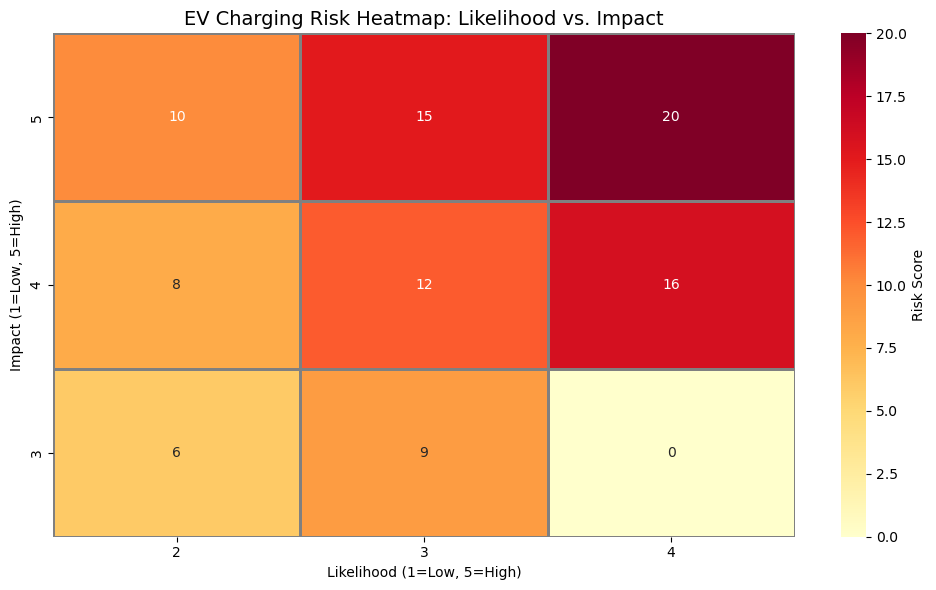

In [3]:
df = pd.read_csv("EV_Risk_Matrix.csv")

heatmap_data = df.pivot_table(
    index='Impact',
    columns='Likelihood',
    values='Risk Score',
    aggfunc='max',
    fill_value=0
)

heatmap_data = heatmap_data.sort_index(ascending=False)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)


cmap = sns.color_palette("YlOrRd", as_cmap=True)


plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap=cmap,
    linewidths=1,
    linecolor='grey',
    cbar_kws={'label': 'Risk Score'}
)

plt.title("EV Charging Risk Heatmap: Likelihood vs. Impact", fontsize=14)
plt.xlabel("Likelihood (1=Low, 5=High)")
plt.ylabel("Impact (1=Low, 5=High)")
plt.tight_layout()
plt.show()

In [4]:
# Filter high risk zones
high_risks = df[df['Risk Score'] >= 16]

# Display high risk rows
print("\n🔴 High Risk Zones (Risk Score ≥ 16):\n")
print(high_risks[['Category', 'Risk Type', 'Likelihood', 'Impact', 'Risk Score']])


🔴 High Risk Zones (Risk Score ≥ 16):

            Category              Risk Type  Likelihood  Impact  Risk Score
3    Technology Risk  Hardware Obsolescence           4       5          20
12  Operational Risk       Charger Downtime           4       4          16


In [5]:
data = [
    {"Category": "Policy", "Risk Type": "Tariff Uncertainty", "Likelihood": 5, "Impact": 4},
    {"Category": "Infra/Tech", "Risk Type": "Grid Downtime in Tier 2/3 Cities", "Likelihood": 4, "Impact": 5},
    {"Category": "Ops", "Risk Type": "Charger Uptime below SLA (<95%)", "Likelihood": 4, "Impact": 4},
    {"Category": "Market", "Risk Type": "Slow EV Adoption in Rural Areas", "Likelihood": 3, "Impact": 4},
    {"Category": "Finance", "Risk Type": "High Land Lease Costs", "Likelihood": 4, "Impact": 3}
]

# Convert to DataFrame and calculate Risk Score
df = pd.DataFrame(data)
df["Risk Score"] = df["Likelihood"] * df["Impact"]

In [6]:
high_risk_df = df[df["Risk Score"] >= 16].copy()

def map_controls(risk_type):
    controls = {
        "Tariff Uncertainty": (
            "Engage with regulators early; forecast ToD tariff bands",
            "Dynamic pricing engine to adjust rates",
            "Policy & Legal Team",
            "Policy tracker; alerts"
        ),
        "Grid Downtime in Tier 2/3 Cities": (
            "On-site solar + battery backup; DISCOM tie-up",
            "Portable gensets or reroute to alternate sites",
            "Ops Head",
            "Uptime dashboard"
        ),
        "Charger Uptime below SLA (<95%)": (
            "Preventive maintenance + IoT sensors",
            "SLA-penalty credit + emergency field service",
            "Tech + Ops Team",
            "Charger uptime logs"
        )
    }
    return controls.get(risk_type, ("TBD", "TBD", "TBD", "TBD"))


high_risk_df[["Preventive Controls", "Corrective Controls", "Owner", "Monitoring Mechanism"]] = high_risk_df["Risk Type"].apply(lambda x: pd.Series(map_controls(x)))


final_columns = [
    "Category", "Risk Type", "Likelihood", "Impact", "Risk Score",
    "Preventive Controls", "Corrective Controls", "Owner", "Monitoring Mechanism"
]


output_path = "High_Risk_Mitigation_Table.csv"
high_risk_df[final_columns].to_csv(output_path, index=False)

print(f"✅ Risk Mitigation Table exported to: {output_path}")

✅ Risk Mitigation Table exported to: High_Risk_Mitigation_Table.csv


In [7]:
import pandas as pd

data = [
    {
        "Risk Category": "Market Competition",
        "Risk Type": "New Entrants with lower pricing",
        "Defense Strategy": "Build early-mover scale + brand loyalty in Tier 2/3 cities",
        "Notes": "Customer lock-in via loyalty programs & pricing transparency"
    },
    {
        "Risk Category": "Pricing Pressure",
        "Risk Type": "Price Wars",
        "Defense Strategy": "Differentiate via uptime, speed, green energy integration",
        "Notes": "Emphasize value and performance instead of lowest price"
    },
    {
        "Risk Category": "Regulatory",
        "Risk Type": "Unfavorable tariff/policy changes",
        "Defense Strategy": "Stay aligned with public incentives + fast compliance updates",
        "Notes": "Align with FAME, BIS, CEA early"
    },
    {
        "Risk Category": "Infrastructure Access",
        "Risk Type": "Grid limitations",
        "Defense Strategy": "DISCOM tie-ups + solar-powered backup",
        "Notes": "Reduces dependency on external grid infrastructure"
    },
    {
        "Risk Category": "Technology",
        "Risk Type": "Charging standard obsolescence",
        "Defense Strategy": "Modular chargers + OTA firmware updates",
        "Notes": "Future-proof system investments"
    },
    {
        "Risk Category": "Funding",
        "Risk Type": "CapEx scale delay",
        "Defense Strategy": "Franchise and PPP rollout",
        "Notes": "Shared CapEx and faster scaling"
    },
    {
        "Risk Category": "Reliability",
        "Risk Type": "High charger downtime",
        "Defense Strategy": "AI-based predictive maintenance + SLAs",
        "Notes": "Improves trust and reliability"
    },
    {
        "Risk Category": "Consumer Experience",
        "Risk Type": "Poor app UX or fragmented access",
        "Defense Strategy": "Unified seamless app + loyalty system",
        "Notes": "Increases stickiness and retention"
    },
    {
        "Risk Category": "Data & Privacy",
        "Risk Type": "User data misuse",
        "Defense Strategy": "Privacy-first architecture + logs",
        "Notes": "Required for fleets and smart city projects"
    },
    {
        "Risk Category": "Revenue",
        "Risk Type": "Seasonal usage drop",
        "Defense Strategy": "Revenue mix: ads + subscription + retail tie-ups",
        "Notes": "Reduces revenue volatility"
    }
]

df = pd.DataFrame(data)
df.to_csv("Risk_Defense_Strategies.csv", index=False)
print("CSV generated: Risk_Defense_Strategies.csv")

CSV generated: Risk_Defense_Strategies.csv


In [9]:
import matplotlib.pyplot as plt
import numpy as np

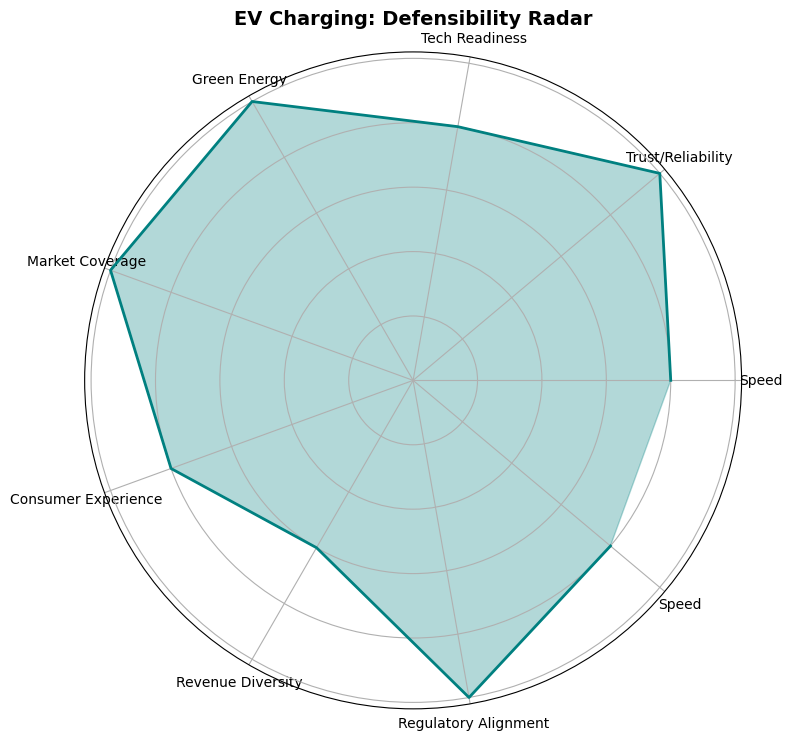

In [13]:
# Define the radar labels and scores
labels = [
    "Speed", "Trust/Reliability", "Tech Readiness", "Green Energy",
    "Market Coverage", "Consumer Experience", "Revenue Diversity", "Regulatory Alignment"
]
scores = [4, 5, 4, 5, 5, 4, 3, 5]

# Close the loop for radar chart
labels += [labels[0]]
scores += [scores[0]]

# Calculate angles
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, scores, linewidth=2, linestyle='solid', color='teal')
ax.fill(angles, scores, color='teal', alpha=0.3)

# Set the labels for each axis
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=10)

# Clean look
ax.set_yticklabels([])
ax.set_title("EV Charging: Defensibility Radar", size=14, pad=20, weight='bold')
ax.grid(True)

plt.tight_layout()
plt.show()

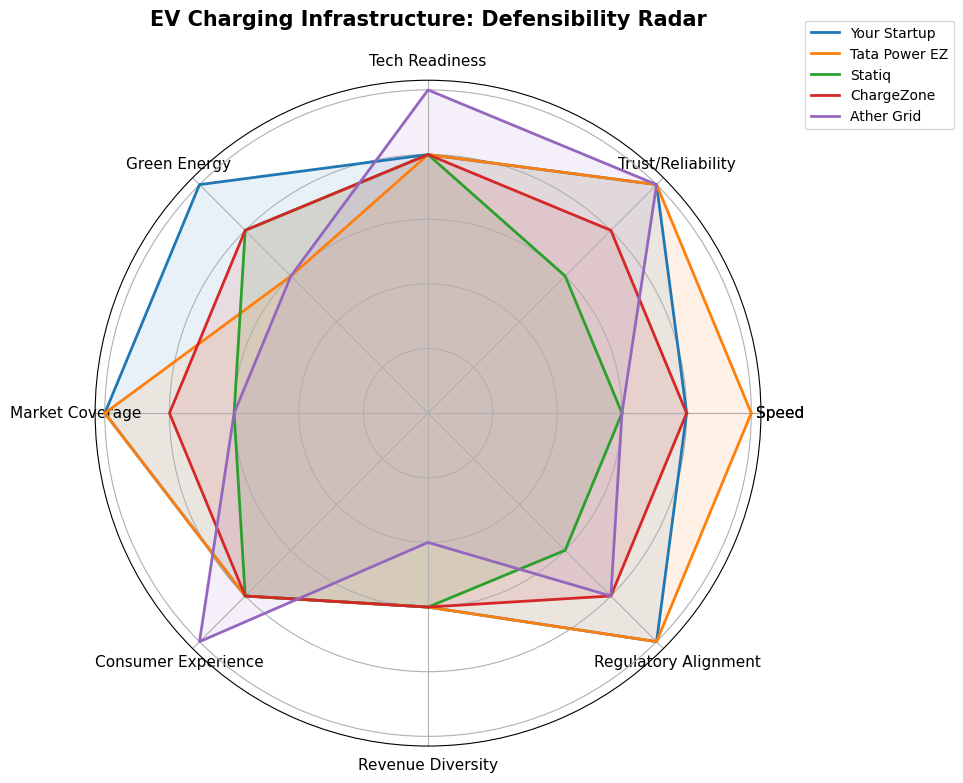

In [14]:
# Categories for defensibility
labels = [
    "Speed", "Trust/Reliability", "Tech Readiness", "Green Energy",
    "Market Coverage", "Consumer Experience", "Revenue Diversity", "Regulatory Alignment"
]
num_vars = len(labels)

# Add closing value for radar loop
labels += [labels[0]]

# Player scores (scale: 1 to 5)
your_startup =        [4, 5, 4, 5, 5, 4, 3, 5]
tata_power =          [5, 5, 4, 3, 5, 4, 3, 5]
statiq =              [3, 3, 4, 4, 3, 4, 3, 3]
chargezone =          [4, 4, 4, 4, 4, 4, 3, 4]
ather_grid =          [3, 5, 5, 3, 3, 5, 2, 4]

# Close the radar loop for each
players = {
    "Your Startup": your_startup + [your_startup[0]],
    "Tata Power EZ": tata_power + [tata_power[0]],
    "Statiq": statiq + [statiq[0]],
    "ChargeZone": chargezone + [chargezone[0]],
    "Ather Grid": ather_grid + [ather_grid[0]]
}

# Radar angles
angles = np.linspace(0, 2 * np.pi, num_vars + 1, endpoint=True)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each player
colors = ['teal', 'crimson', 'orange', 'royalblue', 'green']
for i, (name, values) in enumerate(players.items()):
    ax.plot(angles, values, label=name, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Set axis and labels
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.set_title("EV Charging Infrastructure: Defensibility Radar", fontsize=15, weight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Data for Defensibility Matrix
data = [
    # Your Startup
    ["Your Startup", "Tech Readiness", 4, "High", "Smart charging + OTA updates"],
    ["Your Startup", "Green Energy", 5, "High", "Solar-powered + battery backup"],
    ["Your Startup", "Revenue Diversity", 3, "Medium", "Subscriptions, ads, retail tie-ups"],
    ["Your Startup", "Market Coverage", 4, "High", "Tier 1–3 + highway corridors"],
    ["Your Startup", "App UX + Loyalty", 4, "Medium", "Booking + rewards + analytics"],

    # Tata Power EZ
    ["Tata Power EZ", "Tech Readiness", 4, "Medium", "Strong hardware + charging network"],
    ["Tata Power EZ", "Green Energy", 4, "Medium", "Solar integration in select sites"],
    ["Tata Power EZ", "Revenue Diversity", 3, "Medium", "Fleet contracts + public charging"],
    ["Tata Power EZ", "Market Coverage", 5, "High", "Nationwide presence including highways"],
    ["Tata Power EZ", "App UX + Loyalty", 3, "Medium", "Functional app, limited rewards"],

    # Statiq
    ["Statiq", "Tech Readiness", 3, "Medium", "Growing interoperability support"],
    ["Statiq", "Green Energy", 3, "Low", "Minimal renewable integration so far"],
    ["Statiq", "Revenue Diversity", 3, "Medium", "Partnership-based monetization"],
    ["Statiq", "Market Coverage", 4, "High", "Strong metro + tier 2 expansion"],
    ["Statiq", "App UX + Loyalty", 4, "Medium", "User-friendly UI, booking features"],

    # ChargeZone
    ["ChargeZone", "Tech Readiness", 4, "High", "Fast charger innovation"],
    ["ChargeZone", "Green Energy", 3, "Low", "Renewable integration limited"],
    ["ChargeZone", "Revenue Diversity", 3, "Medium", "Fleet contracts + retail tie-ups"],
    ["ChargeZone", "Market Coverage", 4, "High", "Key urban & highway corridors"],
    ["ChargeZone", "App UX + Loyalty", 3, "Medium", "Functional app, few loyalty features"],

    # Ather Grid
    ["Ather Grid", "Tech Readiness", 5, "High", "OEM integrated + hardware control"],
    ["Ather Grid", "Green Energy", 4, "Medium", "OEM-led green initiatives"],
    ["Ather Grid", "Revenue Diversity", 2, "Low", "Primarily OEM-linked sales"],
    ["Ather Grid", "Market Coverage", 3, "Medium", "OEM-focused geography"],
    ["Ather Grid", "App UX + Loyalty", 4, "Medium", "Seamless for Ather users, limited for others"]
]

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "Player", "Moat_Category", "Score", "Barrier_Level", "Differentiator"
])

# Export to CSV
df.to_csv("DefensibilityMatrix.csv", index=False)

print("✅ DefensibilityMatrix.csv has been created in the current directory.")


✅ DefensibilityMatrix.csv has been created in the current directory.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

INPUT_CSV = "financial_template.csv"   
OUT_SCENARIO_CSV = "scenario_cashflows.csv"
OUT_SENS_CSV = "sensitivity_results.csv"
OUT_TORNADO_CSV = "tornado_data.csv"

HORIZON_YEARS = 10
DISCOUNT_RATE = 0.10   
SCENARIOS = {
    "Base": {"revenue_mult": 1.0, "opex_mult": 1.0, "capex_mult": 1.0},
    "Optimistic": {"revenue_mult": 1.15, "opex_mult": 0.95, "capex_mult": 0.95},
    "Pessimistic": {"revenue_mult": 0.80, "opex_mult": 1.10, "capex_mult": 1.10}
}


SENS_LEVERS = {
    "Sessions_per_Month": 0.20,          
    "Revenue_per_Session": 0.15,       
    "Electricity_Cost_per_kWh": 0.25,   
    "LandLeaseCost": 0.25,               
    "MaintenanceCost": 0.25,            
    "CapEx": 0.20                     
}

In [2]:
def safe_div(a, b):
    try:
        return a / b
    except Exception:
        return np.nan

def compute_npv(initial_outflow, annual_cashflows, discount_rate):
    """annual_cashflows: list or array for years 1..N"""
    npv = -initial_outflow
    for i, cf in enumerate(annual_cashflows, start=1):
        npv += cf / ((1 + discount_rate) ** i)
    return npv

def build_cashflow_row(row, revenue_mult=1.0, opex_mult=1.0, capex_mult=1.0):
    """
    Given a row (Series) and multipliers, compute:
    - AnnualRevenue, AnnualOpex, AnnualProfit
    - CapEx (adjusted)
    - Payback years
    - NPV over horizon
    - Cumulative profits year by year
    Returns dict with values and list of cashflows.
    """
   
    CapEx = row.get("CapEx", 0.0) * capex_mult

 
    if pd.notna(row.get("MonthlyRevenue")):
        monthly_revenue_base = row["MonthlyRevenue"]
    else:
       
        monthly_revenue_base = row.get("SessionsPerMonth", 0.0) * row.get("AvgRevenuePerSession", 0.0)

    if pd.notna(row.get("MonthlyOPEX")):
        monthly_opex_base = row["MonthlyOPEX"]
    else:
      
        electricity = row.get("SessionsPerMonth", 0.0) * row.get("ElectricityPerSession_kWh", 0.0) * row.get("ElectricityCostPerkWh", 0.0)
        monthly_opex_base = electricity + row.get("LandLeaseCost", 0.0) + row.get("MaintenanceCost", 0.0) + row.get("StaffCost", 0.0) + row.get("CRMSoftwareCost", 0.0) + row.get("MarketingCost", 0.0)

 
    monthly_revenue = monthly_revenue_base * revenue_mult
    monthly_opex = monthly_opex_base * opex_mult

    annual_revenue = monthly_revenue * 12
    annual_opex = monthly_opex * 12
    annual_profit = annual_revenue - annual_opex

    payback_years = safe_div(CapEx, annual_profit) if annual_profit > 0 else np.nan

    
    annual_cashflows = [annual_profit for _ in range(HORIZON_YEARS)]

    npv = compute_npv(CapEx, annual_cashflows, DISCOUNT_RATE)

    
    cumulative_profits = np.cumsum(annual_cashflows).tolist()

    result = {
        "ChargerType": row.get("ChargerType", "Unknown"),
        "CapEx": CapEx,
        "MonthlyRevenue": monthly_revenue,
        "MonthlyOPEX": monthly_opex,
        "AnnualRevenue": annual_revenue,
        "AnnualOPEX": annual_opex,
        "AnnualProfit": annual_profit,
        "PaybackYears": payback_years,
        "NPV": npv,
        "CumulativeProfits_Yr1_to_Yr{}".format(HORIZON_YEARS): cumulative_profits[-1],
        "Cashflows": annual_cashflows,
        "CumulativeSeries": cumulative_profits
    }
    return result

In [3]:
if os.path.exists(INPUT_CSV):
    base_df = pd.read_csv(INPUT_CSV)
    print(f"Loaded {INPUT_CSV} with shape {base_df.shape}")
else:
    # Sample fallback (will run if user didn't provide file)
    print(f"WARNING: {INPUT_CSV} not found — using sample data. Save your file as {INPUT_CSV} for real inputs.")
    sample = [
        {
            "ChargerType": "AC Slow",
            "CapEx": 50000 + 15000,
            "MonthlyRevenue": 70 * 100,
            "MonthlyOPEX": 15000 + (100 * 6 * 8),  # landlease + electricity example
            "SessionsPerMonth": 100,
            "AvgRevenuePerSession": 70,
            "ElectricityPerSession_kWh": 6,
            "ElectricityCostPerkWh": 8,
            "LandLeaseCost": 15000,
            "MaintenanceCost": 1000,
            "StaffCost": 20000,
            "CRMSoftwareCost": 3000,
            "MarketingCost": 8000
        },
        {
            "ChargerType": "DC Fast",
            "CapEx": 500000 + 200000,
            "MonthlyRevenue": 600 * 180,
            "MonthlyOPEX": 40000 + (180 * 35 * 8),
            "SessionsPerMonth": 180,
            "AvgRevenuePerSession": 600,
            "ElectricityPerSession_kWh": 35,
            "ElectricityCostPerkWh": 8,
            "LandLeaseCost": 40000,
            "MaintenanceCost": 8000,
            "StaffCost": 50000,
            "CRMSoftwareCost": 3000,
            "MarketingCost": 10000
        },
        {
            "ChargerType": "Ultra-Fast DC",
            "CapEx": 2500000 + 600000,
            "MonthlyRevenue": 800 * 250,
            "MonthlyOPEX": 100000 + (250 * 40 * 8),
            "SessionsPerMonth": 250,
            "AvgRevenuePerSession": 800,
            "ElectricityPerSession_kWh": 40,
            "ElectricityCostPerkWh": 8,
            "LandLeaseCost": 100000,
            "MaintenanceCost": 15000,
            "StaffCost": 75000,
            "CRMSoftwareCost": 5000,
            "MarketingCost": 15000
        }
    ]
    base_df = pd.DataFrame(sample)

In [4]:
numeric_cols = ["CapEx", "MonthlyRevenue", "MonthlyOPEX", "SessionsPerMonth",
                "AvgRevenuePerSession", "ElectricityPerSession_kWh", "ElectricityCostPerkWh",
                "LandLeaseCost", "MaintenanceCost", "StaffCost", "CRMSoftwareCost", "MarketingCost"]
for c in numeric_cols:
    if c not in base_df.columns:
        base_df[c] = 0.0
base_df[numeric_cols] = base_df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0.0)

# -----------------------------
# Build scenario outputs
# -----------------------------
scenario_rows = []
scenario_cashflow_records = []  # detailed per year for Power BI
for _, row in base_df.iterrows():
    for scen_name, mults in SCENARIOS.items():
        r = build_cashflow_row(row, revenue_mult=mults["revenue_mult"], opex_mult=mults["opex_mult"], capex_mult=mults["capex_mult"])
        out = {
            "ChargerType": r["ChargerType"],
            "Scenario": scen_name,
            "CapEx": r["CapEx"],
            "MonthlyRevenue": r["MonthlyRevenue"],
            "MonthlyOPEX": r["MonthlyOPEX"],
            "AnnualRevenue": r["AnnualRevenue"],
            "AnnualOPEX": r["AnnualOPEX"],
            "AnnualProfit": r["AnnualProfit"],
            "PaybackYears": r["PaybackYears"],
            "NPV": r["NPV"],
            "CumulativeProfit_EndYr{}".format(HORIZON_YEARS): r["CumulativeSeries"][-1]
        }
        scenario_rows.append(out)

        # create year-by-year rows for timeline export
        for y in range(0, HORIZON_YEARS + 1):
            if y == 0:
                cash = -r["CapEx"]
            else:
                cash = r["Cashflows"][y - 1]
            scenario_cashflow_records.append({
                "ChargerType": r["ChargerType"],
                "Scenario": scen_name,
                "Year": y,
                "Cashflow": cash,
                "CumulativeCashflow": np.sum([(-r["CapEx"])] + r["Cashflows"][: max(0, y - 0)])  # cumulative including year 0
            })

scenario_df = pd.DataFrame(scenario_rows)
scenario_cashflow_df = pd.DataFrame(scenario_cashflow_records)

In [5]:
# Save scenario outputs
scenario_df.to_csv(OUT_SCENARIO_CSV, index=False)
scenario_cashflow_df.to_csv("scenario_cashflows_timeseries.csv", index=False)
print(f"Scenario CSV saved: {OUT_SCENARIO_CSV} and scenario_cashflows_timeseries.csv")

# -----------------------------
# Tornado (one-way sensitivity) analysis
# -----------------------------
# We'll compute % change in Base NPV when each lever is moved +/- percent defined in SENS_LEVERS
tornado_rows = []
for _, base_row in base_df.iterrows():
    # compute base NPV (base scenario multipliers 1.0)
    base_res = build_cashflow_row(base_row, revenue_mult=1.0, opex_mult=1.0, capex_mult=1.0)
    base_npv = base_res["NPV"]

    for lever, pct in SENS_LEVERS.items():
        # For each lever we will increase and decrease the underlying input and recalc NPV
        # Map lever names to field adjustments
        # Create copies to avoid changing original
        row_up = base_row.copy()
        row_down = base_row.copy()

        if lever == "Sessions_per_Month":
            # Sessions affects revenue and electricity consumption proportionally
            row_up["SessionsPerMonth"] = row_up.get("SessionsPerMonth", 0) * (1 + pct)
            row_down["SessionsPerMonth"] = row_down.get("SessionsPerMonth", 0) * (1 - pct)
            # if MonthlyRevenue is not provided, AvgRevenuePerSession is used; else recompute monthly revenue
            if base_row.get("MonthlyRevenue", 0) > 0:
                row_up["MonthlyRevenue"] = row_up["MonthlyRevenue"] * (1 + pct)
                row_down["MonthlyRevenue"] = row_down["MonthlyRevenue"] * (1 - pct)

        elif lever == "Revenue_per_Session":
            row_up["AvgRevenuePerSession"] = row_up.get("AvgRevenuePerSession", 0) * (1 + pct)
            row_down["AvgRevenuePerSession"] = row_down.get("AvgRevenuePerSession", 0) * (1 - pct)
            if base_row.get("MonthlyRevenue", 0) > 0:
                # approximate
                row_up["MonthlyRevenue"] = row_up["MonthlyRevenue"] * (1 + pct)
                row_down["MonthlyRevenue"] = row_down["MonthlyRevenue"] * (1 - pct)

        elif lever == "Electricity_Cost_per_kWh":
            row_up["ElectricityCostPerkWh"] = row_up.get("ElectricityCostPerkWh", 0) * (1 + pct)
            row_down["ElectricityCostPerkWh"] = row_down.get("ElectricityCostPerkWh", 0) * (1 - pct)
            # if MonthlyOPEX exists, attempt to adjust electricity portion proportionally
            if base_row.get("MonthlyOPEX", 0) > 0 and base_row.get("ElectricityPerSession_kWh", 0) > 0 and base_row.get("SessionsPerMonth", 0) > 0:
                base_elec = base_row["SessionsPerMonth"] * base_row["ElectricityPerSession_kWh"] * base_row["ElectricityCostPerkWh"]
                row_up["MonthlyOPEX"] = max(0, base_row["MonthlyOPEX"] - base_elec + (base_elec * (1 + pct)))
                row_down["MonthlyOPEX"] = max(0, base_row["MonthlyOPEX"] - base_elec + (base_elec * (1 - pct)))

        elif lever == "LandLeaseCost":
            row_up["LandLeaseCost"] = row_up.get("LandLeaseCost", 0) * (1 + pct)
            row_down["LandLeaseCost"] = row_down.get("LandLeaseCost", 0) * (1 - pct)
            if base_row.get("MonthlyOPEX", 0) > 0:
                # adjust OPEX by delta
                row_up["MonthlyOPEX"] = row_up.get("MonthlyOPEX", 0) + (row_up["LandLeaseCost"] - base_row.get("LandLeaseCost", 0))
                row_down["MonthlyOPEX"] = max(0, row_down.get("MonthlyOPEX", 0) - (base_row.get("LandLeaseCost", 0) - row_down["LandLeaseCost"]))

        elif lever == "MaintenanceCost":
            row_up["MaintenanceCost"] = row_up.get("MaintenanceCost", 0) * (1 + pct)
            row_down["MaintenanceCost"] = row_down.get("MaintenanceCost", 0) * (1 - pct)
            if base_row.get("MonthlyOPEX", 0) > 0:
                row_up["MonthlyOPEX"] = row_up.get("MonthlyOPEX", 0) + (row_up["MaintenanceCost"] - base_row.get("MaintenanceCost", 0))
                row_down["MonthlyOPEX"] = max(0, row_down.get("MonthlyOPEX", 0) - (base_row.get("MaintenanceCost", 0) - row_down["MaintenanceCost"]))

        elif lever == "CapEx":
            row_up["CapEx"] = row_up.get("CapEx", 0) * (1 + pct)
            row_down["CapEx"] = row_down.get("CapEx", 0) * (1 - pct)

        # compute npv for up and down cases (keeping revenue_mult and opex_mult at 1 for this one-way analysis)
        res_up = build_cashflow_row(row_up, revenue_mult=1.0, opex_mult=1.0, capex_mult=1.0)
        res_down = build_cashflow_row(row_down, revenue_mult=1.0, opex_mult=1.0, capex_mult=1.0)

        # percent change in NPV relative to base
        pct_change_up = safe_div(res_up["NPV"] - base_npv, abs(base_npv)) * 100 if base_npv != 0 else np.nan
        pct_change_down = safe_div(res_down["NPV"] - base_npv, abs(base_npv)) * 100 if base_npv != 0 else np.nan

        tornado_rows.append({
            "ChargerType": base_row.get("ChargerType", "Unknown"),
            "Lever": lever,
            "Base_NPV": base_npv,
            "NPV_up": res_up["NPV"],
            "NPV_down": res_down["NPV"],
            "PctChangeUp": pct_change_up,
            "PctChangeDown": pct_change_down
        })

tornado_df = pd.DataFrame(tornado_rows)

Scenario CSV saved: scenario_cashflows.csv and scenario_cashflows_timeseries.csv


In [6]:
# Save sensitivity and tornado outputs
tornado_df.to_csv(OUT_TORNADO_CSV, index=False)
print(f"Tornado CSV saved: {OUT_TORNADO_CSV}")

# Also save detailed sensitivity results (combine scenario_df + tornado summary)
sensitivity_export = scenario_df.copy()
sensitivity_export.to_csv(OUT_SENS_CSV, index=False)
print(f"Sensitivity summary CSV saved: {OUT_SENS_CSV}")

Tornado CSV saved: tornado_data.csv
Sensitivity summary CSV saved: sensitivity_results.csv


In [7]:
# Plot Tornado chart (for first chargerType as an example)
# -----------------------------
def plot_tornado_for_charger(charger_type, tornado_df, top_n=10, savefile=None):
    dfc = tornado_df[tornado_df["ChargerType"] == charger_type].copy()
    if dfc.empty:
        print(f"No tornado data for charger type {charger_type}")
        return
    # we'll use absolute % impacts and show both directions
    dfc["ImpactUpAbs"] = dfc["PctChangeUp"].abs()
    dfc["ImpactDownAbs"] = dfc["PctChangeDown"].abs()
    # combine both sides to pick top levers by max impact
    dfc["MaxImpact"] = dfc[["ImpactUpAbs", "ImpactDownAbs"]].max(axis=1)
    dfc = dfc.sort_values("MaxImpact", ascending=True).tail(top_n)

    labels = dfc["Lever"]
    up_vals = dfc["PctChangeUp"]
    down_vals = dfc["PctChangeDown"]

    y_pos = np.arange(len(labels))

    plt.figure(figsize=(10, 6))
    # horizontal bars: negative side (down) to left, up side to right
    plt.barh(y_pos, down_vals, color="#e74c3c", alpha=0.9, label="Down scenario (% change in NPV)")
    plt.barh(y_pos, up_vals, color="#2ecc71", alpha=0.9, label="Up scenario (% change in NPV)")
    plt.yticks(y_pos, labels)
    plt.xlabel("% change in NPV (relative to Base)")
    plt.title(f"Tornado Sensitivity (NPV) - {charger_type}")
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()

    if savefile:
        plt.savefig(savefile, dpi=200)
        print(f"Tornado chart saved to {savefile}")
    plt.show()


Tornado chart saved to tornado_AC_Slow.png


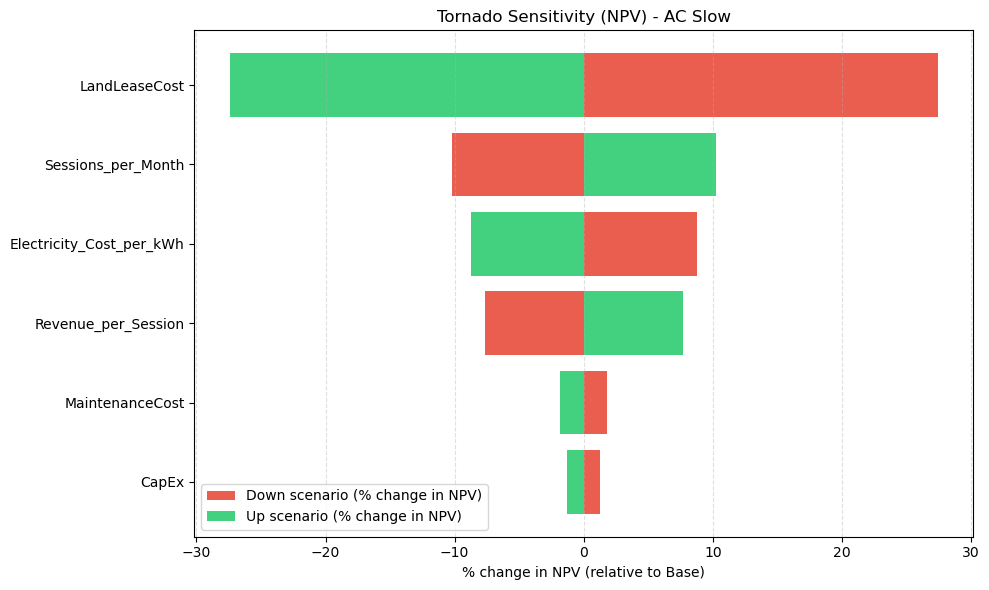

Tornado chart saved to tornado_DC_Fast.png


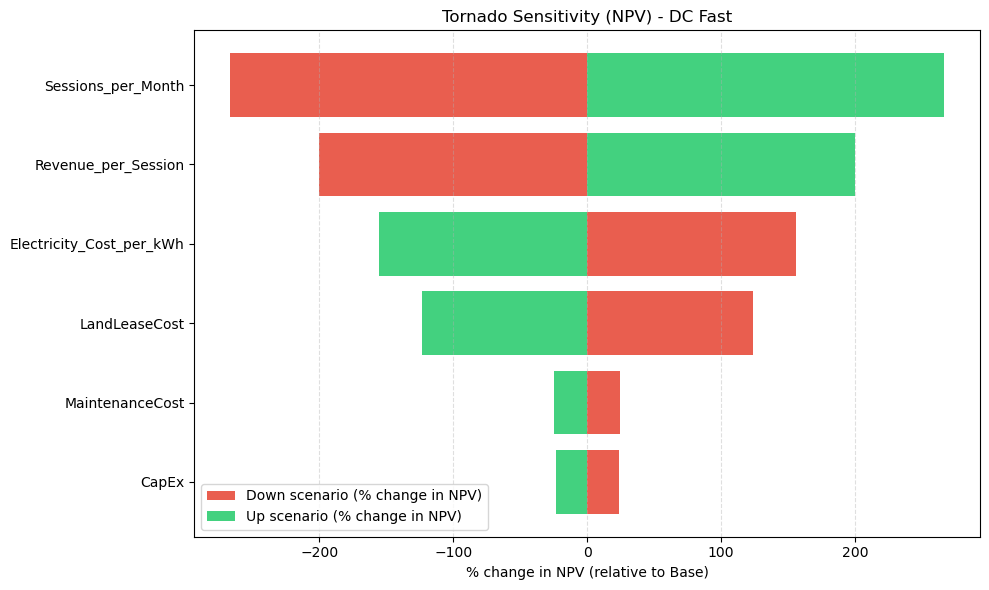

Tornado chart saved to tornado_Ultra-Fast_DC.png


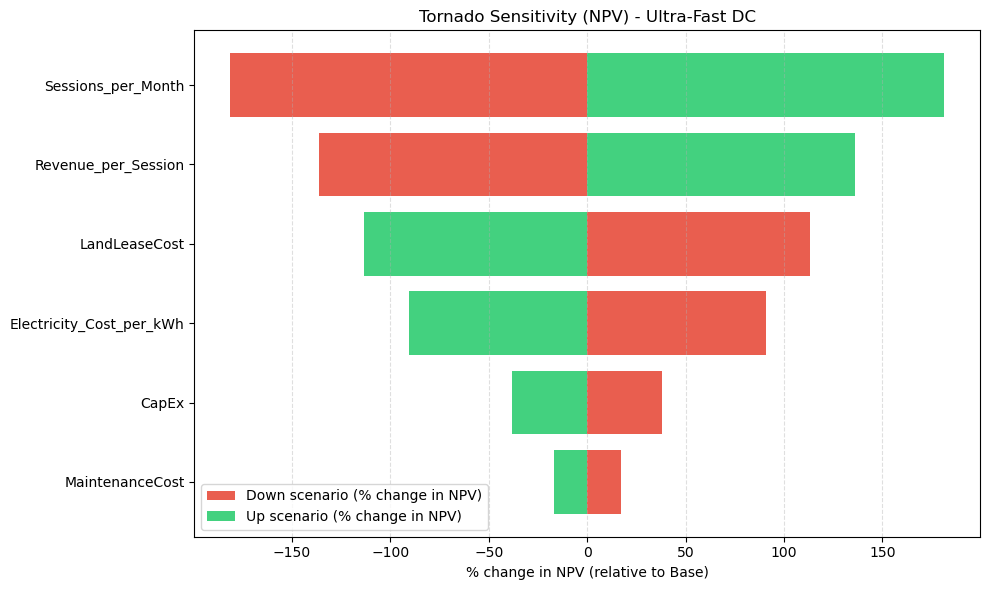

In [8]:
# Plot for each charger type (example)
unique_chargers = tornado_df["ChargerType"].unique()[:3]  # first 3 for demo
for ct in unique_chargers:
    plot_tornado_for_charger(ct, tornado_df, top_n=8, savefile=f"tornado_{ct.replace(' ', '_')}.png")

In [9]:
print("All done. Outputs generated:")
print(" -", OUT_SCENARIO_CSV)
print(" - scenario_cashflows_timeseries.csv")
print(" -", OUT_SENS_CSV)
print(" -", OUT_TORNADO_CSV)

All done. Outputs generated:
 - scenario_cashflows.csv
 - scenario_cashflows_timeseries.csv
 - sensitivity_results.csv
 - tornado_data.csv


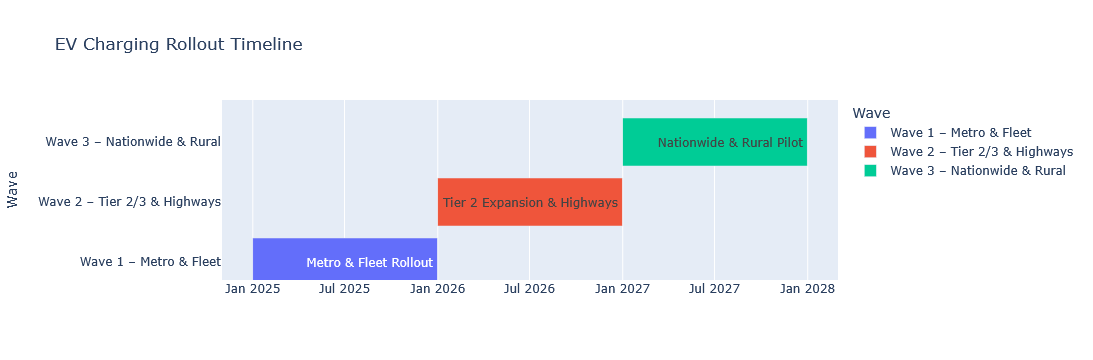

In [11]:
import pandas as pd
import plotly.express as px

# Rollout Data
data = [
    {"Wave": "Wave 1 – Metro & Fleet", "Start": "2025-01-01", "Finish": "2025-12-31", "Milestone": "Metro & Fleet Rollout"},
    {"Wave": "Wave 2 – Tier 2/3 & Highways", "Start": "2026-01-01", "Finish": "2026-12-31", "Milestone": "Tier 2 Expansion & Highways"},
    {"Wave": "Wave 3 – Nationwide & Rural", "Start": "2027-01-01", "Finish": "2027-12-31", "Milestone": "Nationwide & Rural Pilot"},
]

df = pd.DataFrame(data)

# Create Gantt Chart
fig = px.timeline(
    df,
    x_start="Start",
    x_end="Finish",
    y="Wave",
    color="Wave",
    text="Milestone",
    title="EV Charging Rollout Timeline",
)

# Reverse Y-axis so Wave 1 is at the top
fig.update_yaxes(autorange="reversed")

# Save for Power BI import
df.to_csv("Phase_H_Timeline.csv", index=False)

# Show interactive chart
fig.show()


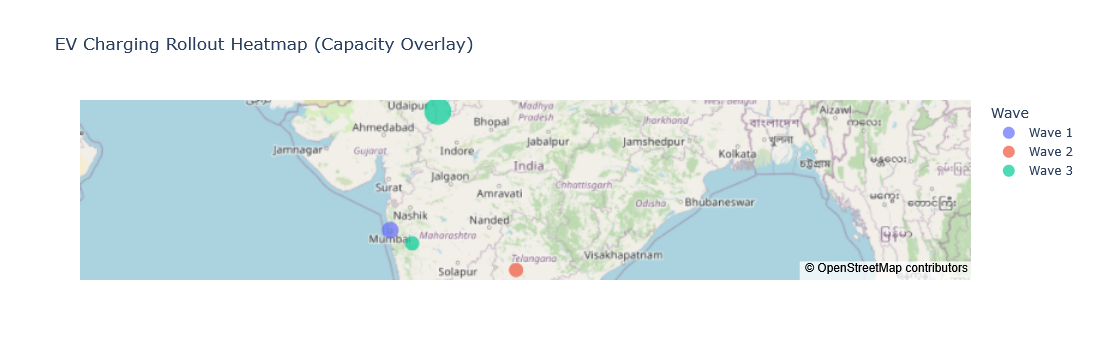

In [12]:
import pandas as pd
import plotly.express as px

# Data
data = [
    {"City": "Delhi NCR", "Wave": "Wave 1", "Chargers": 60, "Capacity_kW": 1800, "Lat": 28.6139, "Lon": 77.2090},
    {"City": "Bengaluru", "Wave": "Wave 1", "Chargers": 50, "Capacity_kW": 1500, "Lat": 12.9716, "Lon": 77.5946},
    {"City": "Mumbai", "Wave": "Wave 1", "Chargers": 40, "Capacity_kW": 1200, "Lat": 19.0760, "Lon": 72.8777},
    {"City": "Chennai", "Wave": "Wave 2", "Chargers": 35, "Capacity_kW": 1050, "Lat": 13.0827, "Lon": 80.2707},
    {"City": "Hyderabad", "Wave": "Wave 2", "Chargers": 30, "Capacity_kW": 900, "Lat": 17.3850, "Lon": 78.4867},
    {"City": "Lucknow–Gorakhpur NH", "Wave": "Wave 2", "Chargers": 20, "Capacity_kW": 1200, "Lat": 26.8467, "Lon": 80.9462},
    {"City": "Pune", "Wave": "Wave 3", "Chargers": 30, "Capacity_kW": 900, "Lat": 18.5204, "Lon": 73.8567},
    {"City": "Rural NE India", "Wave": "Wave 3", "Chargers": 25, "Capacity_kW": 750, "Lat": 26.2006, "Lon": 92.9376},
    {"City": "Delhi–Mumbai NH", "Wave": "Wave 3", "Chargers": 50, "Capacity_kW": 3000, "Lat": 24.0000, "Lon": 75.0000},
]

df = pd.DataFrame(data)

# Heatmap visualization
fig = px.scatter_mapbox(
    df,
    lat="Lat",
    lon="Lon",
    size="Capacity_kW",
    color="Wave",
    hover_name="City",
    hover_data={"Chargers": True, "Capacity_kW": True},
    zoom=4,
    mapbox_style="open-street-map",
    title="EV Charging Rollout Heatmap (Capacity Overlay)"
)

# Save CSV for Power BI
df.to_csv("Phase_H_LocationCapacity.csv", index=False)

fig.show()


In [13]:
import numpy as np

In [15]:
# Rollout wave schedule & financial data (mockup)
months = pd.date_range(start="2025-01-01", periods=24, freq="M")
waves = {
    "Wave 1": {"start_month": 0, "capex": 5000000, "monthly_revenue": 1200000, "monthly_opex": 400000},
    "Wave 2": {"start_month": 6, "capex": 3500000, "monthly_revenue": 800000, "monthly_opex": 300000},
    "Wave 3": {"start_month": 12, "capex": 4500000, "monthly_revenue": 1000000, "monthly_opex": 350000},
}

# Create DataFrame
df = pd.DataFrame({"Month": months})
df["CapEx"] = 0
df["Revenue"] = 0
df["OPEX"] = 0

# Populate financials based on rollout timing
for wave, details in waves.items():
    start = details["start_month"]
    df.loc[start, "CapEx"] += details["capex"]  # Lump-sum Capex
    df.loc[start:, "Revenue"] += details["monthly_revenue"]
    df.loc[start:, "OPEX"] += details["monthly_opex"]

# Save CSV for Power BI
df.to_csv("Phase_H_CapexRevenueOpexTimeline.csv", index=False)

C:\Users\alaan\AppData\Local\Temp\ipykernel_22656\4146273832.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



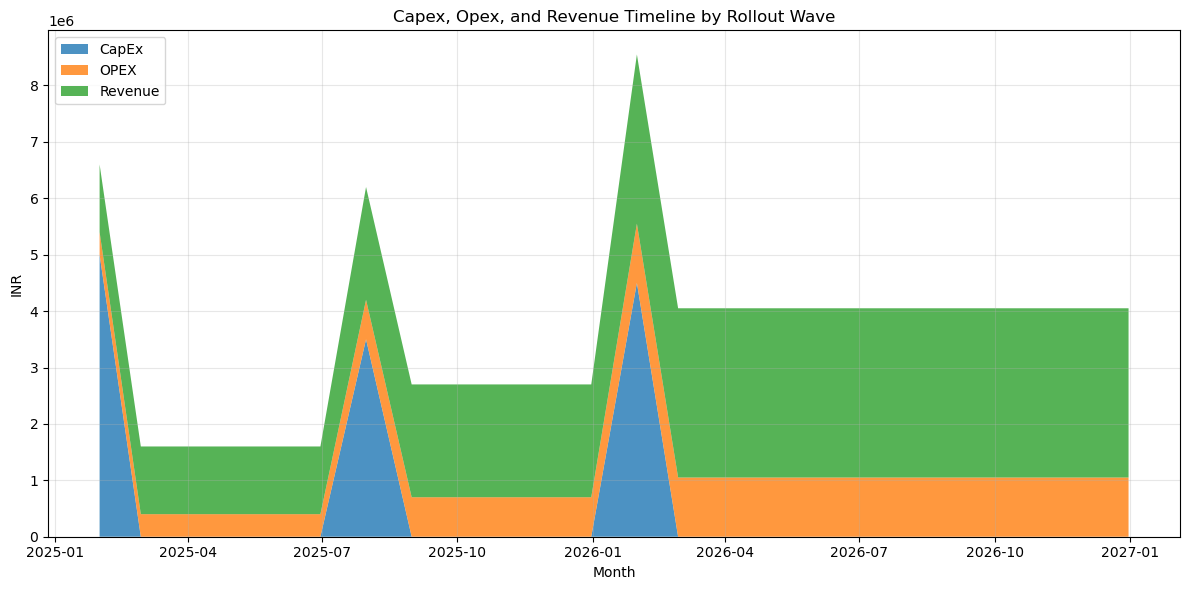

In [16]:
# Plot in Python
plt.figure(figsize=(12, 6))
plt.stackplot(df["Month"], df["CapEx"], df["OPEX"], df["Revenue"], labels=["CapEx", "OPEX", "Revenue"], alpha=0.8)
plt.legend(loc='upper left')
plt.title("Capex, Opex, and Revenue Timeline by Rollout Wave")
plt.ylabel("INR")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
months = pd.date_range(start="2025-01-01", periods=24, freq="M")
charger_types = ["AC Slow", "DC Fast", "Ultra-Fast DC"]

# Base utilization assumptions (sessions per month starting point)
base_start = {
    "AC Slow": 100,
    "DC Fast": 150,
    "Ultra-Fast DC": 200
}

# Growth rates per scenario
growth_rates = {
    "Pessimistic": 0.01,  # 1% monthly growth
    "Base": 0.03,         # 3% monthly growth
    "Optimistic": 0.05    # 5% monthly growth
}

C:\Users\alaan\AppData\Local\Temp\ipykernel_22656\3366739068.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [18]:
# Generate DataFrame
rows = []
for charger in charger_types:
    for scenario, growth in growth_rates.items():
        utilization = [base_start[charger]]
        for m in range(1, len(months)):
            utilization.append(utilization[-1] * (1 + growth))
        for month, value in zip(months, utilization):
            rows.append({
                "Month": month,
                "ChargerType": charger,
                "Scenario": scenario,
                "SessionsPerMonth": round(value, 2)
            })

df = pd.DataFrame(rows)

# Export CSV for Power BI
df.to_csv("Phase_H_ChargerUtilizationForecast.csv", index=False)

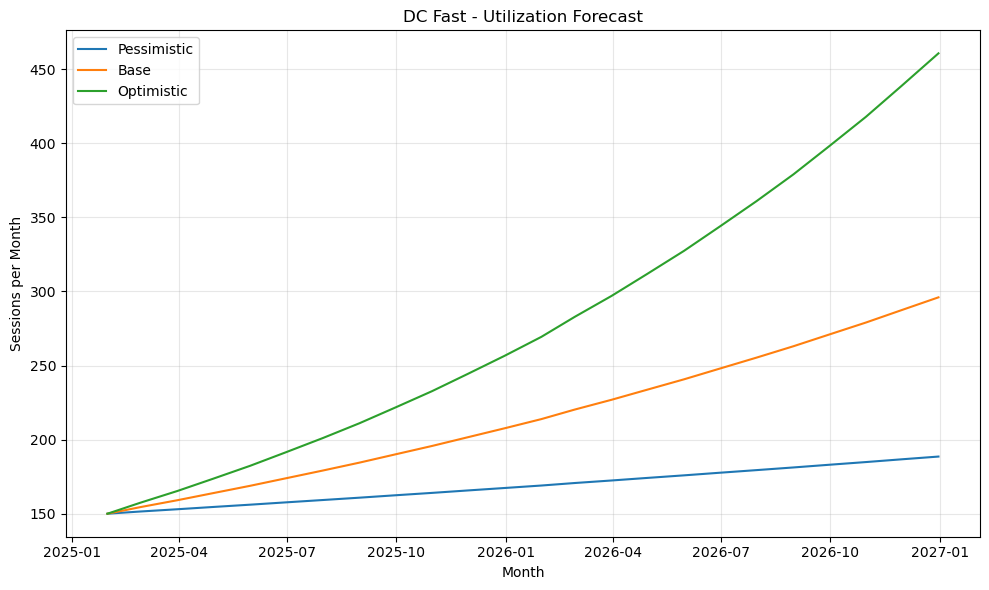

In [19]:
# Python Visual (Scenario Bands for one charger type)
charger_focus = "DC Fast"
plt.figure(figsize=(10, 6))
for scenario in growth_rates.keys():
    data_plot = df[(df["ChargerType"] == charger_focus) & (df["Scenario"] == scenario)]
    plt.plot(data_plot["Month"], data_plot["SessionsPerMonth"], label=scenario)

plt.title(f"{charger_focus} - Utilization Forecast")
plt.xlabel("Month")
plt.ylabel("Sessions per Month")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

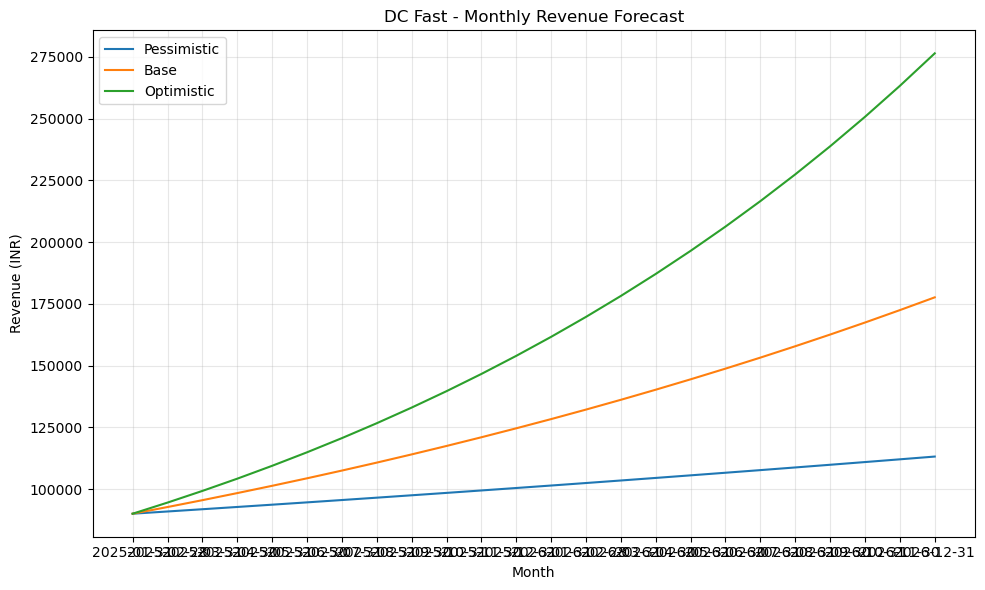

In [20]:
df_util = pd.read_csv("Phase_H_ChargerUtilizationForecast.csv")

# Avg revenue per session (based on previous assumptions)
avg_revenue_per_session = {
    "AC Slow": 70,
    "DC Fast": 600,
    "Ultra-Fast DC": 800
}

# Calculate Revenue
df_util["MonthlyRevenue"] = df_util.apply(
    lambda row: row["SessionsPerMonth"] * avg_revenue_per_session[row["ChargerType"]],
    axis=1
)

# Export for Power BI
df_util.to_csv("Phase_H_RevenueForecast.csv", index=False)

# Python Visual for one charger type
charger_focus = "DC Fast"
plt.figure(figsize=(10, 6))
for scenario in df_util["Scenario"].unique():
    data_plot = df_util[(df_util["ChargerType"] == charger_focus) & (df_util["Scenario"] == scenario)]
    plt.plot(data_plot["Month"], data_plot["MonthlyRevenue"], label=scenario)

plt.title(f"{charger_focus} - Monthly Revenue Forecast")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# File from Step 6
INPUT_CSV = "Phase_H_RevenueForecast.csv"
OUTPUT_CSV = "Phase_H_ProfitabilityForecast.csv"

capex_map = {
    "AC Slow": 50000 + 15000,         # ₹65,000
    "DC Fast": 500000 + 200000,       # ₹700,000
    "Ultra-Fast DC": 2500000 + 600000 # ₹3,100,000
}

monthly_fixed_opex_map = {
    "AC Slow": {
        "LandLease": 15000,
        "Maintenance": 1000,
        "Staff": 20000,
        "CRM": 3000,
        "Marketing": 8000
    },
    "DC Fast": {
        "LandLease": 40000,
        "Maintenance": 8000,
        "Staff": 50000,
        "CRM": 3000,
        "Marketing": 10000
    },
    "Ultra-Fast DC": {
        "LandLease": 100000,
        "Maintenance": 15000,
        "Staff": 75000,
        "CRM": 5000,
        "Marketing": 15000
    }
}


electricity_per_session_map = {
    "AC Slow": 6,
    "DC Fast": 35,
    "Ultra-Fast DC": 40
}
electricity_cost_per_kwh = 8 


df = pd.read_csv(INPUT_CSV, parse_dates=["Month"])


df.columns = df.columns.str.strip()


if df['Month'].dtype == object:
    df['Month'] = pd.to_datetime(df['Month'])


df = df.sort_values(["ChargerType", "Scenario", "Month"]).reset_index(drop=True)
df["MonthIndex"] = df.groupby(["ChargerType", "Scenario"]).cumcount()  # 0-based


df["CapEx"] = df["ChargerType"].map(capex_map)


if "MonthlyRevenue" not in df.columns:
    raise ValueError("MonthlyRevenue column missing in input CSV. Run Step 6 first.")


if "SessionsPerMonth" not in df.columns:
    raise ValueError("SessionsPerMonth column missing in input CSV. Step 5 output required.")

df["ElectricityPerSession_kWh"] = df["ChargerType"].map(electricity_per_session_map)
df["ElectricityCost"] = df["SessionsPerMonth"] * df["ElectricityPerSession_kWh"] * electricity_cost_per_kwh


def map_monthly_opex(row):
    ctype = row["ChargerType"]
    fixed = monthly_fixed_opex_map.get(ctype, {})

    fixed_sum = sum(fixed.values())
    
    land = row.get("LandLeaseCost", fixed.get("LandLease", 0))
    maintenance = row.get("MaintenanceCost", fixed.get("Maintenance", 0))
    staff = row.get("StaffCost", fixed.get("Staff", 0))
    crm = row.get("CRMSoftwareCost", fixed.get("CRM", 0))
    marketing = row.get("MarketingCost", fixed.get("Marketing", 0))
    
    electricity = row.get("ElectricityCost", 0)
   
    return land + maintenance + staff + crm + marketing + electricity


df["MonthlyOPEX"] = df.apply(map_monthly_opex, axis=1)


df["MonthlyProfit"] = df["MonthlyRevenue"] - df["MonthlyOPEX"]


df["CumulativeProfit"] = df.groupby(["ChargerType", "Scenario"])["MonthlyProfit"].cumsum()


def compute_payback(group):
    capex = group["CapEx"].iloc[0]
    # find first index where cumulative >= capex
    mask = group["CumulativeProfit"] >= capex
    if mask.any():
        first_idx = group.loc[mask, "MonthIndex"].iloc[0]
        payback_month = int(first_idx + 1)  # +1 because MonthIndex 0 means 1 month elapsed
        payback_years = round(payback_month / 12.0, 2)
        payback_date = group.loc[mask, "Month"].iloc[0]
    else:
        payback_month = np.nan
        payback_years = np.nan
        payback_date = pd.NaT
    # attach to entire group
    group = group.assign(PaybackMonths=payback_month, PaybackYears=payback_years, PaybackDate=payback_date)
    return group

df = df.groupby(["ChargerType", "Scenario"], group_keys=False).apply(compute_payback)


df["CapExLine"] = df["CapEx"]


df.to_csv(OUTPUT_CSV, index=False)
print(f"Exported: {OUTPUT_CSV}")

Exported: Phase_H_ProfitabilityForecast.csv


C:\Users\alaan\AppData\Local\Temp\ipykernel_12364\3500730184.py:120: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["ChargerType", "Scenario"], group_keys=False).apply(compute_payback)


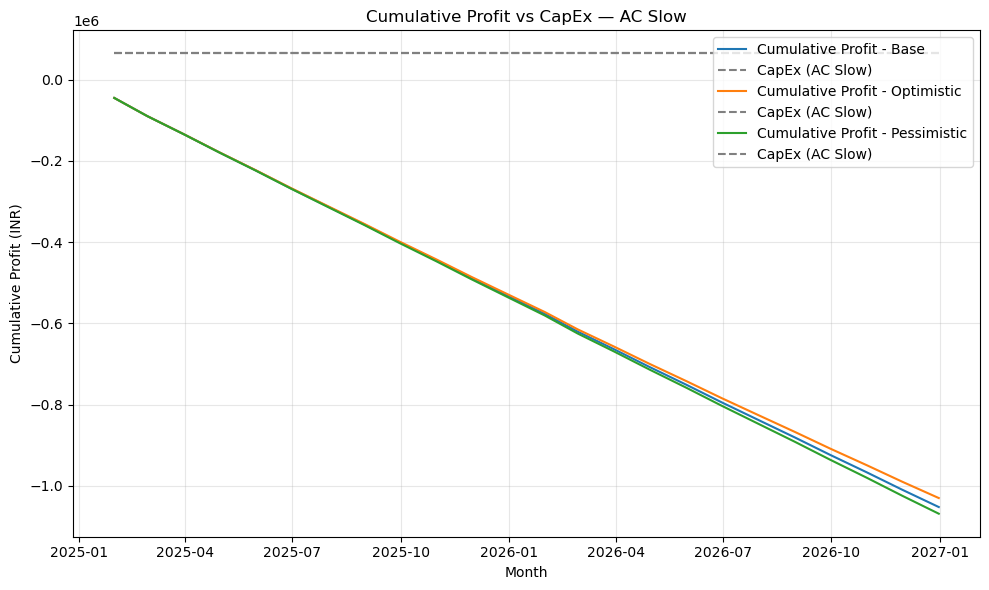

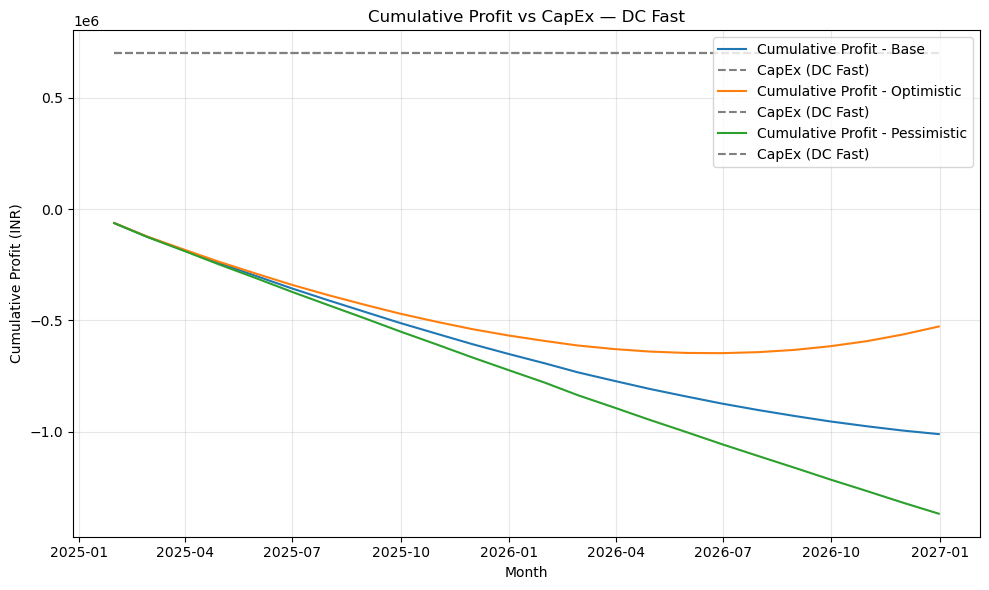

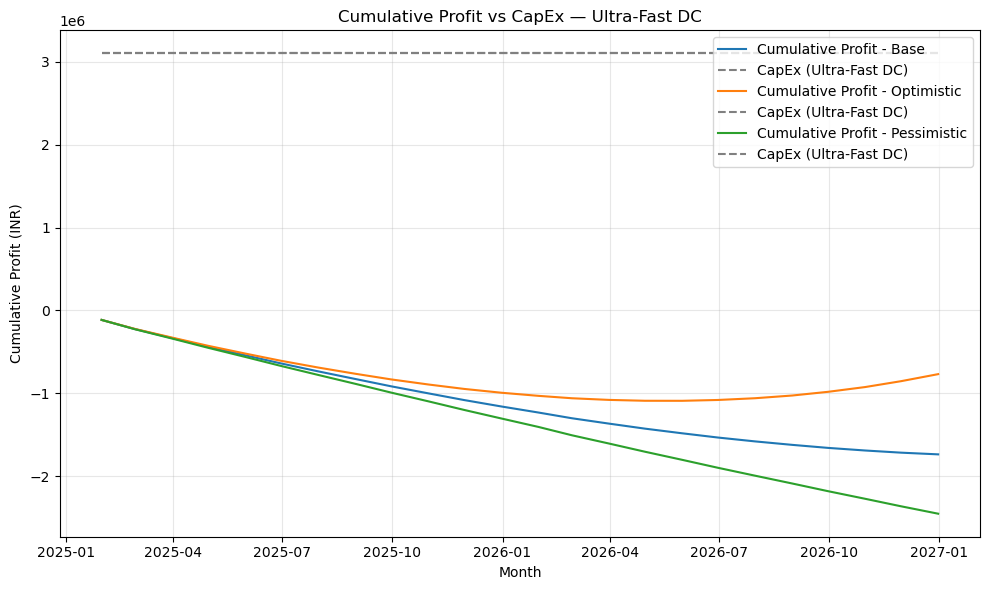

In [2]:
for ctype in df["ChargerType"].unique():
    plt.figure(figsize=(10,6))
    sub = df[df["ChargerType"] == ctype]
    for scenario in sub["Scenario"].unique():
        ssub = sub[sub["Scenario"] == scenario]
        plt.plot(ssub["Month"], ssub["CumulativeProfit"], label=f"Cumulative Profit - {scenario}")
        # plot capex as horizontal line (use first CapEx)
        cap = ssub["CapEx"].iloc[0]
        plt.hlines(cap, ssub["Month"].min(), ssub["Month"].max(), colors='grey', linestyles='dashed', label=f"CapEx ({ctype})")
    plt.title(f"Cumulative Profit vs CapEx — {ctype}")
    plt.xlabel("Month")
    plt.ylabel("Cumulative Profit (INR)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [8]:
import pandas as pd
from itertools import product

# === 1. Base assumptions from Phase F ===
assumptions = {
    "AC Slow": {
        "Power_kW": 3.3,
        "HardwareCost": 50000,
        "InstallCost": 15000,
        "LandLeaseCost": 15000,
        "AvgRevenuePerSession": 70,
        "SessionsPerMonth": 100,
        "ElectricityPerSession_kWh": 6,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 1000,
        "StaffCost": 20000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 8000
    },
    "DC Fast": {
        "Power_kW": 60,
        "HardwareCost": 500000,
        "InstallCost": 200000,
        "LandLeaseCost": 40000,
        "AvgRevenuePerSession": 600,
        "SessionsPerMonth": 180,
        "ElectricityPerSession_kWh": 35,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 8000,
        "StaffCost": 50000,
        "CRMSoftwareCost": 3000,
        "MarketingCost": 10000
    },
    "Ultra-Fast DC": {
        "Power_kW": 150,
        "HardwareCost": 2500000,
        "InstallCost": 600000,
        "LandLeaseCost": 100000,
        "AvgRevenuePerSession": 800,
        "SessionsPerMonth": 250,
        "ElectricityPerSession_kWh": 40,
        "ElectricityCostPerkWh": 8,
        "MaintenanceCost": 15000,
        "StaffCost": 75000,
        "CRMSoftwareCost": 5000,
        "MarketingCost": 15000
    }
}

# === 2. Simulation time horizon (24 months) ===
years = [2025, 2026]
months = list(range(1, 13))
periods = list(product(years, months))

# === 3. Build dataset ===
rows = []
for charger, vals in assumptions.items():
    capex = vals["HardwareCost"] + vals["InstallCost"]
    for year, month in periods:
        electricity_cost = vals["SessionsPerMonth"] * vals["ElectricityPerSession_kWh"] * vals["ElectricityCostPerkWh"]
        monthly_revenue = vals["AvgRevenuePerSession"] * vals["SessionsPerMonth"]
        monthly_opex = (
            vals["LandLeaseCost"] + electricity_cost + vals["MaintenanceCost"] +
            vals["StaffCost"] + vals["CRMSoftwareCost"] + vals["MarketingCost"]
        )

        rows.append({
            "Year": year,
            "Month": month,
            "ChargerType": charger,
            "Power_kW": vals["Power_kW"],
            "HardwareCost": vals["HardwareCost"],
            "InstallCost": vals["InstallCost"],
            "CapEx": capex,
            "LandLeaseCost": vals["LandLeaseCost"],
            "AvgRevenuePerSession": vals["AvgRevenuePerSession"],
            "SessionsPerMonth": vals["SessionsPerMonth"],
            "ElectricityPerSession_kWh": vals["ElectricityPerSession_kWh"],
            "ElectricityCostPerkWh": vals["ElectricityCostPerkWh"],
            "ElectricityCost": electricity_cost,
            "MaintenanceCost": vals["MaintenanceCost"],
            "StaffCost": vals["StaffCost"],
            "CRMSoftwareCost": vals["CRMSoftwareCost"],
            "MarketingCost": vals["MarketingCost"],
            "MonthlyRevenue": monthly_revenue,
            "MonthlyOPEX": monthly_opex
        })

# === 4. Create DataFrame & export ===
df = pd.DataFrame(rows)
df.to_csv("Phase_H_RevenueForecast_MC.csv", index=False)
print("Monte Carlo-ready file saved as: Phase_H_RevenueForecast_MC.csv")

Monte Carlo-ready file saved as: Phase_H_RevenueForecast_MC.csv


In [10]:
import pandas as pd
import numpy as np

# === 1. Load Monte Carlo-ready dataset ===
INPUT_CSV = "Phase_H_RevenueForecast_MC.csv"
df = pd.read_csv(INPUT_CSV)

# === 2. Simulation parameters ===
N_SIMULATIONS = 5000  # number of Monte Carlo runs
UTILIZATION_STD = 0.15  # 15% variability in sessions
TARIFF_STD = 0.10       # 10% variability in price per session
OPEX_STD = 0.12         # 12% variability in monthly OPEX

# Prepare output storage
results = []

# === 3. Monte Carlo simulation ===
for sim in range(N_SIMULATIONS):
    sim_df = df.copy()

    # Apply random variations
    sim_df["SessionsPerMonth_MC"] = sim_df["SessionsPerMonth"] * np.random.normal(1, UTILIZATION_STD, len(sim_df))
    sim_df["AvgRevenuePerSession_MC"] = sim_df["AvgRevenuePerSession"] * np.random.normal(1, TARIFF_STD, len(sim_df))
    sim_df["MonthlyOPEX_MC"] = sim_df["MonthlyOPEX"] * np.random.normal(1, OPEX_STD, len(sim_df))

    # Calculate revenue & profit
    sim_df["Revenue_MC"] = sim_df["SessionsPerMonth_MC"] * sim_df["AvgRevenuePerSession_MC"]
    sim_df["Profit_MC"] = sim_df["Revenue_MC"] - sim_df["MonthlyOPEX_MC"]

    sim_df["Simulation"] = sim
    results.append(sim_df[["Year", "Month", "ChargerType", "Revenue_MC", "Profit_MC"]])

# Combine all simulations
mc_results = pd.concat(results, ignore_index=True)

# === 4. Calculate percentiles (P10, P50, P90) ===
percentiles = mc_results.groupby(["Year", "Month", "ChargerType"]).agg(
    Revenue_P10=("Revenue_MC", lambda x: np.percentile(x, 10)),
    Revenue_P50=("Revenue_MC", lambda x: np.percentile(x, 50)),
    Revenue_P90=("Revenue_MC", lambda x: np.percentile(x, 90)),
    Profit_P10=("Profit_MC", lambda x: np.percentile(x, 10)),
    Profit_P50=("Profit_MC", lambda x: np.percentile(x, 50)),
    Profit_P90=("Profit_MC", lambda x: np.percentile(x, 90)),
).reset_index()

# === 5. Save results ===
percentiles.to_csv("Phase_H_MC_PercentileBands.csv", index=False)
print("Monte Carlo percentile bands saved to: Phase_H_MC_PercentileBands.csv")

Monte Carlo percentile bands saved to: Phase_H_MC_PercentileBands.csv
